<a href="https://colab.research.google.com/github/rjsgk5792/AI_12th_project/blob/main/Stockx_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Do List Memo

* 신발 이름 split -> 인코딩 -> 머신러닝 모델 학습
* 다른 머신러닝 모델들 적용
* Test데이터 혹은 Kream 크롤링 데이터의 트랜드 분석

[수행된 사항]
- 2017-2019년 Stockx 신발 트랜드 분석 
- 모델 학습을 위한 train/test 데이터 전처리
- 베이스라인 모델 예측 수행

[수행될 사항]
- 발표 혹은 보고서에 담을 트랜드 분석 추가 시행 (Test데이터, Kream크롤링 데이터 포함)
- 추가적인 Feature Engineering으로 모델 성능 향상 (신발 이름 컬럼 공백기준 Split 등)
- 다른 모델 역할 분담해서 사용 및 근거정리

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [354]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

In [355]:
train = pd.read_csv("/content/drive/MyDrive/부트캠프/cp1/StockX-Data-Contest-2019-3.csv")
test = pd.read_csv("/content/drive/MyDrive/부트캠프/cp1/sneakers_test.csv")

print(train.shape)
print(test.shape)

(99956, 8)
(1000, 17)


In [356]:
df = train.copy()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [357]:
test.head(3)

,Unnamed: 0,item,brand,retail,release,lowestAsk,numberOfAsks,salesThisPeriod,highestBid,numberOfBids,annualHigh,annualLow,volatility,deadstockSold,averageDeadstockPrice,lastSale,changePercentage
0,0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,159,3560,2615,226,1193,833,138,0.092028,8904,188,184,0.051429
1,1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,186,1149,478,220,567,343,137,0.054394,1146,209,190,-0.024050
2,2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,255,1284,345,300,547,2043,216,0.032678,938,333,260,-0.018868


## 크롤링데이터 불러오기 추가

## 클릭 안한 데이터

In [358]:
nonclick = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/without_click3.csv')
sneakers_df = nonclick[nonclick['세부카테고리']=='스니커즈'].reset_index(drop=True)
sneakers_df

,카테고리,세부카테고리,브랜드,상품명,구매가,거래량,저장수,피드수
0,신발,스니커즈,Jordan,Jordan 1 Retro High OG Black Mocha,600000,87000,26000,26000
1,신발,스니커즈,Nike,Nike Dunk Low Retro Black,178000,188000,101000,101000
2,신발,스니커즈,Nike,(W) Nike Dunk Low Black,195000,75000,53000,53000
3,신발,스니커즈,Nike,Nike Air Force 1 '07 Low White,124000,109000,93000,93000
4,신발,스니커즈,New Balance,New Balance 992 Made in USA Grey - D Standard,380000,52000,39000,39000
...,...,...,...,...,...,...,...,...
395,신발,스니커즈,Adidas,Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,400000,622,988,988
396,신발,스니커즈,Maison Margiela,Maison Margiela Calfskin Replica Sneaker White,350000,441,792,792
397,신발,스니커즈,Asics,Asics x Andersson Bell Gel-1090 Glacier Grey S...,500000,2109,5179,5179
398,신발,스니커즈,Nike,Nike x Sacai LDWaffle White Nylon,599000,2634,4206,4206


### 클릭 안한 데이터 전처리

In [359]:
sneakers_df['피드수'] = sneakers_df['피드수'].astype('int')

main_brand = pd.Series(sneakers_df['브랜드'].value_counts()[:4])

brand_ls = main_brand.index.tolist()

test1 = sneakers_df.loc[sneakers_df['브랜드']=='Nike']
test2 = sneakers_df.loc[sneakers_df['브랜드']=='Jordan']
test3 = sneakers_df.loc[sneakers_df['브랜드']=='New Balance']
test4 = sneakers_df.loc[sneakers_df['브랜드']=='Adidas']
main_brand_df = pd.concat([test1,test2,test3,test4])

avgs_price = []
avgs_trade = []
avgs_save = []
avgs_feed = []
for brand in brand_ls:
  row = sneakers_df.loc[sneakers_df['브랜드']==brand]
  avgs_price.append(row.mean()[0])
  avgs_trade.append(row.mean()[1])
  avgs_save.append(row.mean()[2])
  avgs_feed.append(row.mean()[3])

Average_df = pd.DataFrame(columns=['브랜드','평균구매가','평균거래량','평균저장수','평균피드수'])
Average_df['브랜드'] = pd.Series(brand_ls)
Average_df['평균구매가'] = pd.Series(avgs_price)
Average_df['평균거래량'] = pd.Series(avgs_trade)
Average_df['평균저장수'] = pd.Series(avgs_save)
Average_df['평균피드수'] = pd.Series(avgs_feed)

Average_df

,브랜드,평균구매가,평균거래량,평균저장수,평균피드수
0,Nike,251801.282051,8527.108974,11373.153846,11373.153846
1,Jordan,352070.175439,6921.929825,11668.412281,11668.412281
2,New Balance,220500.000000,8890.000000,7021.880952,7021.880952
3,Adidas,253900.000000,2853.025000,4339.425000,4339.425000


## 클릭한 데이터

In [360]:
# data1 = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/로퍼&플랫.csv')
# data2 = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/샌들&슬리퍼.csv')
data3 = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/스니커즈(40).csv')
# print(data1.columns)
# print(data2.columns)
print(data3.columns)
data3.shape

Index([''카테고리'', ' '세부카테고리'', ''상품명'', ''출시일'', ' '발매가'', ''215'', ''220'',
       ''225'', ''230'', ''235'', ''240'', ''245'', ''250'', ' '255'', ''260'',
       ''265'', ''270'', ''275'', ''280'', ''285'', ''290'', ''295'', ''300'',
       ''305'', ''310'', ''315'', ''320'', ''325'', ''330'', ''335' '],
      dtype='object')


(45, 30)

### 클릭한 데이터 전처리

In [361]:
data = data3.reset_index()
data.head(2)

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,'290','295','300','305','310','315','320','325','330','335'
0,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",0,0,0,구매입찰,구매입찰,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",구매입찰,구매입찰,구매입찰,구매입찰,"270,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
click = data.iloc[:,:30]
click.columns = ['카테고리','세부카테고리','상품명','출시일','발매가','215','220','225','230','235','240','245','250','255', '260','265', '270', 
                 '275', '280', '285', '290', '295', '300','305', '310', '315', '320', '325', '330', '335']
click

,카테고리,세부카테고리,상품명,출시일,발매가,215,220,225,230,235,...,290,295,300,305,310,315,320,325,330,335
0,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",0,0,0,구매입찰,구매입찰,...,"210,000","210,000","245,000","227,000","235,000",구매입찰,구매입찰,구매입찰,구매입찰,0
1,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",구매입찰,구매입찰,구매입찰,구매입찰,"270,000",...,"210,000","245,000","227,000","235,000",구매입찰,구매입찰,NaN,NaN,NaN,NaN
2,신발,스니커즈,Nike Air Force 1 '07 Low White,-,"129,000원",구매입찰,"159,000","157,000","158,000","160,000",...,"125,000","180,000","180,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,신발,스니커즈,Jordan 1 Retro High OG Black Mocha,20/11/13,"199,000원",구매입찰,구매입찰,구매입찰,구매입찰,구매입찰,...,"600,000","649,000","600,000",구매입찰,"1,200,000",구매입찰,NaN,NaN,NaN,NaN
4,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",0,0,0,구매입찰,구매입찰,...,"210,000","210,000","245,000","227,000","235,000",구매입찰,구매입찰,구매입찰,구매입찰,0
5,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",0,0,0,구매입찰,구매입찰,...,"210,000","210,000","245,000","227,000","235,000",0,구매입찰,0,구매입찰,0
6,신발,스니커즈,Nike Air Force 1 '07 Low White,-,"129,000원",0,0,0,0,구매입찰,...,"136,000","142,000","134,000","138,000","125,000",0,"180,000",0,"180,000",0
7,신발,스니커즈,Jordan 1 Retro High OG Black Mocha,20/11/13,"199,000원",0,0,구매입찰,구매입찰,구매입찰,...,"600,000","649,000","600,000",구매입찰,"1,200,000",0,구매입찰,0,0,0
8,신발,스니커즈,Nike Dunk Low Retro Valerian Blue,22/06/20,"129,000원",0,0,구매입찰,구매입찰,구매입찰,...,"163,000","174,000","173,000","165,000","162,000",0,구매입찰,0,0,0
9,신발,스니커즈,Nike Dunk Low Retro Valerian Blue,22/06/20,"129,000원",0,0,구매입찰,구매입찰,구매입찰,...,"163,000","174,000","173,000","165,000","162,000",0,구매입찰,0,0,0


In [363]:
data3.columns = ['카테고리','세부카테고리','상품명','출시일','발매가','215','220','225','230','235','240','245','250','255', '260','265', '270', 
                 '275', '280', '285', '290', '295', '300','305', '310', '315', '320', '325', '330', '335']
data3.head()

카테고리  \
신발 스니커즈 Nike Dunk Low Retro Black          21/01/14 129,000원 0    0       0       구매입찰    구매입찰    270,000 262,000 211,000 190,000 181,000 183,000 180,000 179,000 190,000 210,000 210,000 210,000 245,000 227,000 235,000   구매입찰 구매입찰 구매입찰 구매입찰 0   0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   0.0   
                                                             구매입찰 구매입찰    구매입찰    구매입찰    270,000 262,000 211,000 190,000 181,000 183,000 180,000 179,000 190,000 210,000 210,000 210,000 245,000 227,000 235,000 구매입찰      구매입찰 NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN   
        Nike Air Force 1 '07 Low White     -        129,000원 구매입찰 159,000 157,000 158,000 160,000 138,000 137,000 137,000 134,000 137,000 139,000 136,000 142,000 134,000 138,000 125,000 180,000 180,000 NaN     NaN       NaN  NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN   
        Jordan 1 Retro High OG Black Mocha 20/11/13 199,000원 구매입찰 구매입찰    구매입찰    구매입찰    구매입찰    780,000 구매입찰    709,000 700,000 730,000 738,000 770,000 715,000 690,000 635,000 600,000 649,000 600,000 구매입찰    1,200,000 구매입찰 NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN   
        Nike Dunk Low Retro Black          21/01/14 129,000원 0    0       0       구매입찰    구매입찰    270,000 262,000 211,000 190,000 181,000 183,000 180,000 179,000 190,000 210,000 210,000 210,000 245,000 227,000 235,000   구매입찰 구매입찰 구매입찰 구매입찰 0   0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN   

                                                                                                                                                                      

# Data Cleaning

## 텍스트 전처리

In [364]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [365]:
# 신발 이름에서 - 제거

df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-',' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,$828,$220,2/11/17,11.0,Rhode Island


In [366]:
# Price 에서 [$ ,] 제거

df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace('$',''))
df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace(',',''))

df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace('$',''))
df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace(',',''))

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island


## 데이터 타입 변경

In [367]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [368]:
# 주문 일자, Release Date

df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y')
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%y')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


In [369]:
# 판매가, 소매가 object -> numerical 데이터 타입 변경

target_col = ['Sale Price','Retail Price']

for col in target_col:
  df[col] = pd.to_numeric(df[col])

print(df.dtypes)
df.head()

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


## 테스트 데이터 전처리

In [370]:
test2 = test.copy()
test2.drop(columns=['Unnamed: 0'],inplace=True)
test2.columns=['Sneaker_Name','Brand','retail Price','Release Date','가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','연간가장낮은가격','최근12개월간가격변동률','팔린신발수','평균신발가격','최근 판매가','최근가격변동률']
test_df = test2.drop(columns=['가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','팔린신발수','연간가장낮은가격','최근12개월간가격변동률','최근가격변동률'])
# 여기서 최근 판매가는 변동성이 너무 커서 우리의 머신러닝 모델로 예측하는 가격은 평균신발가격으로 설정하는게 좋을 것같아서 최근 판매가 컬럼도 삭제하겠습니다.
test_df2 = test_df.drop('최근 판매가',axis=1)
test_df2['Brand'] = test_df2['Brand'].apply(lambda x: x.replace('adidas','Adidas'))
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,Adidas,300,2022-06-17,354


In [371]:
test_df2.dtypes

Sneaker_Name    object
Brand           object
retail Price     int64
Release Date    object
평균신발가격           int64
dtype: object

In [372]:
import datetime as dt

# 데이터 수집일자 컬럼 추가
Crowling_Data = ['2022-06-15']*len(test_df2)
test_df2['Crowling_Data']=Crowling_Data
test_df2['Crowling_Data'] = pd.to_datetime(test_df2['Crowling_Data'],format='%Y-%m-%d')
test_df2['Release Date'] = pd.to_datetime(test_df2['Release Date'],format='%Y-%m-%d')

# 날짜형 데이터 수치형으로 전환
test_df2['Crowling_Data']=test_df2['Crowling_Data'].map(dt.datetime.toordinal)
test_df2['Release Date']=test_df2['Release Date'].map(dt.datetime.toordinal)

test_df2['time gap'] = test_df2['Crowling_Data']-test_df2['Release Date']
test_df2.drop('Crowling_Data',axis=1)
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격,Crowling_Data,time gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,738317,209,738321,4
2,Jordan 4 Retro Infrared,Jordan,200,738321,333,738321,0
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,738316,566,738321,5
4,adidas Yeezy Boost 700 Hi-Res Red,Adidas,300,738323,354,738321,-2


In [373]:
# 이상치 처리
drop_row = test_df2[test_df2['time gap']<0]
test_df2.drop(drop_row.index,inplace=True)

# Feature Engineering

## 1. 판매가와 소매가 비교 컬럼 생성

In [374]:
df['Cheaper Buy'] = df['Sale Price'] < df['Retail Price']
df['Same Buy'] = df['Sale Price'] == df['Retail Price']
df['Expensive Buy'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True


## 2. 상품 출시일과 판매된 날짜(주문일) 차이 컬럼 생성

In [375]:
import datetime as dt

# 날짜 데이터 -> 수치형 데이터 전환

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date']=df['Order Date'].map(dt.datetime.toordinal)

df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Date']=df['Release Date'].map(dt.datetime.toordinal)

df['time gap'] = df['Order Date']-df['Release Date']
df['time gap'] = df['time gap'].apply(lambda x: str(x).split(' ')[0])
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap
0,736573,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,736231,11.0,California,False,False,True,342
1,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282
2,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,736291,11.0,California,False,False,True,282
3,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,736291,11.5,Kentucky,False,False,True,282
4,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,736371,11.0,Rhode Island,False,False,True,202


## 3. 미국 도시 -> 큰 범주로 분류 컬럼

In [376]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

In [377]:
East = ['Kentucky','Rhode Island','Michigan','New York','New Jersey','North Carolina'
          ,'Delaware','Virginia','Massachusetts','Pennsylvania','Ohio','Connecticut','Maine','Illinois'
          ,'Maryland','Tennessee','West Virginia','Indiana','New Hampshire','Vermont',]
West = ['California','Oregon','Washington','Nevada','Arizona','Wyoming','Utah','District of Columbia','Idaho']
South = ['Texas','Alabama','Florida','Louisiana','Georgia','Oklahoma','South Carolina','Arkansas','New Mexico'
          ,'Mississippi']
North = ['Wisconsin','Minnesota','North Dakota','Montana']
central = ['Kansas','Colorado','Nebraska','Missouri','Iowa','South Dakota']
etc = ['Alaska','Hawaii']

In [378]:
df['cardinal point'] = [None] * len(df)

for i in range(len(df)):
  if df['Buyer Region'][i] in East:
    df['cardinal point'][i] = 'East'
  elif df['Buyer Region'][i] in West:
    df['cardinal point'][i] = 'West'
  elif df['Buyer Region'][i] in South:
    df['cardinal point'][i] = 'South'
  elif df['Buyer Region'][i] in North:
    df['cardinal point'][i] = 'North'
  elif df['Buyer Region'][i] in central:
    df['cardinal point'][i] = 'Central'
  elif df['Buyer Region'][i] in etc:
    df['cardinal point'][i] = 'etc'
  else:
    df['cardinal point'][i] = 'error'  

In [379]:
df['cardinal point'].value_counts()

East       46530
West       31949
South      16641
Central     2714
North       1678
etc          444
Name: cardinal point, dtype: int64

## 출시가 대비 몇배의 차익을 발생시켰는지

In [380]:
df['multiple_return'] = (df['Sale Price']/df['Retail Price'])
df['multiple_return'] = df['multiple_return'].round(1)

## 이상치 처리

In [381]:
# 판매가 1000초과 이상치 처리
df.drop(df.loc[df['Sale Price']>1000].index, inplace=True)
df = df.reset_index(drop = True)
# time gap 800초과 이상치 처리
df['time gap'] = df['time gap'].astype('int')
df.drop(df.loc[df['time gap']<0].index, inplace=True)
df.drop(df.loc[df['time gap']>800].index, inplace=True)
df = df.reset_index(drop = True)

df.shape

(91589, 14)

In [382]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return
0,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282,West,3.1
1,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,736291,11.0,California,False,False,True,282,West,3.1
2,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,736371,11.0,Rhode Island,False,False,True,202,East,3.8
3,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,736371,8.5,Michigan,False,False,True,202,East,3.6
4,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black White,784,220,736315,11.0,California,False,False,True,258,West,3.6


                 Order Date  Sale Price  Retail Price  Release Date  \
Order Date         1.000000   -0.282252     -0.137931      0.329558   
Sale Price        -0.282252    1.000000     -0.375816     -0.030617   
Retail Price      -0.137931   -0.375816      1.000000     -0.336654   
Release Date       0.329558   -0.030617     -0.336654      1.000000   
Shoe Size         -0.049773    0.083474     -0.050994     -0.051371   
Cheaper Buy        0.056809   -0.089782      0.031974     -0.015321   
Same Buy           0.042236   -0.065913      0.024580     -0.027272   
Expensive Buy     -0.070940    0.111603     -0.040422      0.028849   
time gap           0.294464   -0.146276      0.254138     -0.805232   
multiple_return   -0.166227    0.927831     -0.674969      0.098074   

                 Shoe Size  Cheaper Buy  Same Buy  Expensive Buy  time gap  \
Order Date       -0.049773     0.056809  0.042236      -0.070940  0.294464   
Sale Price        0.083474    -0.089782 -0.065913       0.1116

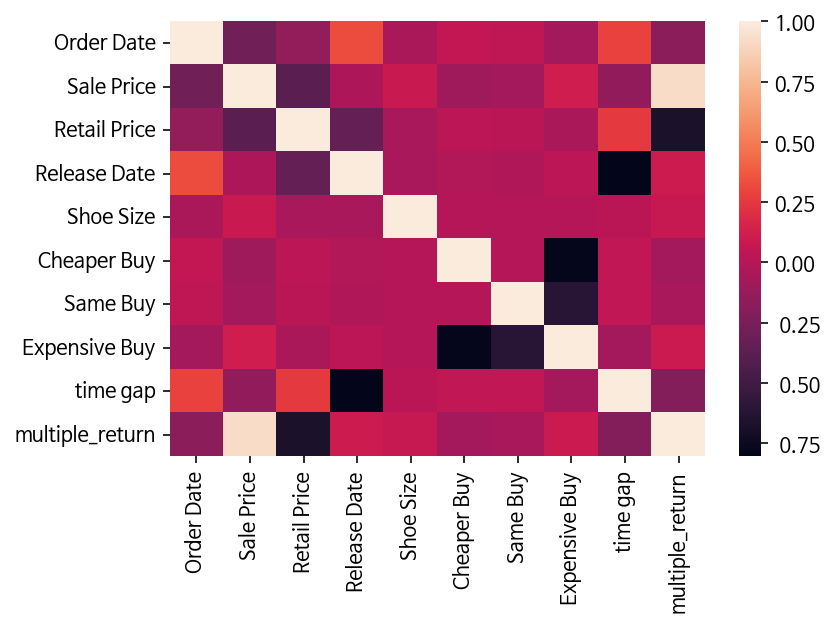

In [383]:
correlations = df.corr()
print(correlations)
sns.heatmap(correlations)

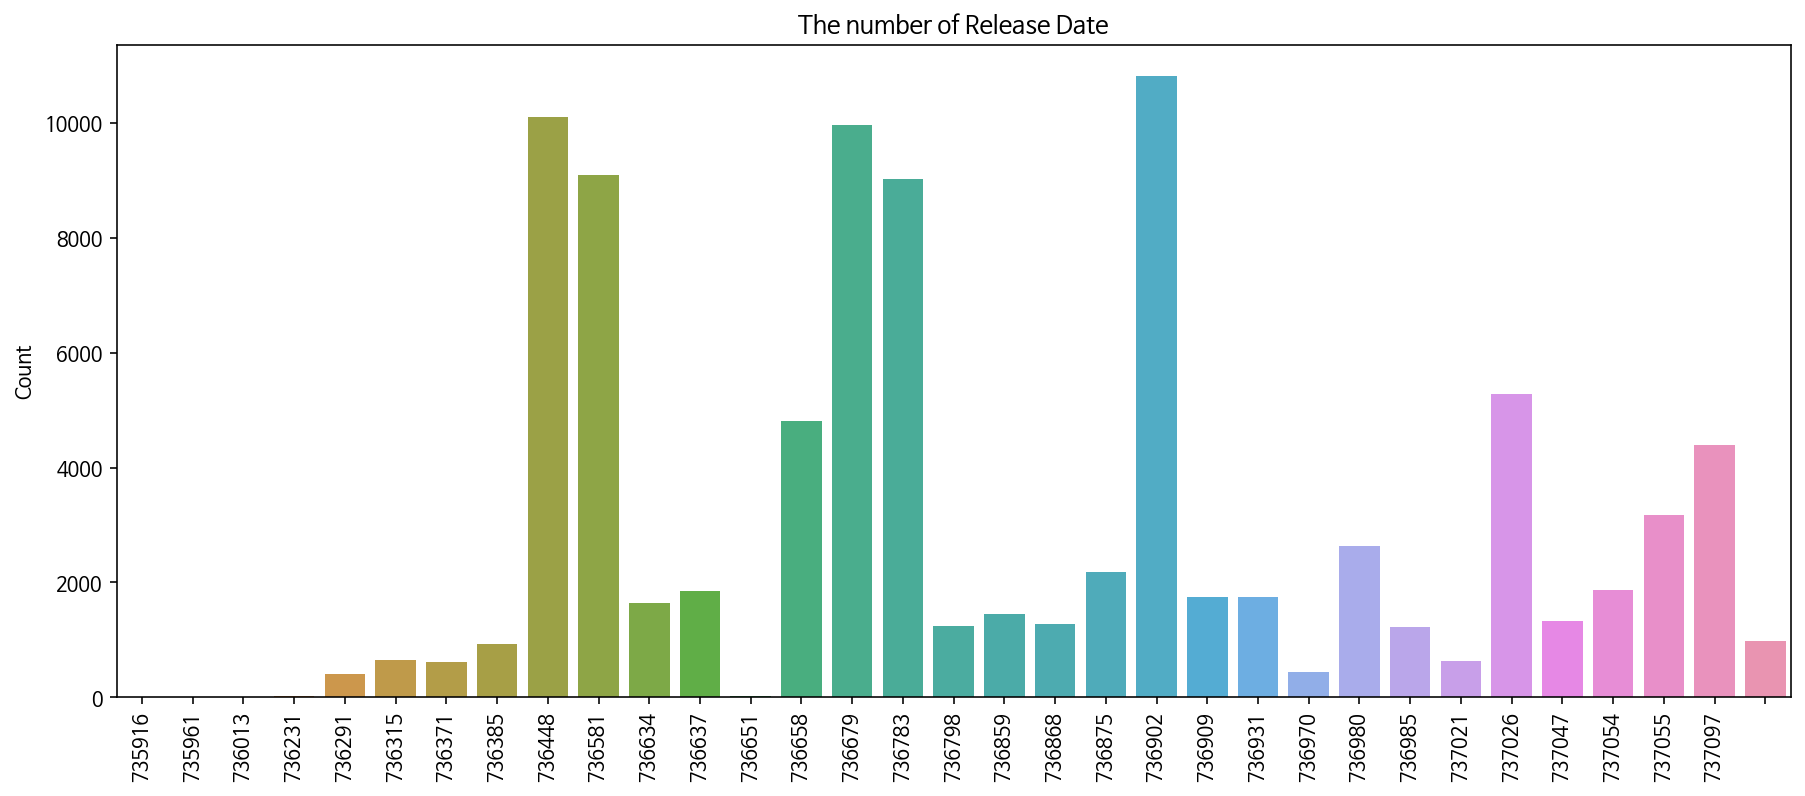

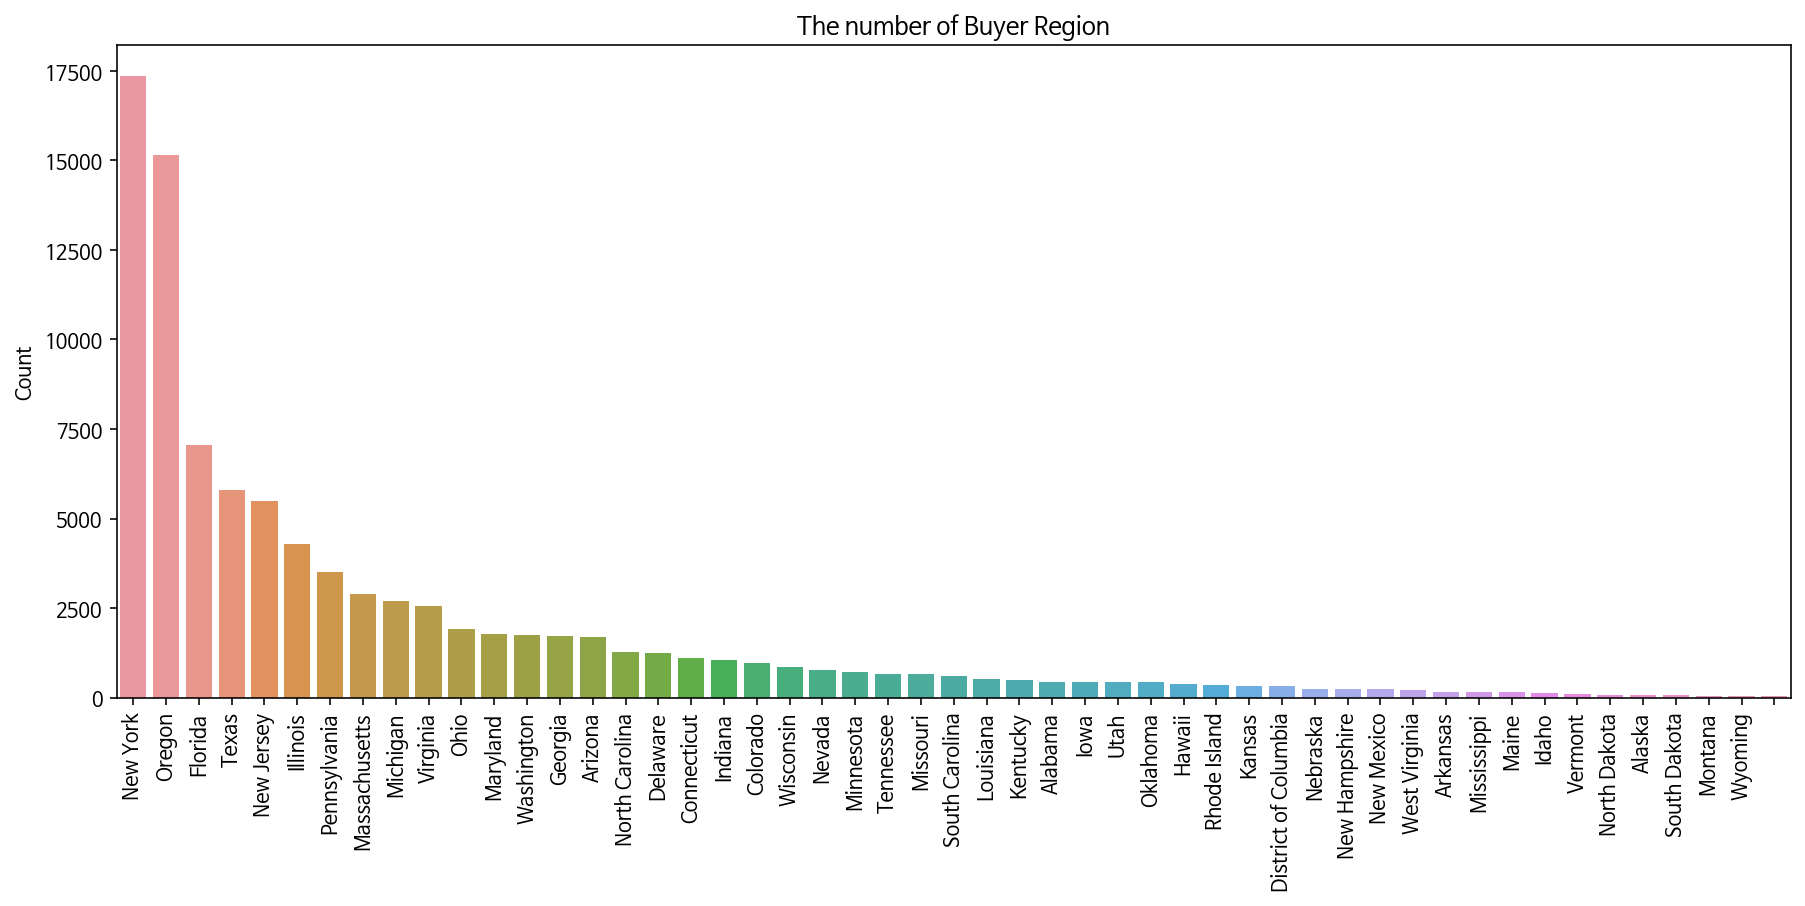

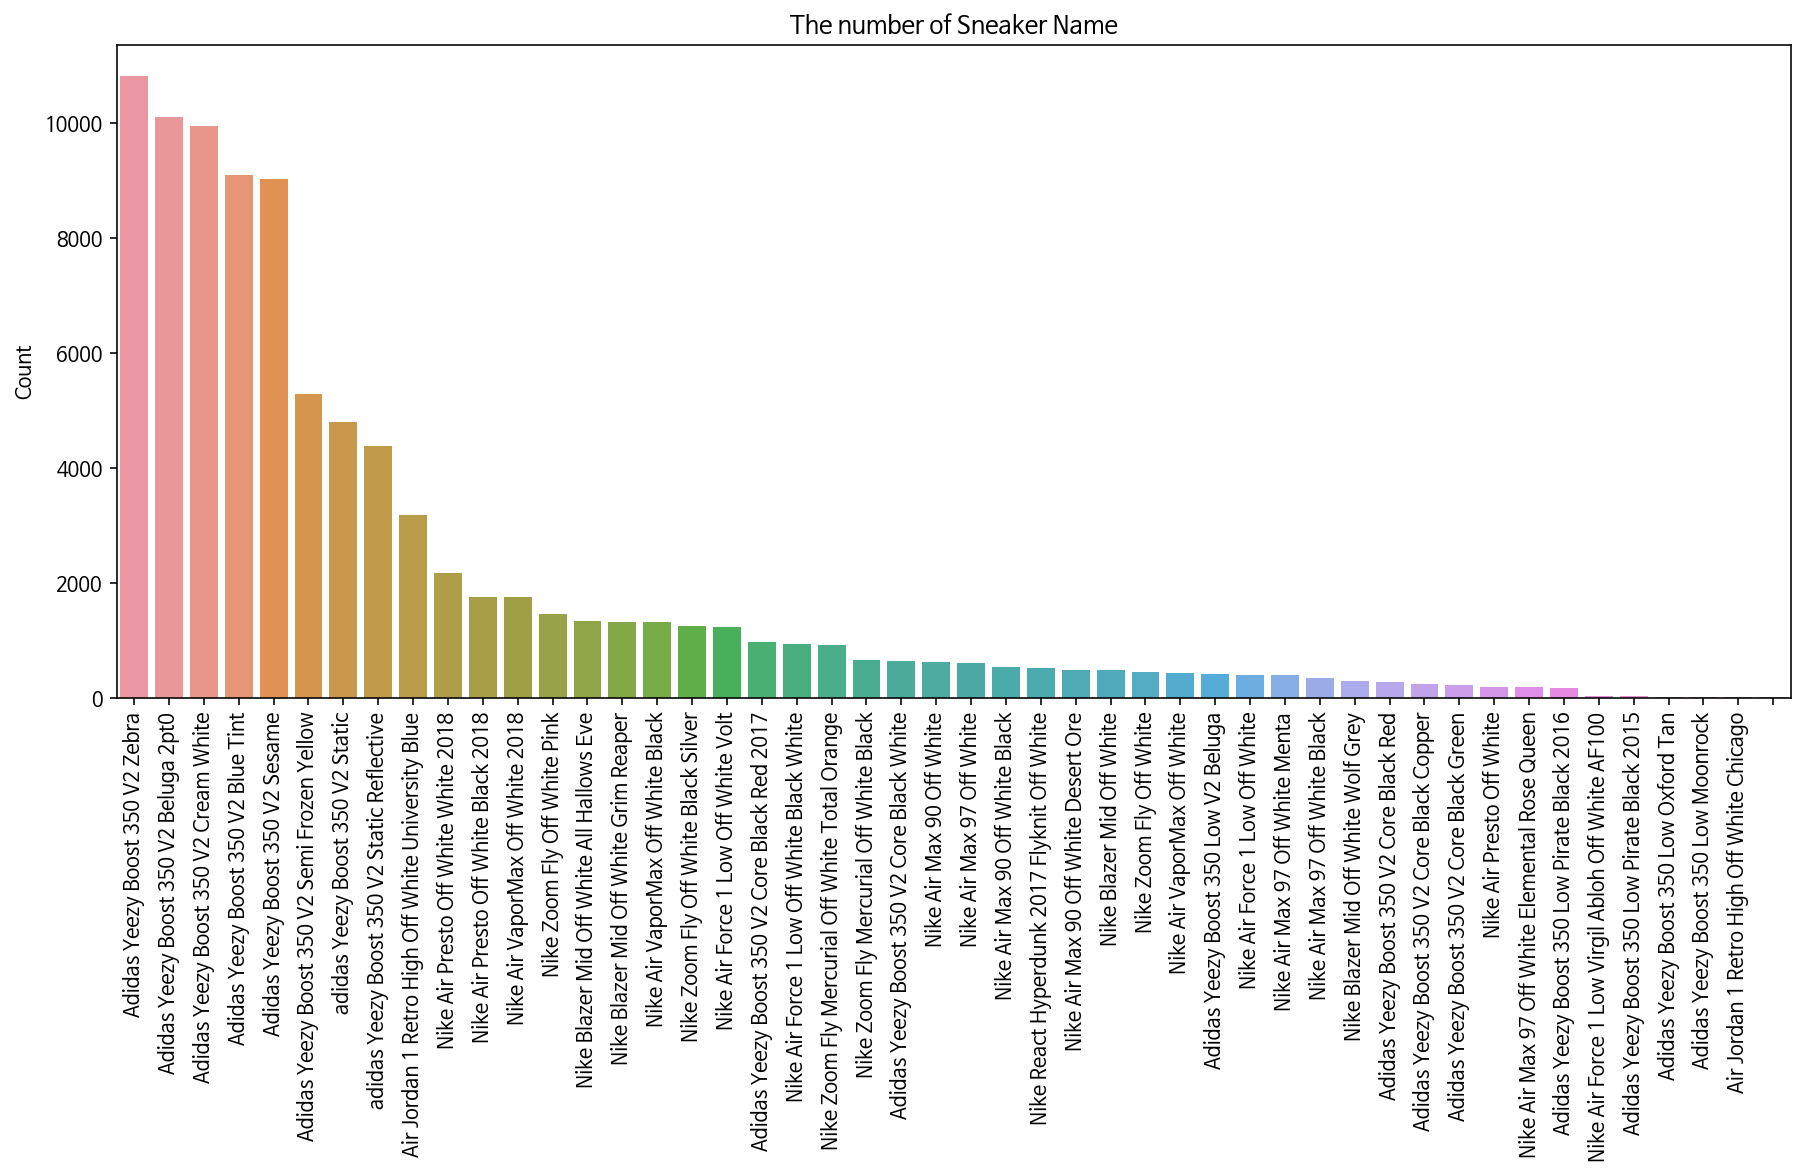

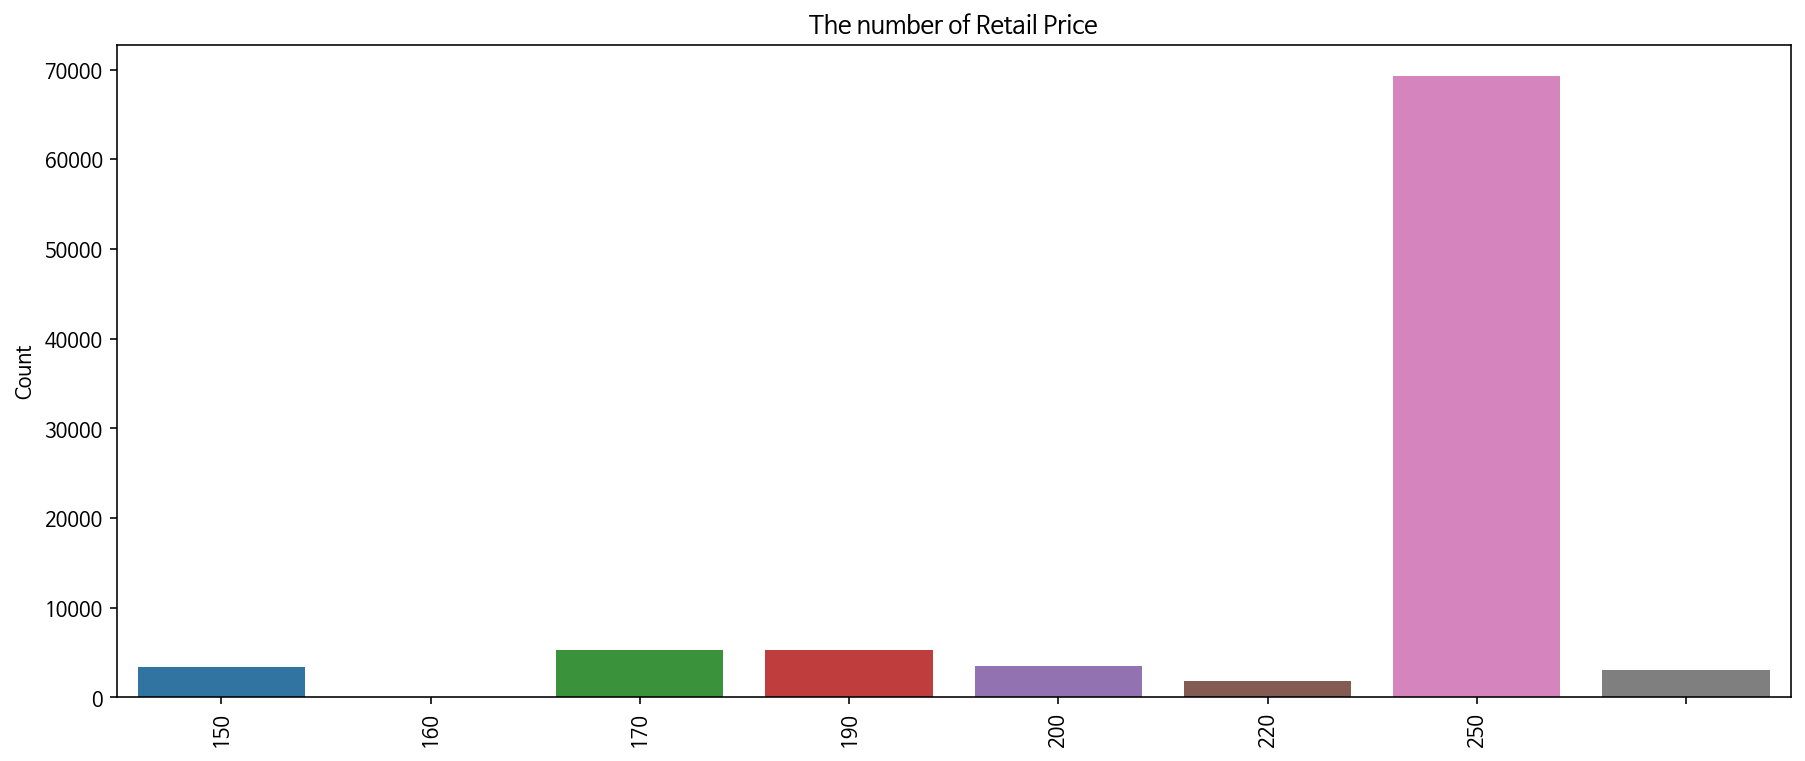

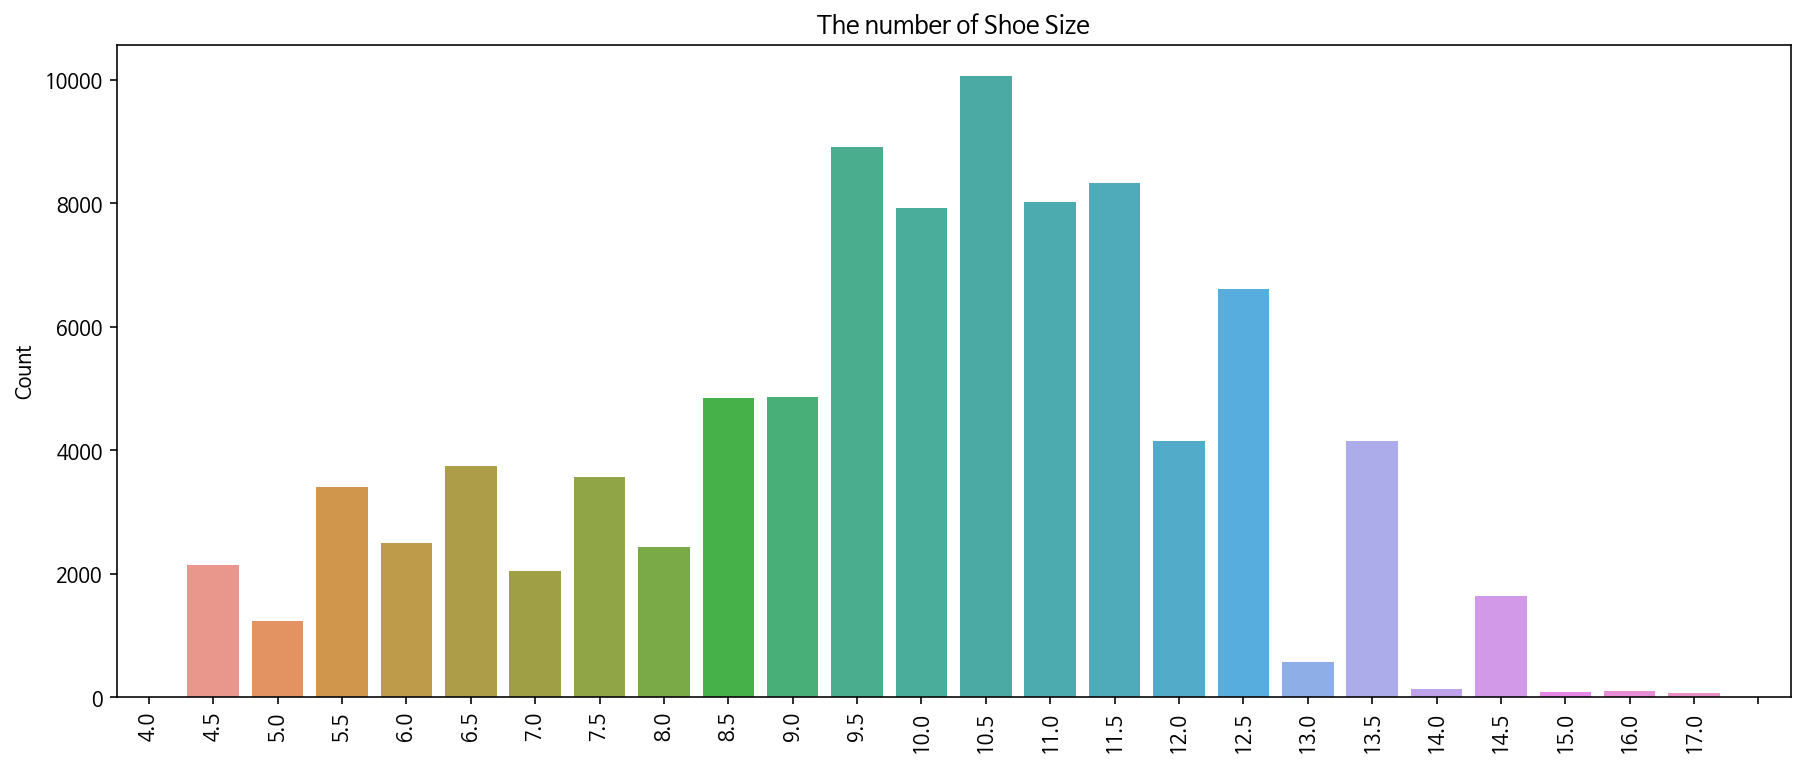

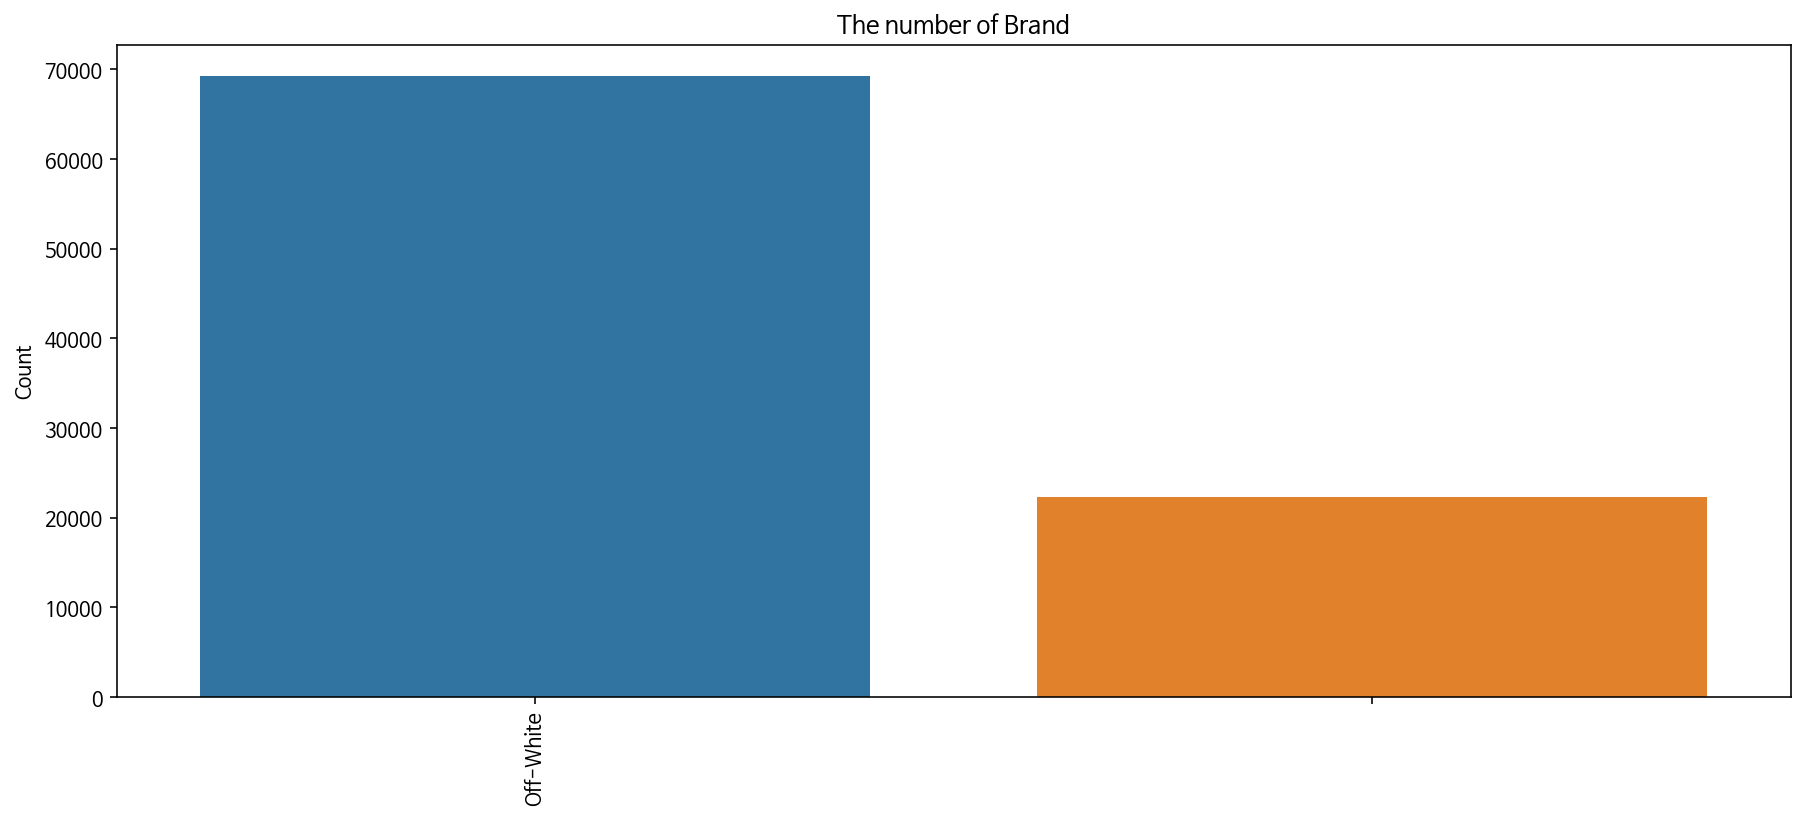

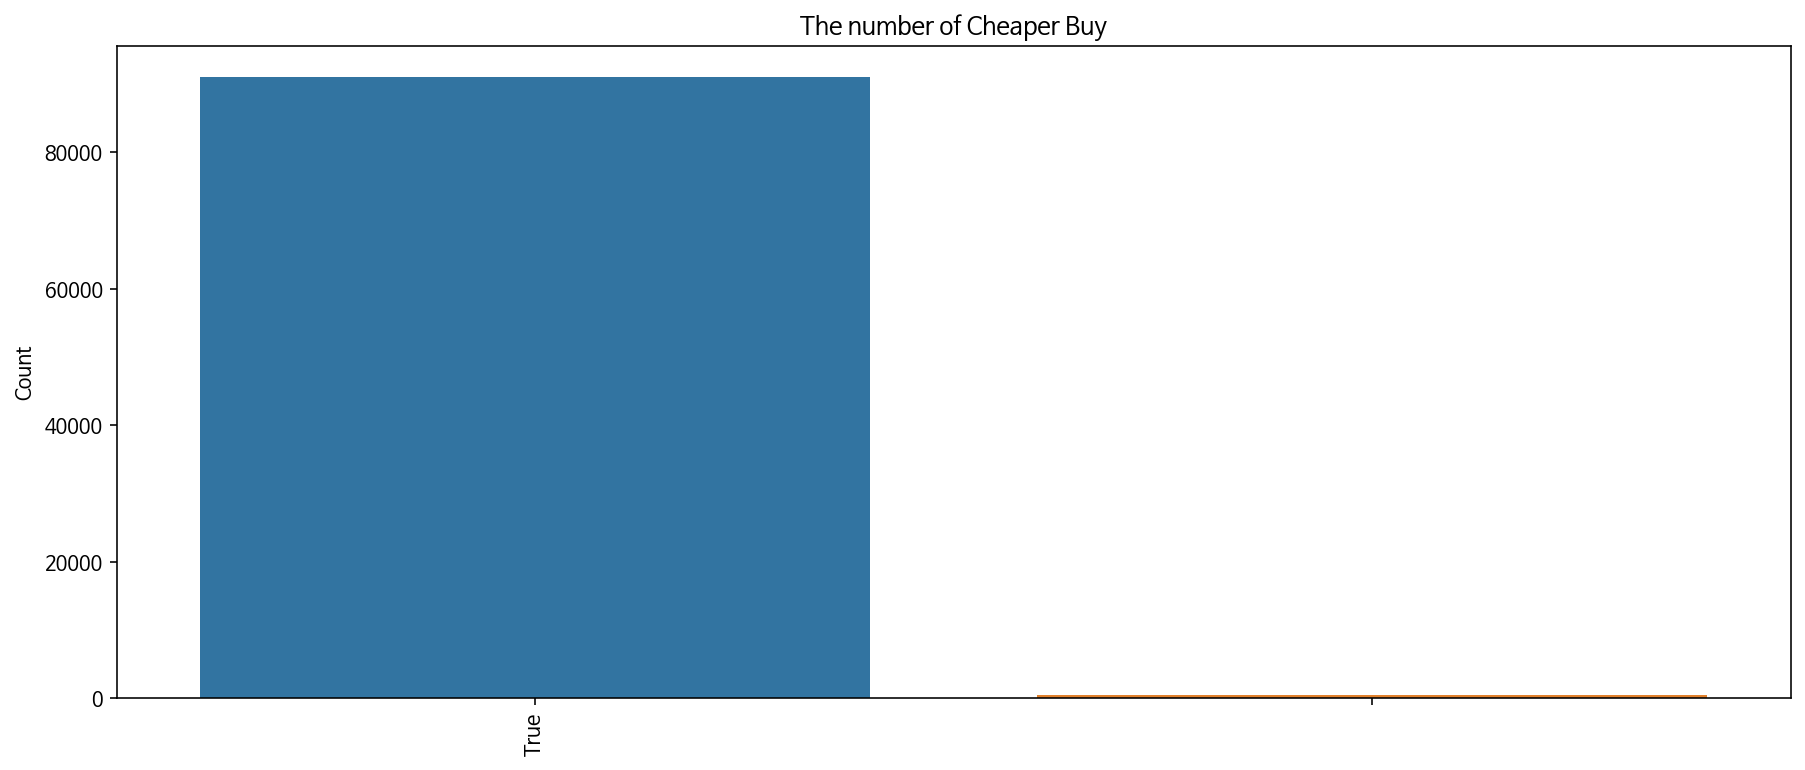

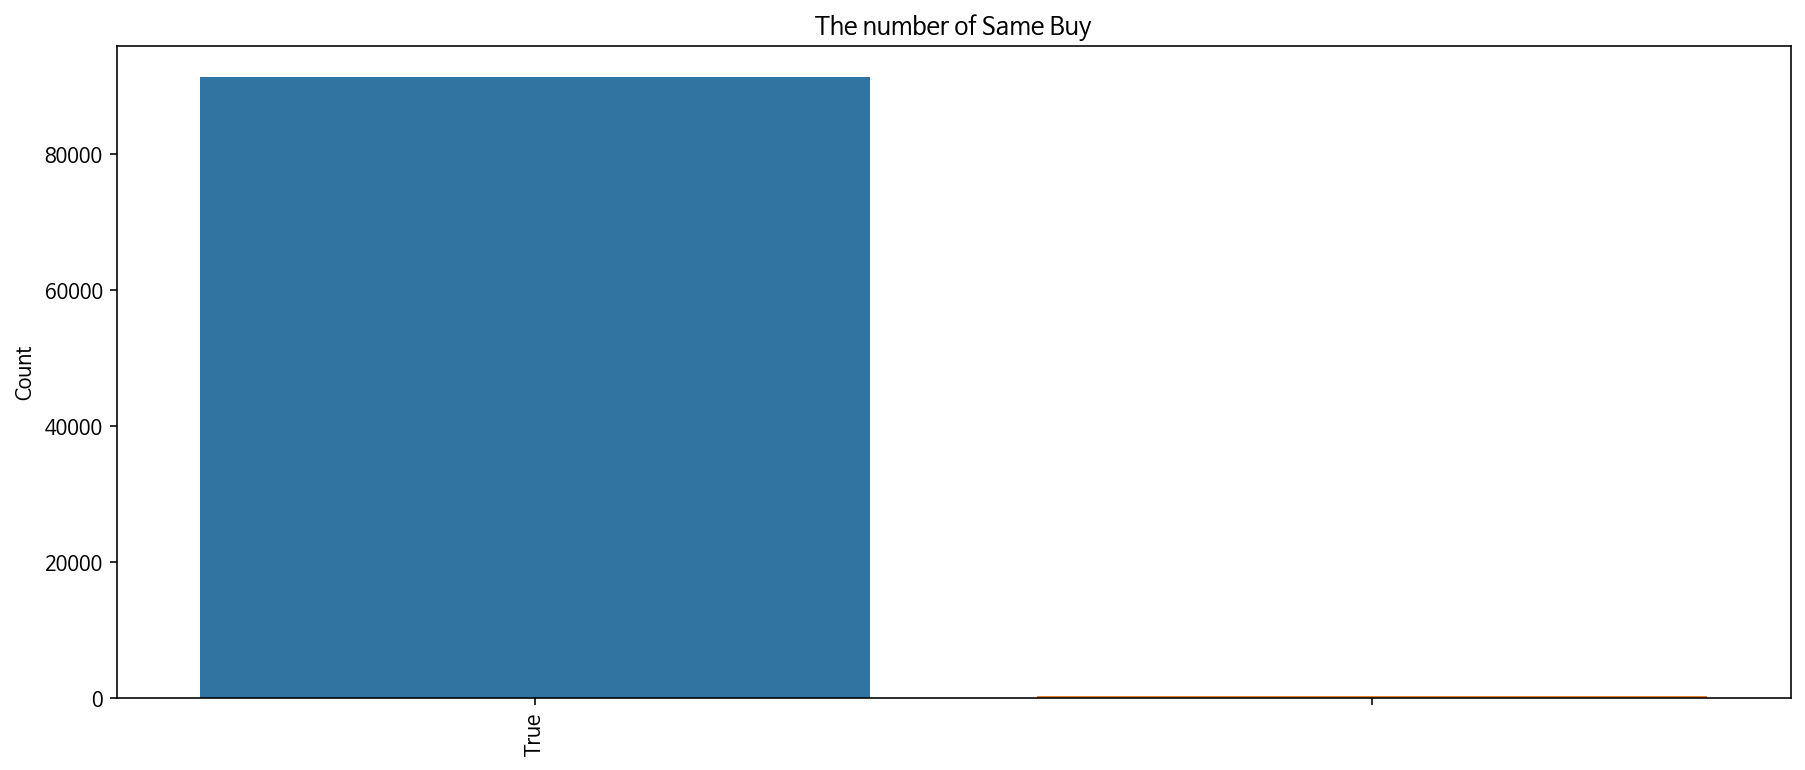

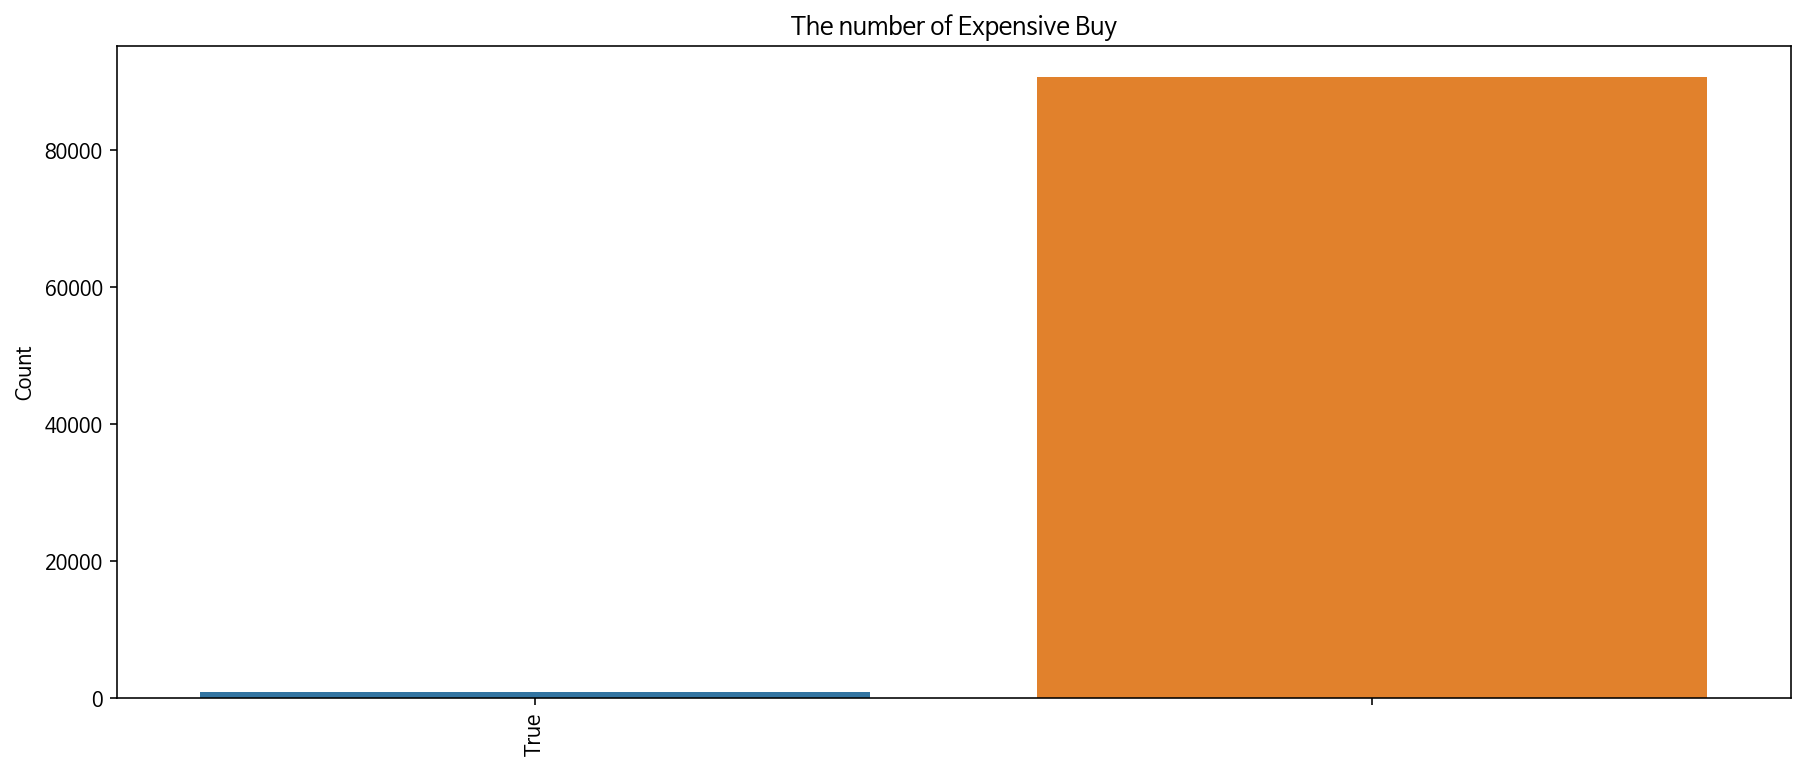

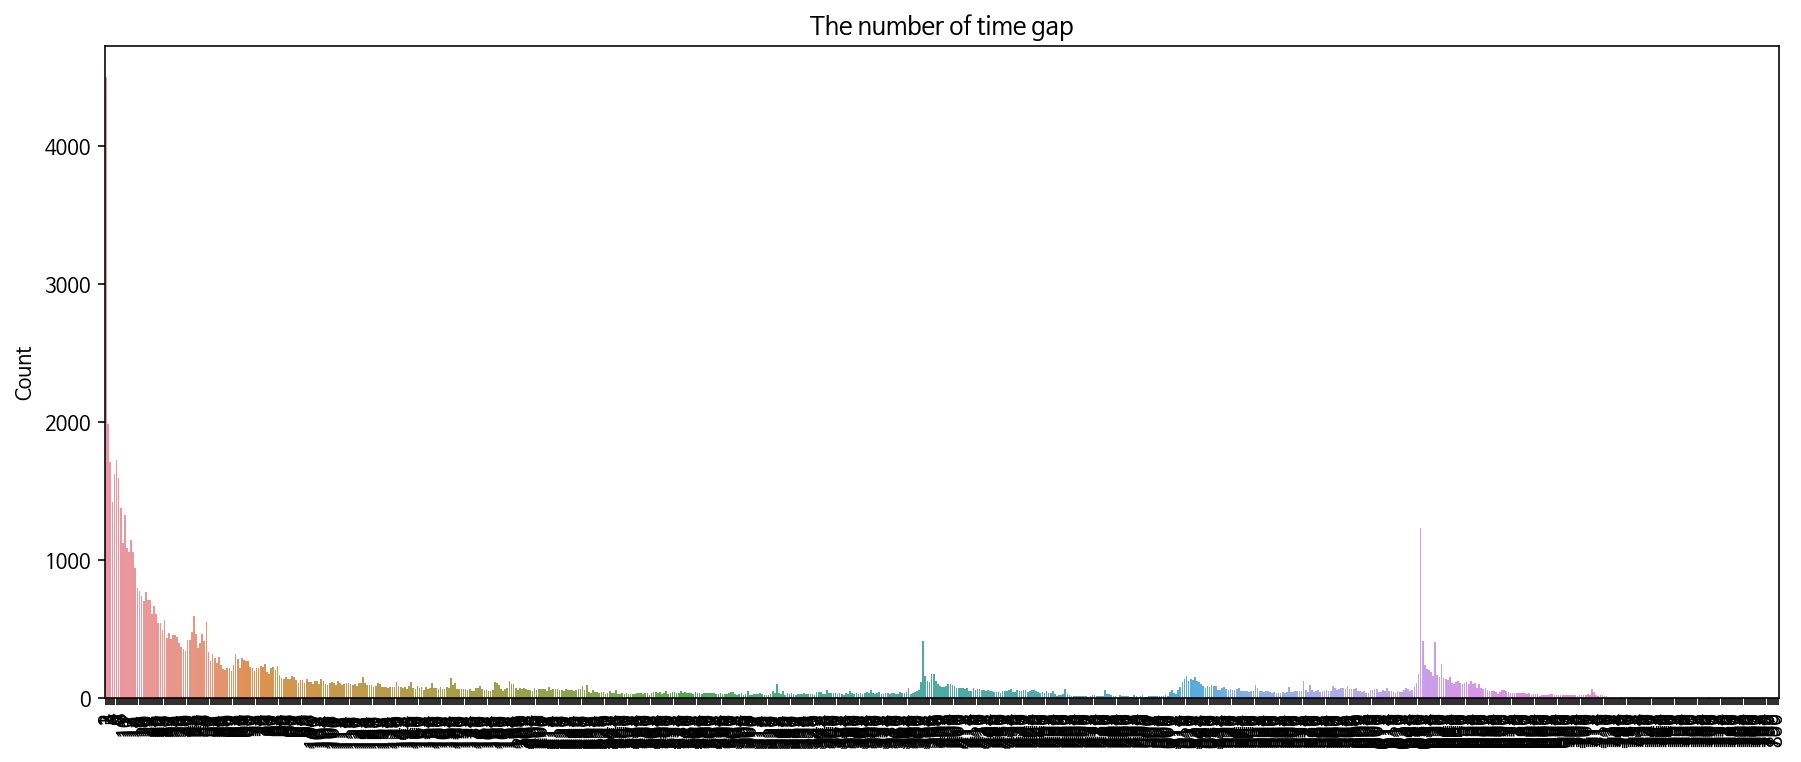

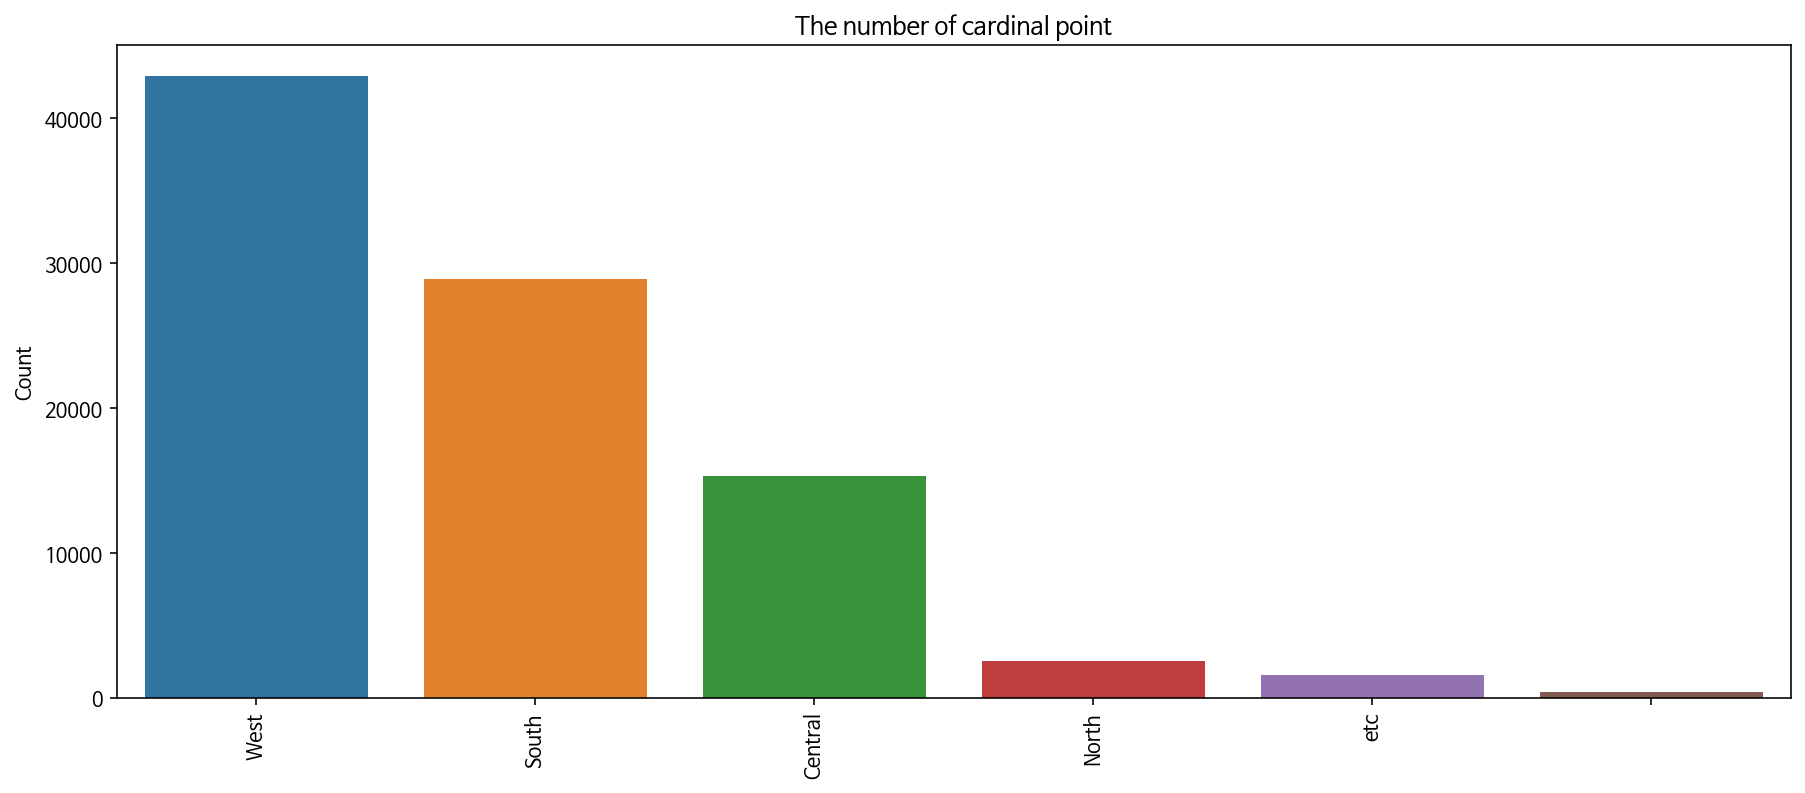

In [384]:
df_cate = ['Release Date','Buyer Region','Sneaker Name',
          'Retail Price','Shoe Size','Brand','Cheaper Buy','Same Buy',
          'Expensive Buy','time gap','cardinal point']

for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

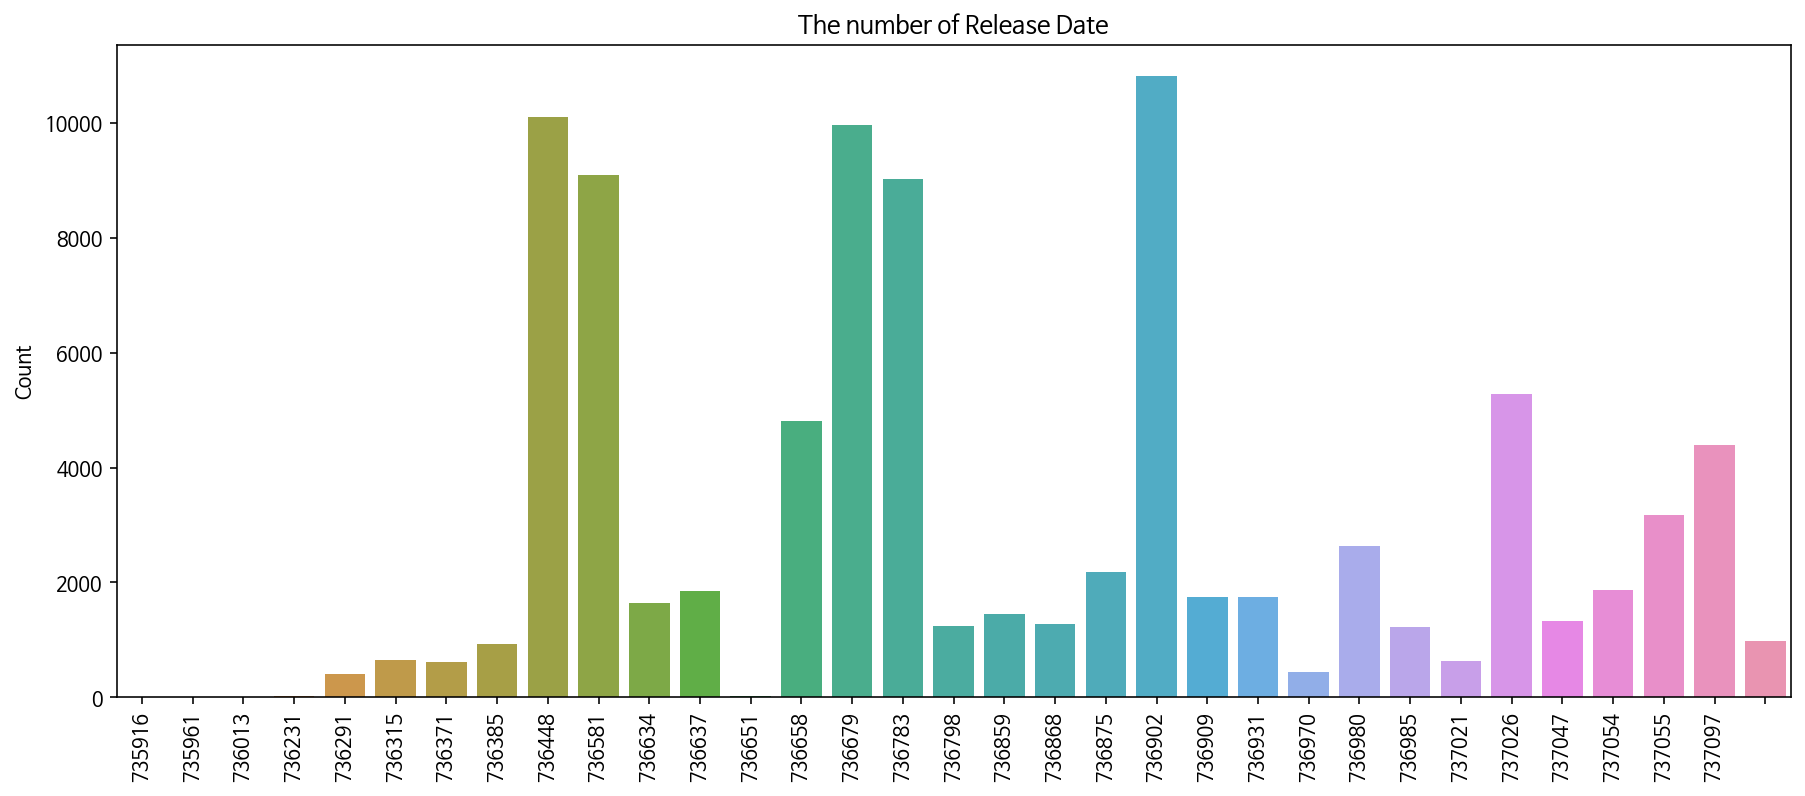

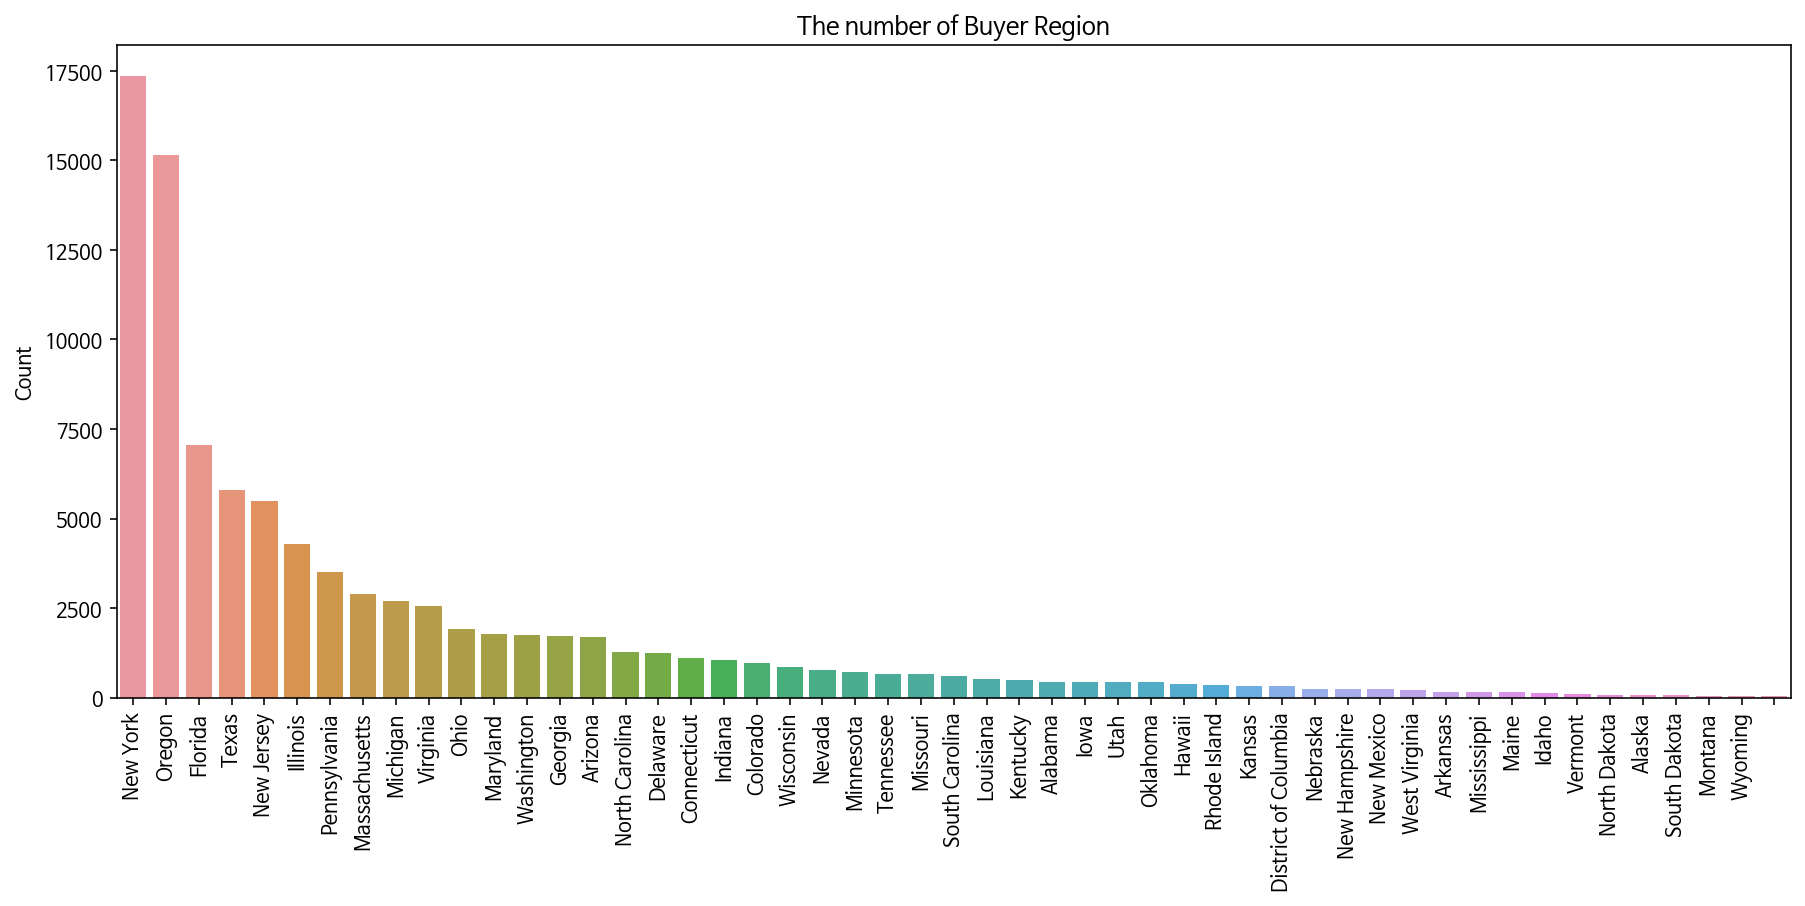

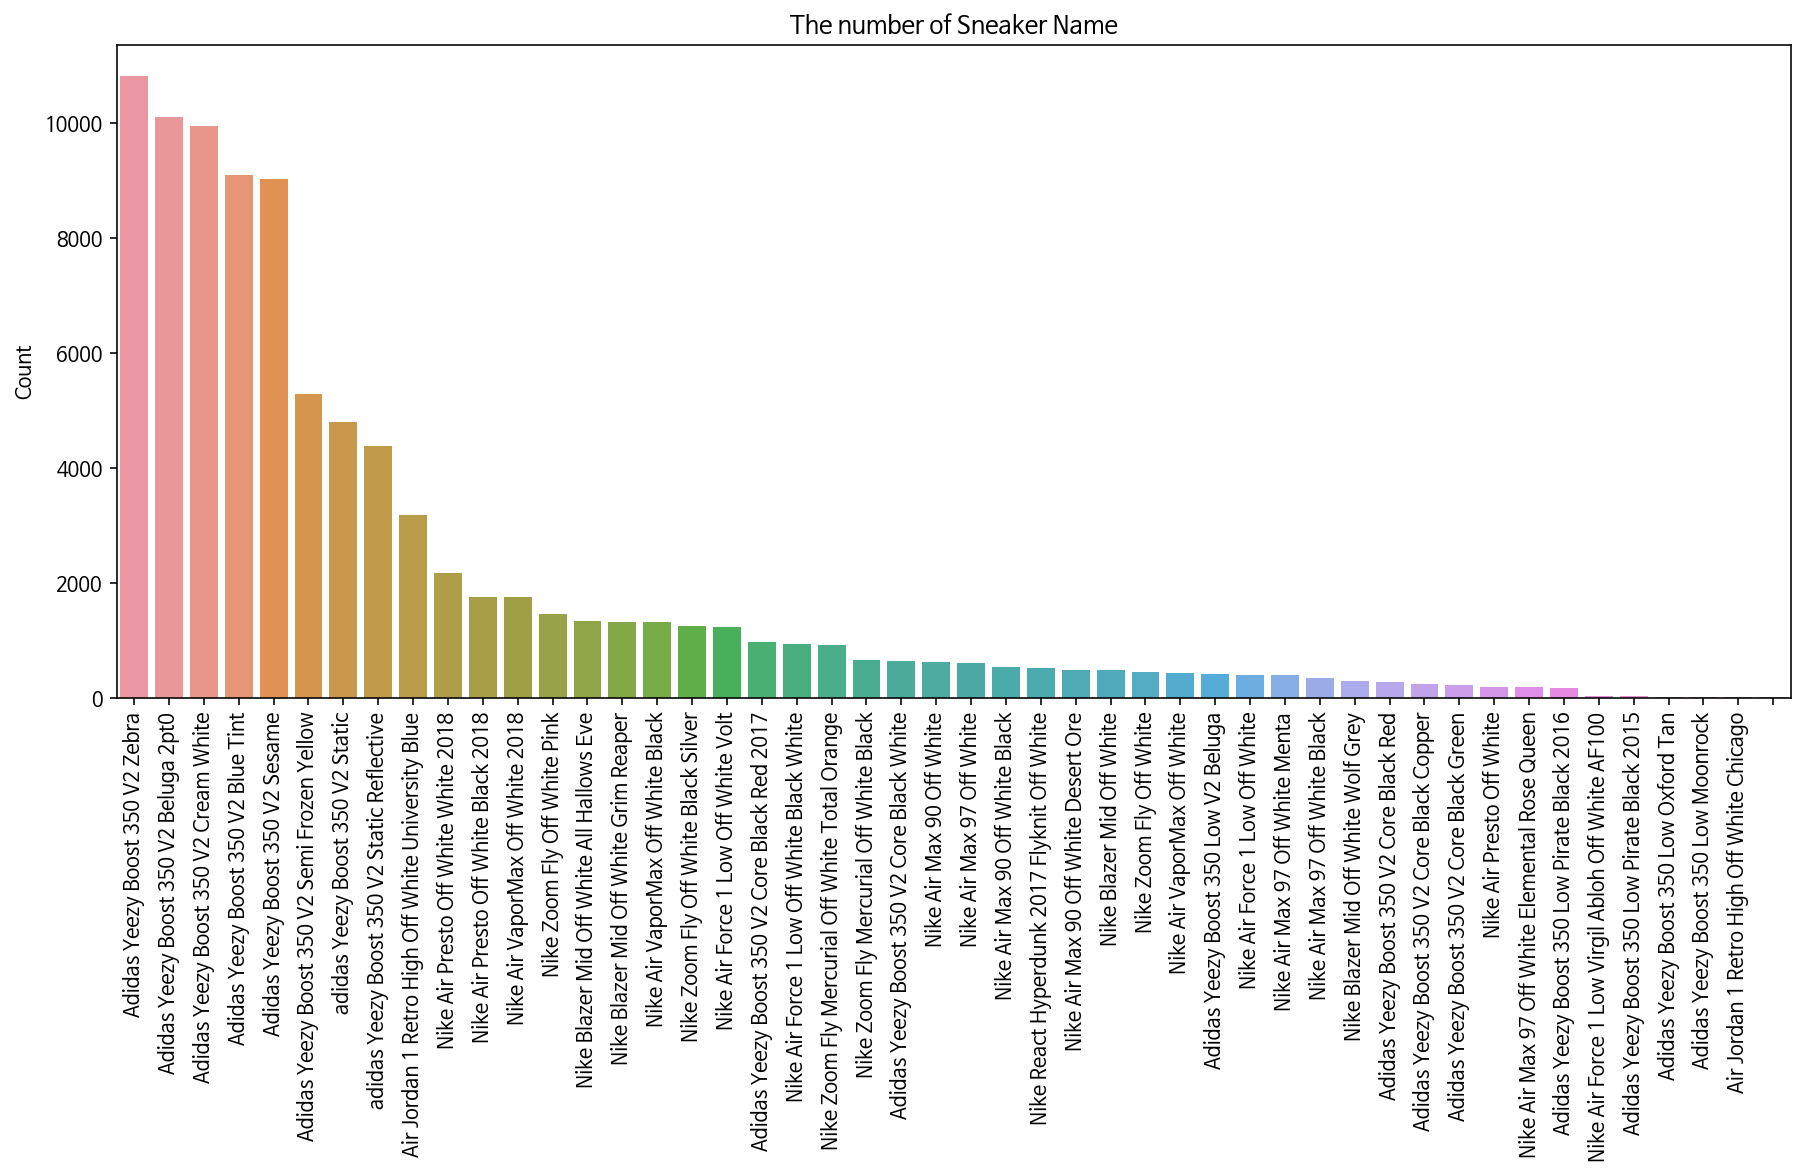

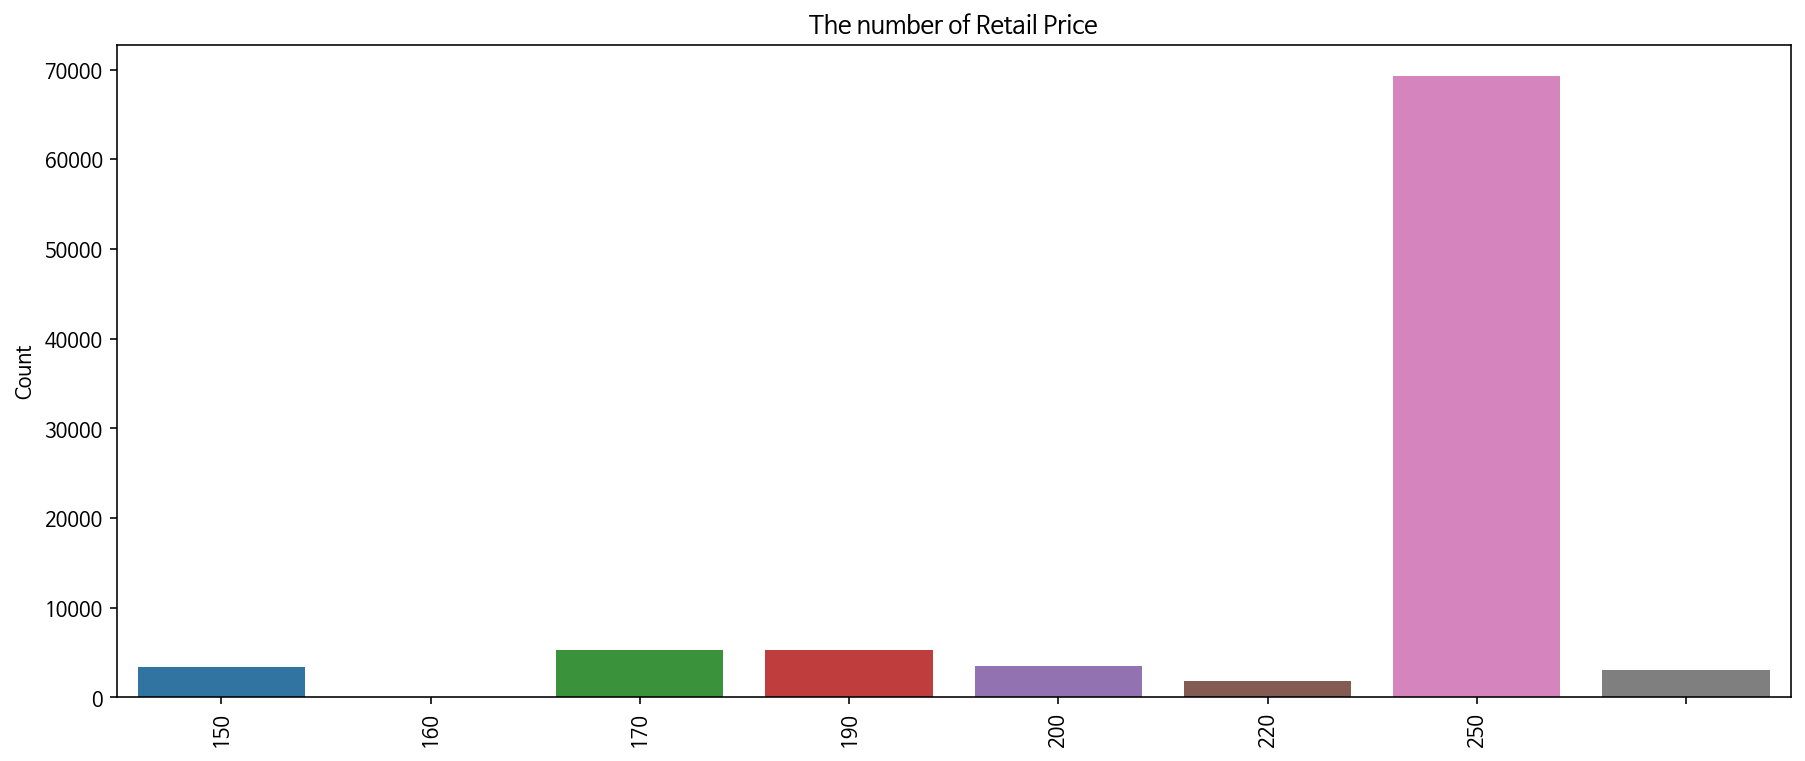

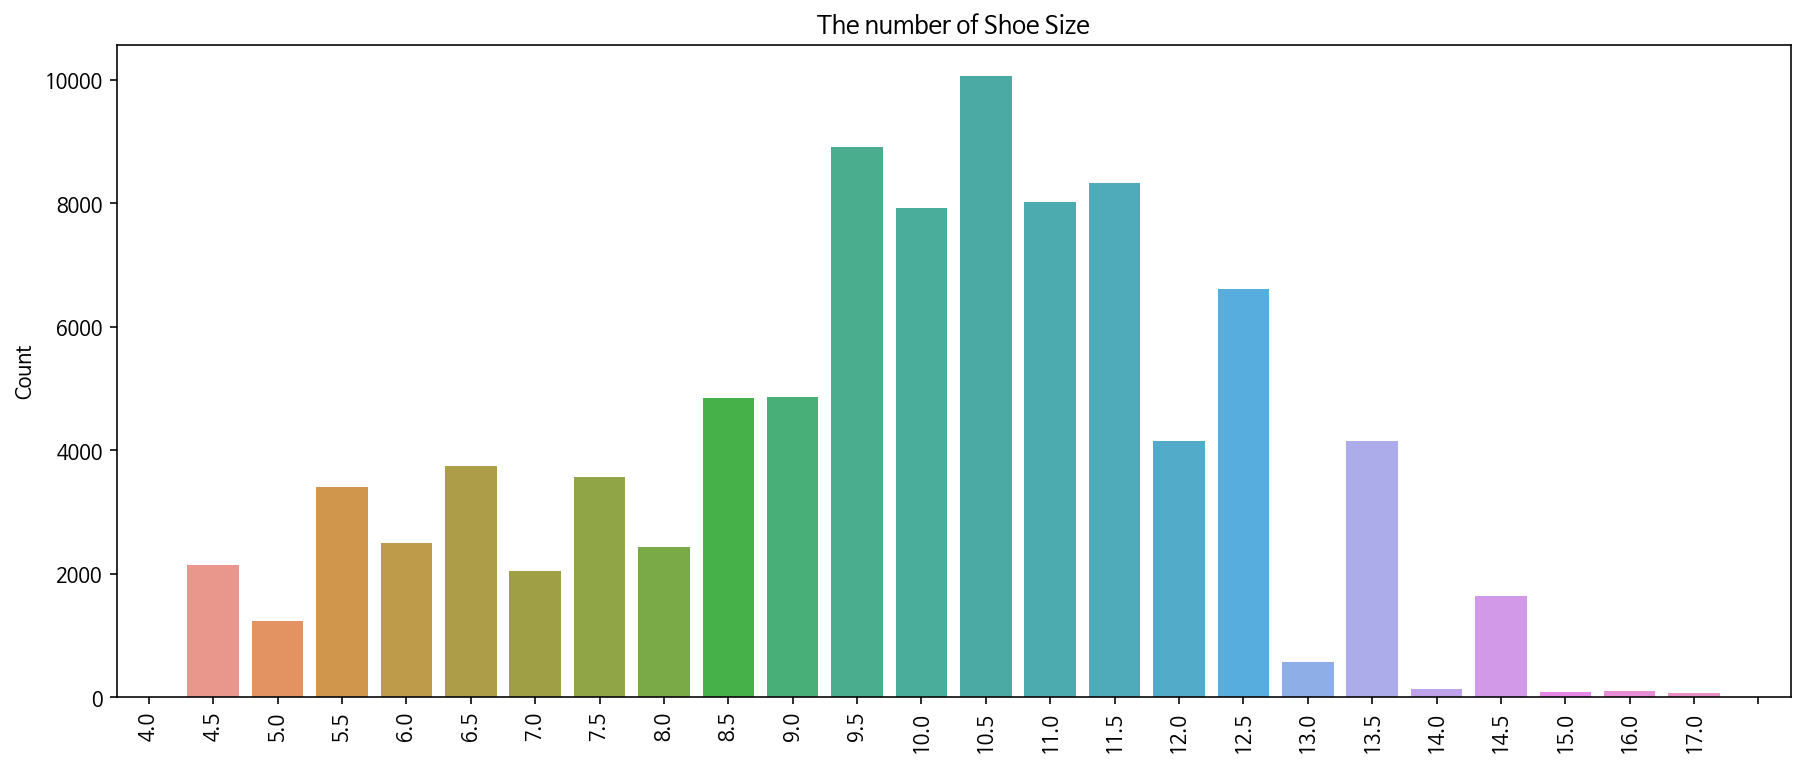

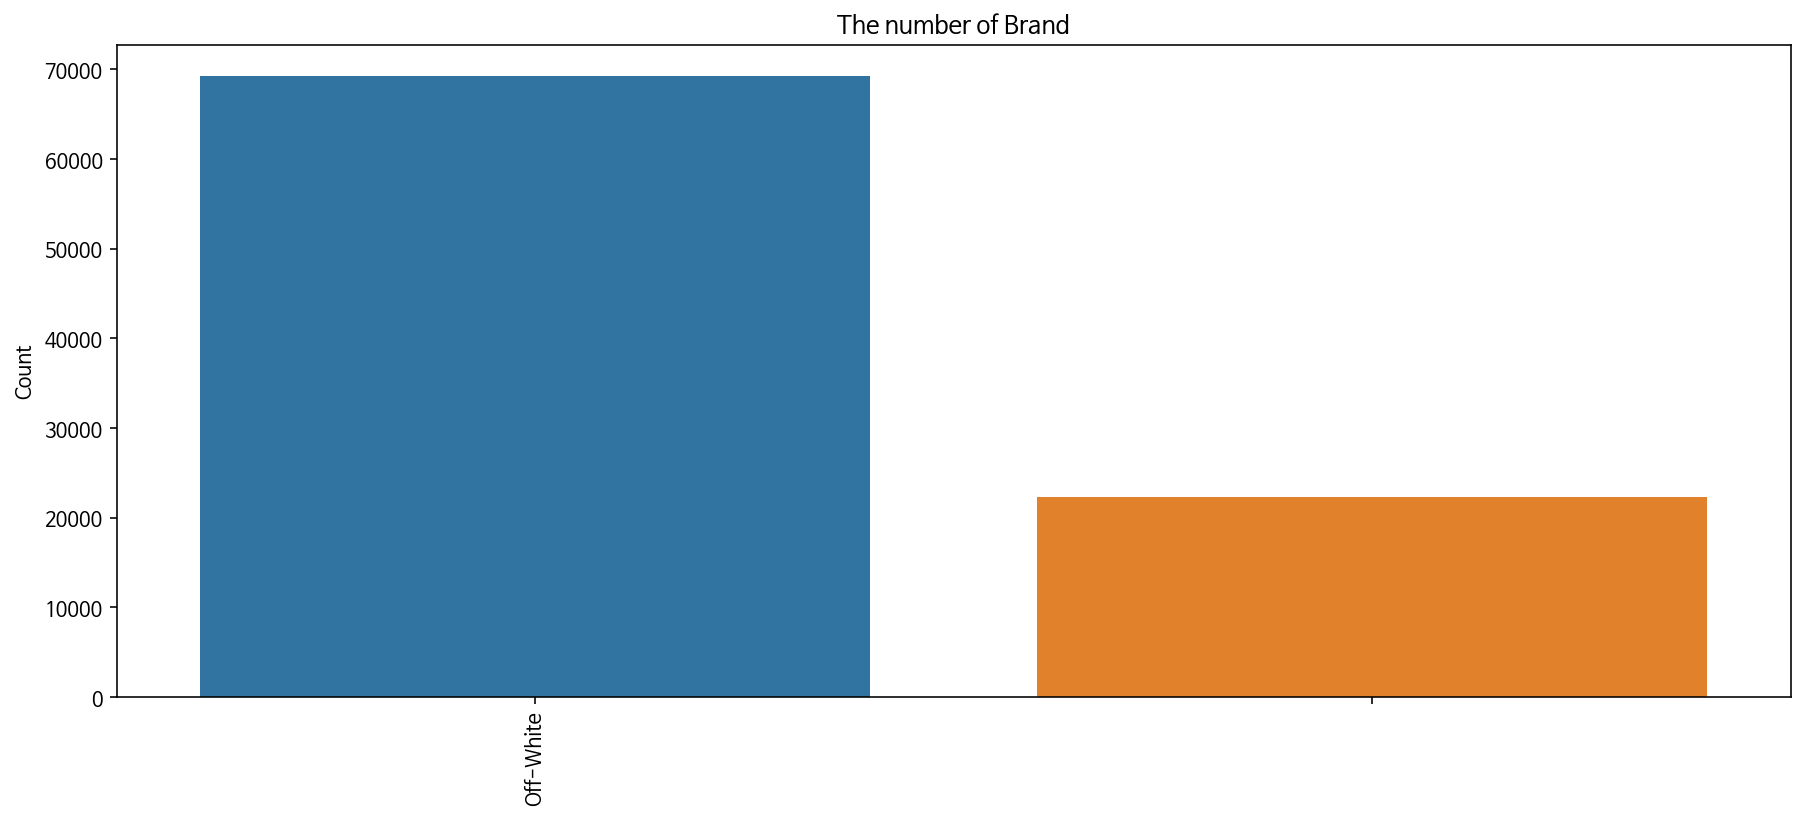

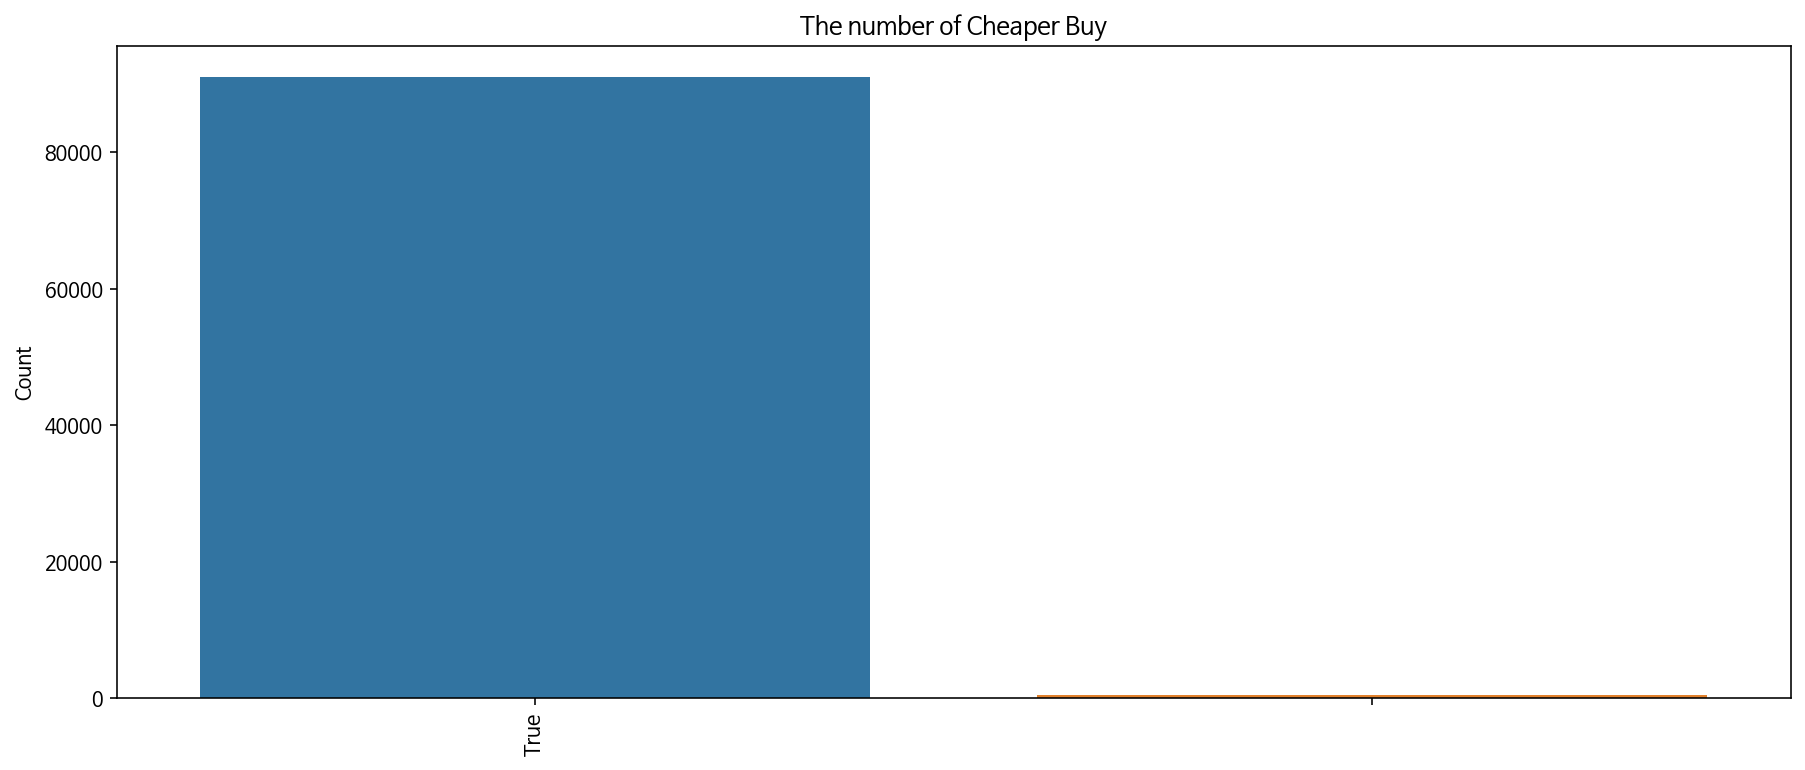

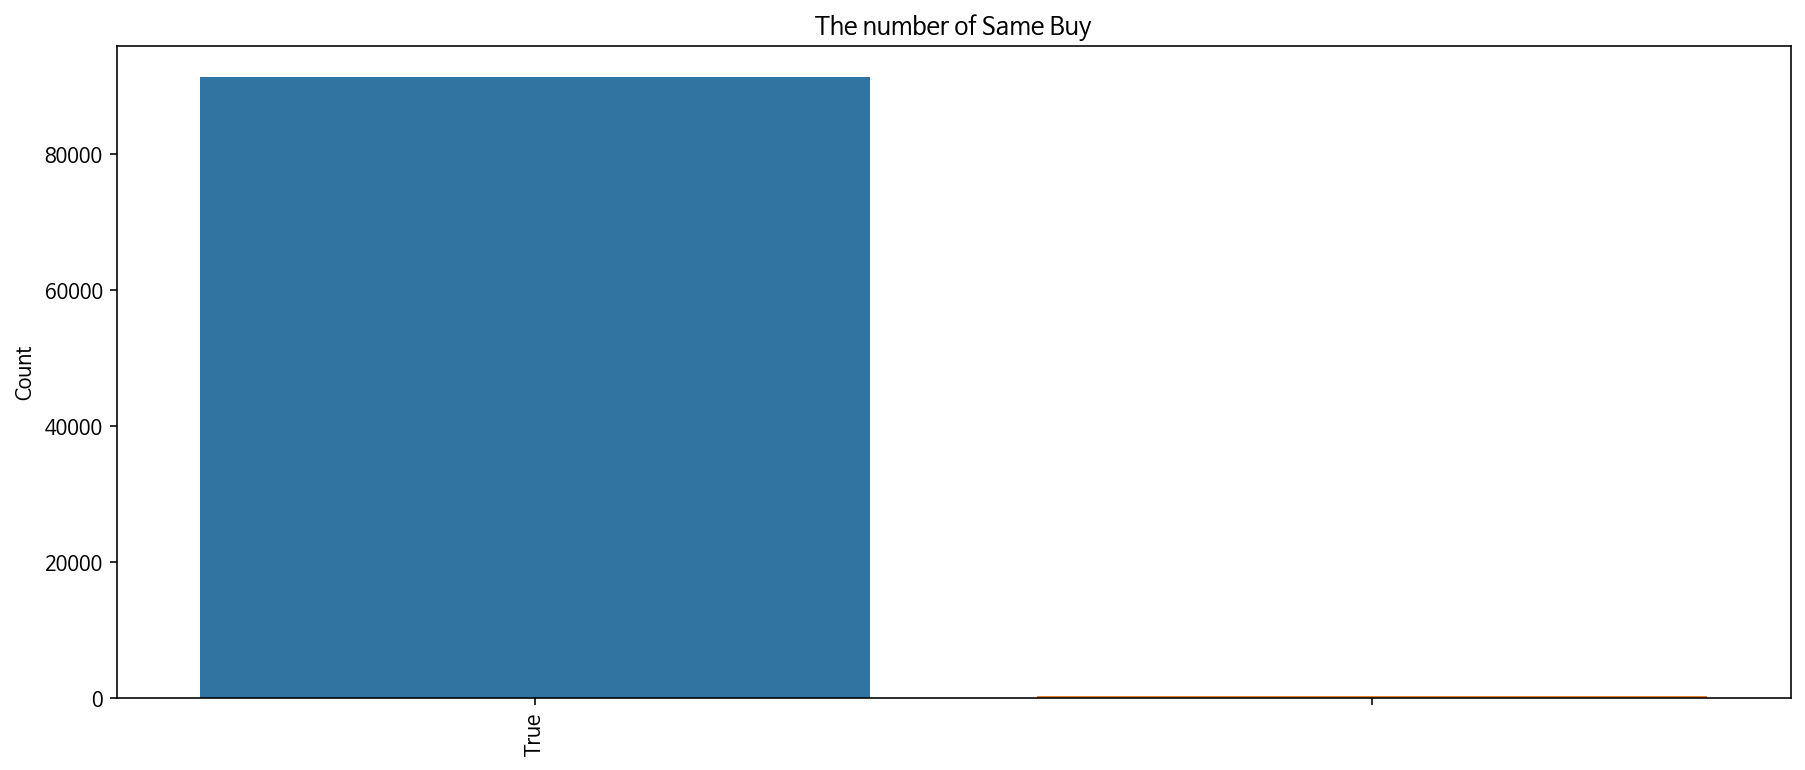

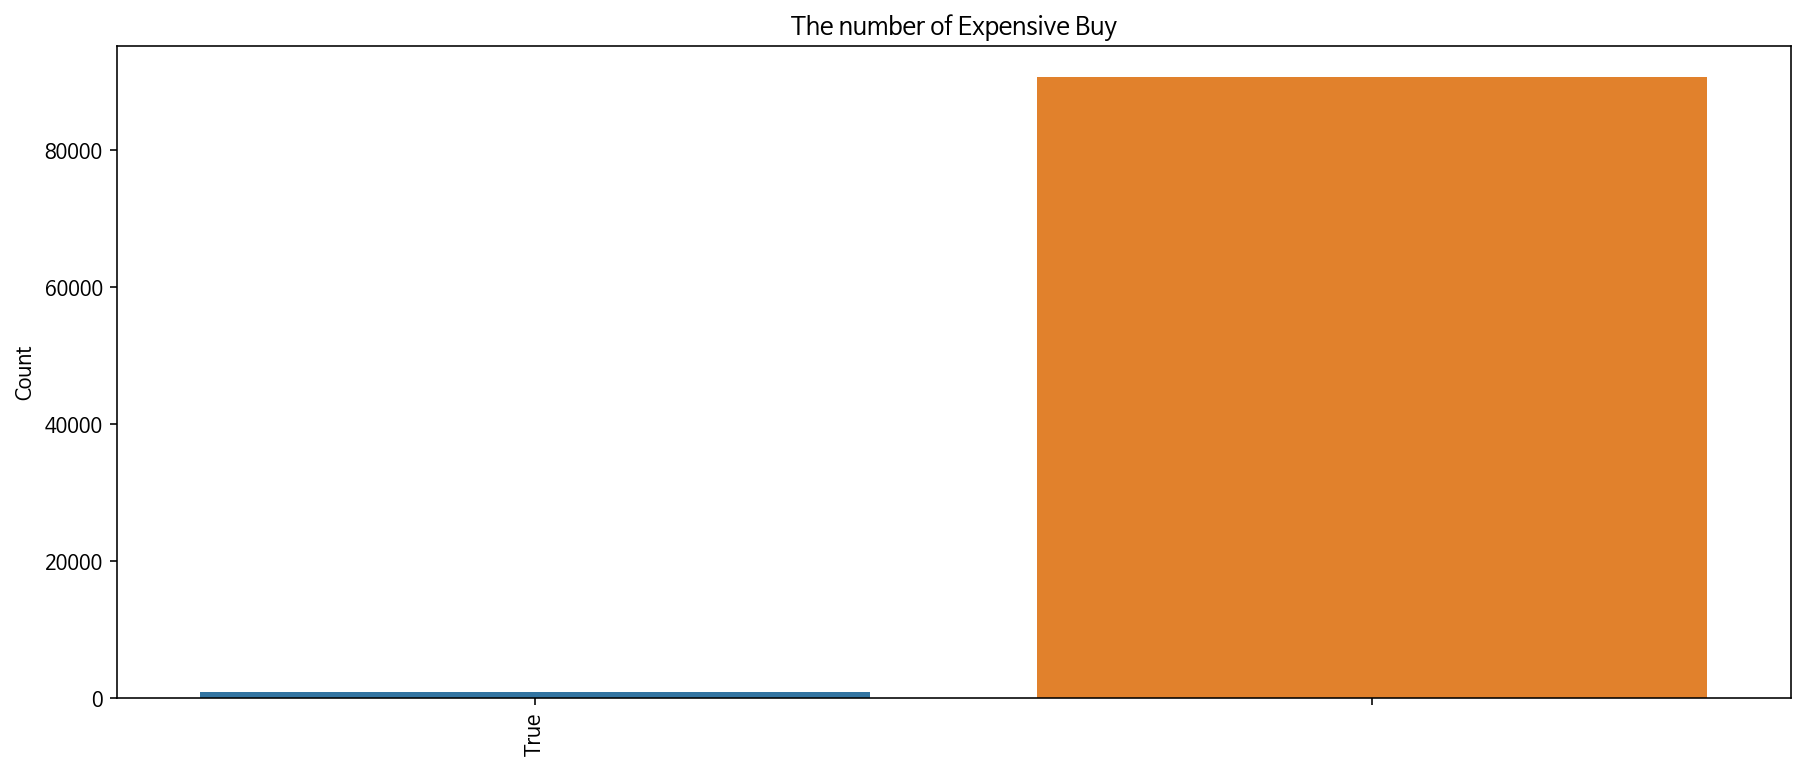

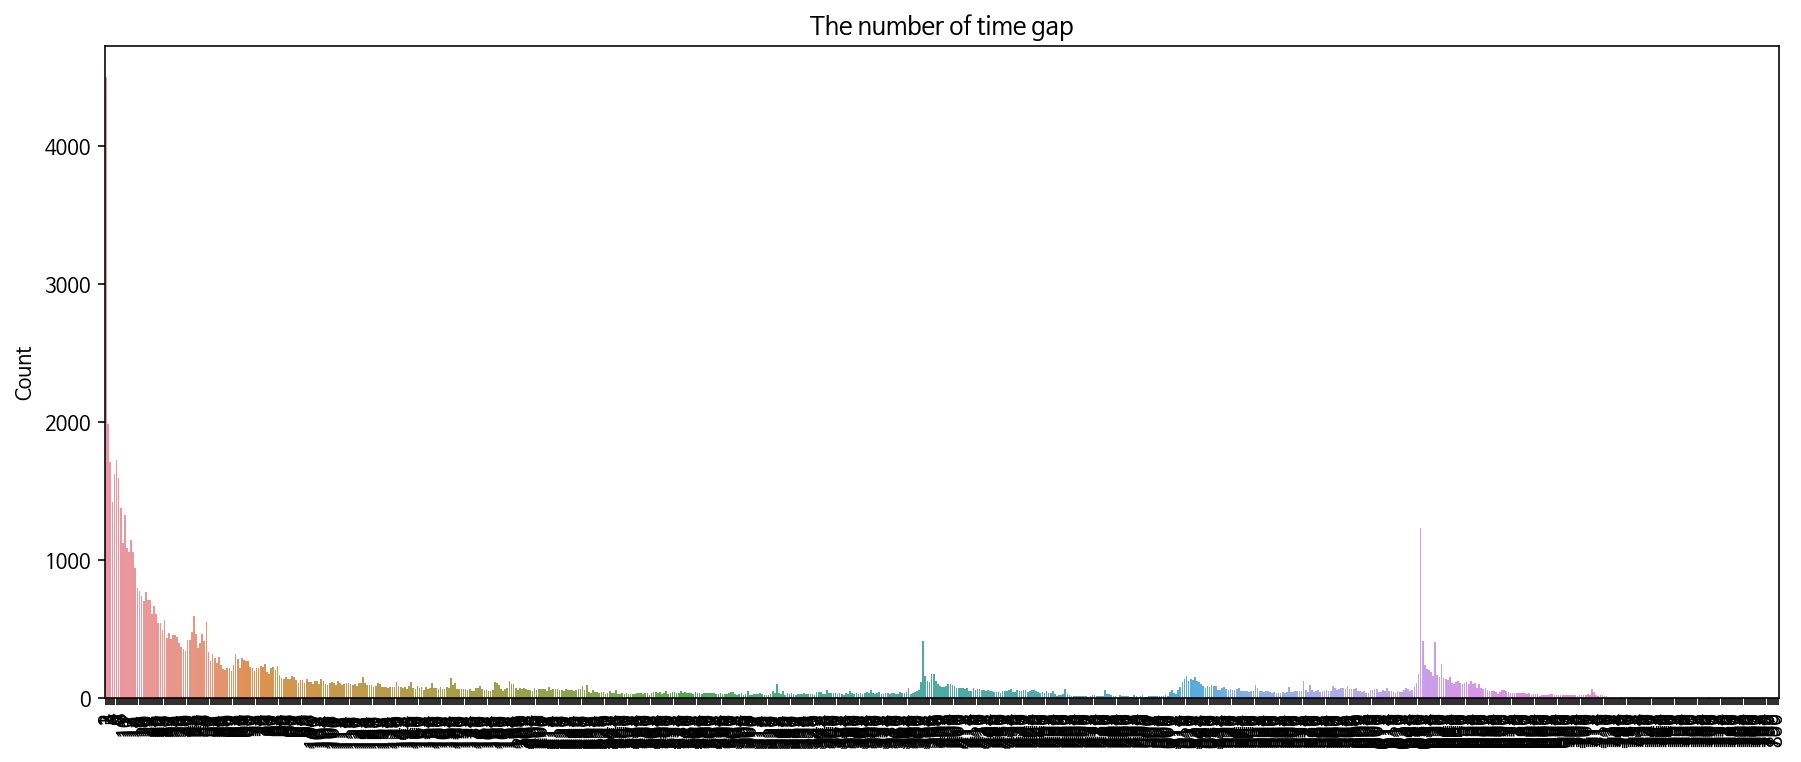

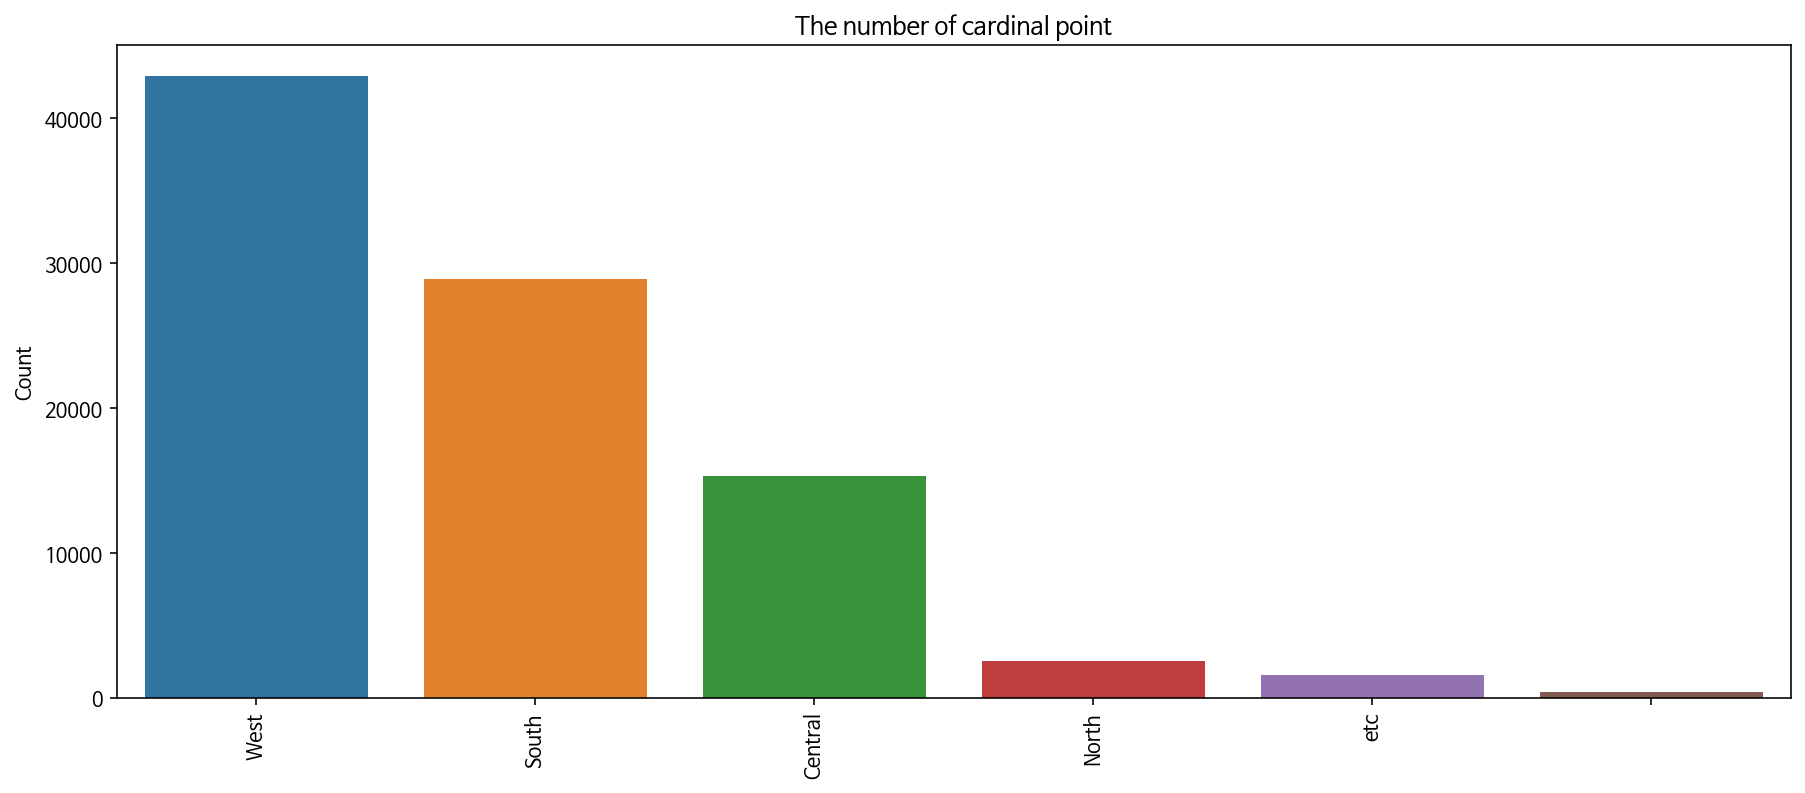

In [385]:
for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

# EDA

In [386]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return'],
      dtype='object')

In [387]:
bruh = df[['Sneaker Name' ,'Sale Price','Retail Price','Shoe Size','Brand','cardinal point','time gap']]
bruh.head()

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Brand,cardinal point,time gap
0,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11.0,Yeezy,West,282
1,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11.0,Yeezy,West,282
2,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,11.0,Yeezy,East,202
3,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,8.5,Yeezy,East,202
4,Adidas Yeezy Boost 350 V2 Core Black White,784,220,11.0,Yeezy,West,258


## 상품별 평균 가격

In [388]:
sneakernames = ['adidas Yeezy Boost 350 V2 Butter',
       'Adidas Yeezy Boost 350 V2 Beluga 2pt0',
       'Adidas Yeezy Boost 350 V2 Zebra',
       'Adidas Yeezy Boost 350 V2 Blue Tint',
       'Adidas Yeezy Boost 350 V2 Cream White',
       'Adidas Yeezy Boost 350 V2 Sesame', 'adidas Yeezy Boost 350 V2 Static',
       'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
       'Air Jordan 1 Retro High Off White University Blue',
       'adidas Yeezy Boost 350 V2 Static Reflective',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Air VaporMax Off White 2018',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper', 'Nike Zoom Fly Off White Pink',
       'Nike Air VaporMax Off White Black',
       'Nike Zoom Fly Off White Black Silver',
       'Nike Air Force 1 Low Off White Volt',
       'Adidas Yeezy Boost 350 V2 Core Black Red 2017',
       'Nike Air Force 1 Low Off White Black White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Air Max 90 Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 90 Off White Desert Ore',
       'Nike Zoom Fly Mercurial Off White Black', 'Nike Air Max 90 Off White',
       'Adidas Yeezy Boost 350 V2 Core Black White',
       'Nike Air Presto Off White', 'Nike Air Max 97 Off White',
       'Nike Air VaporMax Off White', 'Nike Blazer Mid Off White',
       'Adidas Yeezy Boost 350 Low V2 Beluga',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Air Force 1 Low Off White', 'Nike Zoom Fly Off White',
       'Nike Air Max 97 Off White Menta',
       'Air Jordan 1 Retro High Off White White',
       'Adidas Yeezy Boost 350 V2 Core Black Red',
       'Nike Air Max 97 Off White Black',
       'Nike Blazer Mid Off White Wolf Grey',
       'Adidas Yeezy Boost 350 V2 Core Black Copper',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Adidas Yeezy Boost 350 V2 Core Black Green',
       'Adidas Yeezy Boost 350 Low Pirate Black 2016',
       'Adidas Yeezy Boost 350 Low Moonrock',
       'Adidas Yeezy Boost 350 Low Pirate Black 2015',
       'Adidas Yeezy Boost 350 Low Oxford Tan',
       'Adidas Yeezy Boost 350 Low Turtledove',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100'
       ]

In [389]:
avgs_price=[]

for name in sneakernames:
  shoerow = bruh.loc[bruh['Sneaker Name']==name]
  avgs_price.append(shoerow.mean()[0])

AvgPrice = pd.Series(avgs_price)
SneakerName = pd.Series(sneakernames)

avgprice_df = pd.DataFrame(columns=['Sneaker_Name','Average_Price'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Price'] = AvgPrice

avgprice_df.head()

,Sneaker_Name,Average_Price
0,adidas Yeezy Boost 350 V2 Butter,266.683213
1,Adidas Yeezy Boost 350 V2 Beluga 2pt0,396.413838
2,Adidas Yeezy Boost 350 V2 Zebra,361.272206
3,Adidas Yeezy Boost 350 V2 Blue Tint,378.082225
4,Adidas Yeezy Boost 350 V2 Cream White,288.708805


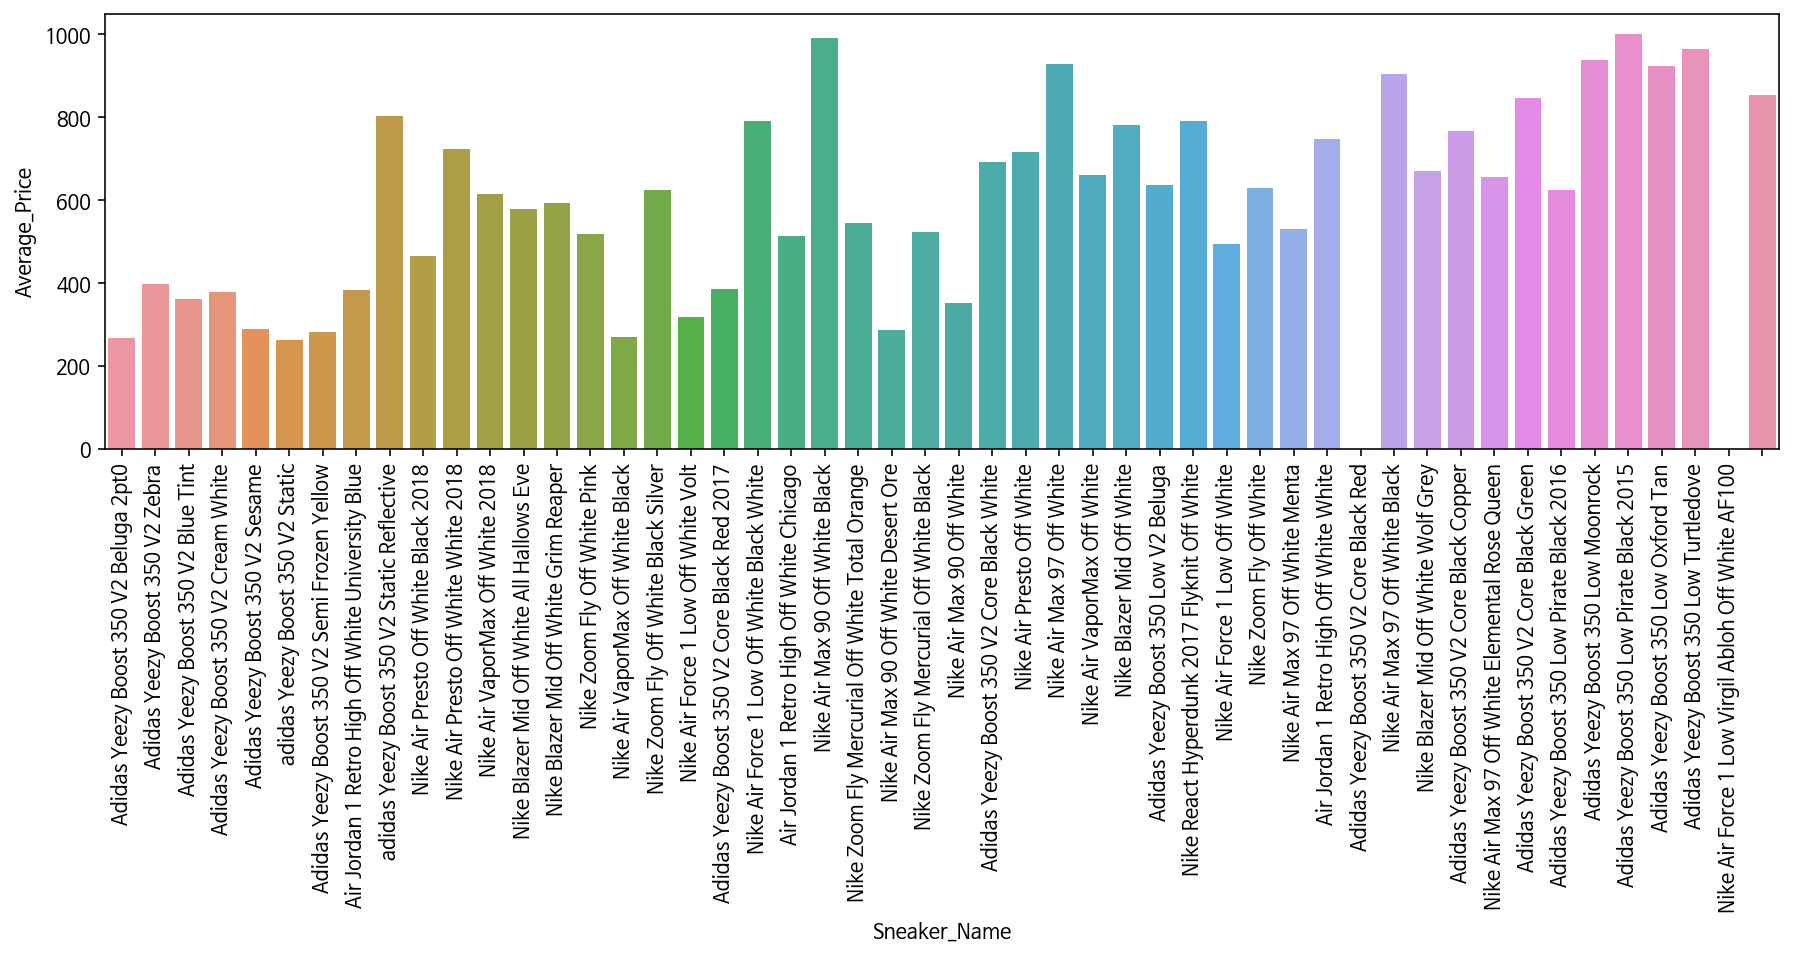

In [390]:
fig_dims = (15,4)
fig,ax = plt.subplots(figsize = fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'], y=avgprice_df['Average_Price'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

## 브랜드별 평균 가격

### 2017~2019 StockX (Train data)

In [391]:
bruh['Sneaker Name'] = bruh['Sneaker Name'].apply(lambda x: x.replace('adidas','Adidas'))
bruh['split'] = bruh['Sneaker Name'].apply(lambda x: x.split(' '))
brand_new = []
for i in range(len(bruh['split'])):
  if 'Adidas' in bruh['split'][i]:
    brand_new.append('Adidas')
  elif 'Nike' in bruh['split'][i]:
    brand_new.append('Nike')
  elif 'Jordan' in bruh['split'][i]:
    brand_new.append('Jordan')

bruh['Brand'] = brand_new
bruh = bruh.drop('split',axis=1)
bruh.head()

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Brand,cardinal point,time gap
0,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11.0,Adidas,West,282
1,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11.0,Adidas,West,282
2,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,11.0,Adidas,East,202
3,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,8.5,Adidas,East,202
4,Adidas Yeezy Boost 350 V2 Core Black White,784,220,11.0,Adidas,West,258


Adidas average price : $353.28518443687585
Nike average price : $548.177461848188
Jordan average price : $802.3665137614679


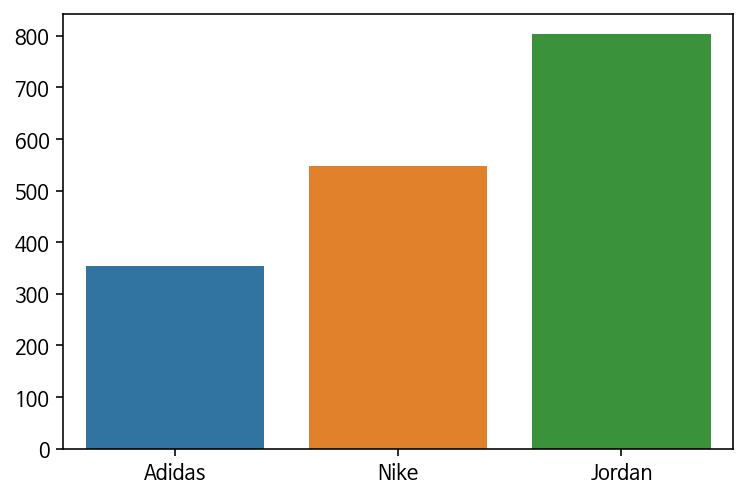

In [392]:
avgs_price2 =[]
target_df = bruh[['Brand','Sale Price']]
brands = ['Adidas','Nike','Jordan']

for brands_index in range(len(brands)):
  brandrow = target_df.loc[target_df['Brand'] == str(brands[brands_index])]
  avgs_price2.append(brandrow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{brands[i]} average price : $' + str(avgs_price2[i]))

sns.barplot(x = brands, y= avgs_price2)

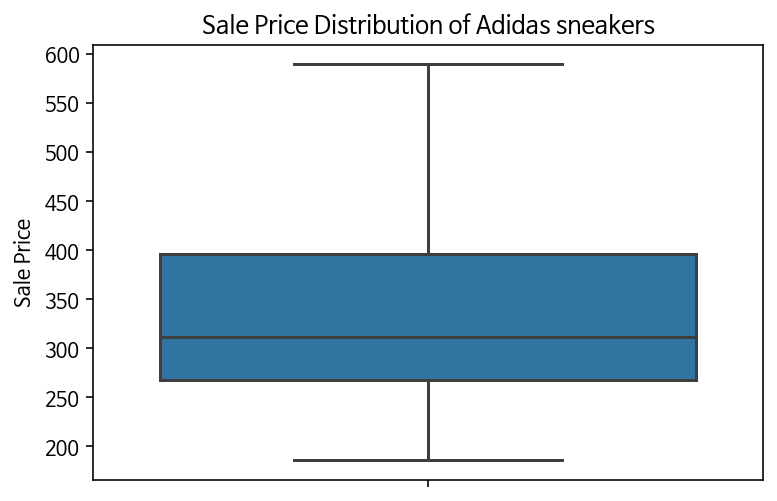

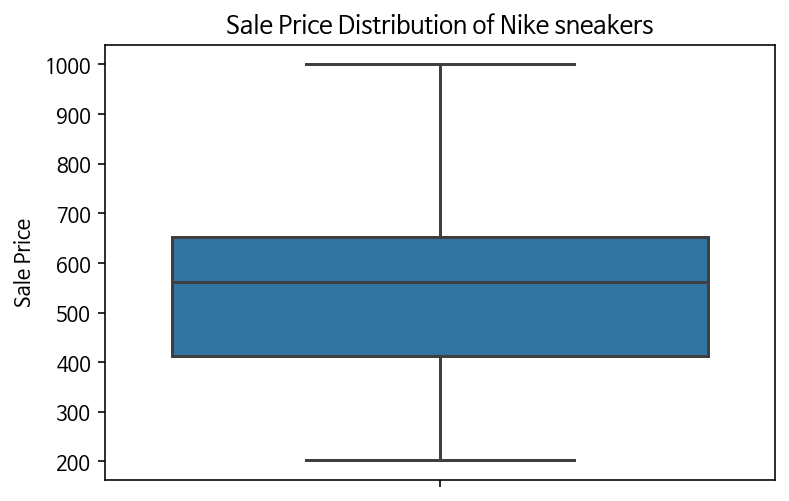

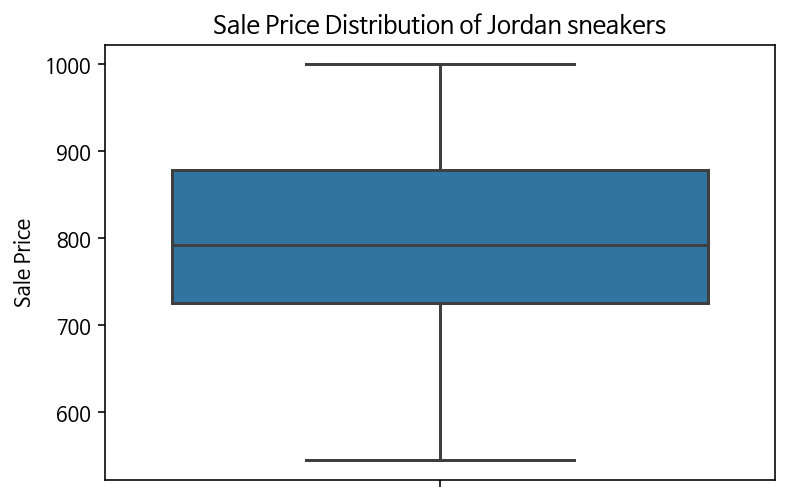

In [393]:
for brand in brands:
  brandrow = target_df.loc[target_df['Brand']==brand]
  chart = sns.boxplot(y=brandrow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
  plt.show()
  

### 2022 StockX (Test data)

In [394]:
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격,Crowling_Data,time gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,738317,209,738321,4
2,Jordan 4 Retro Infrared,Jordan,200,738321,333,738321,0
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,738316,566,738321,5
5,adidas Yeezy Boost 700 MNVN Laceless Phosphor,Adidas,220,738319,217,738321,2


In [395]:
test_df2 = test_df2.rename(columns = {
    'Sneaker_Name' : 'Sneaker Name',
    'retail Price' : 'Retail Price',
    '평균신발가격' : 'Sale Price'
})
test_df2.head()

,Sneaker Name,Brand,Retail Price,Release Date,Sale Price,Crowling_Data,time gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,738317,209,738321,4
2,Jordan 4 Retro Infrared,Jordan,200,738321,333,738321,0
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,738316,566,738321,5
5,adidas Yeezy Boost 700 MNVN Laceless Phosphor,Adidas,220,738319,217,738321,2


Adidas average price : $226.52592592592592
Nike average price : $183.28971962616822
Jordan average price : $233.56


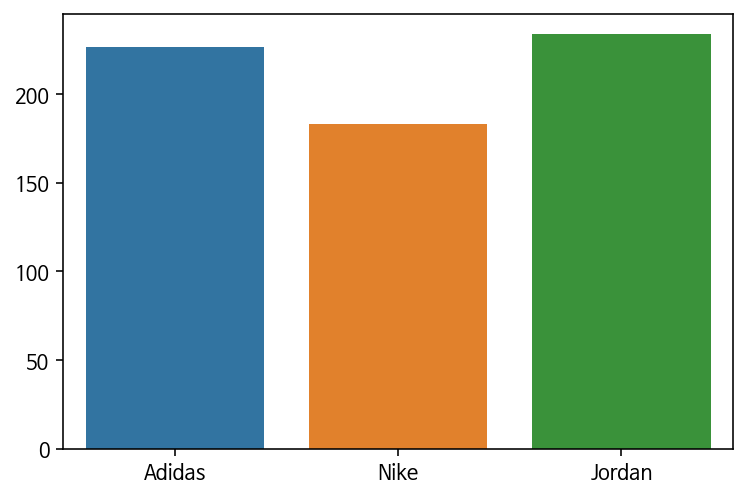

In [396]:
avgs_price2 =[]
target_df = test_df2[['Brand','Sale Price']]
brands = ['Adidas','Nike','Jordan']

for brands_index in range(len(brands)):
  brandrow = target_df.loc[target_df['Brand'] == str(brands[brands_index])]
  avgs_price2.append(brandrow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{brands[i]} average price : $' + str(avgs_price2[i]))

sns.barplot(x = brands, y= avgs_price2)

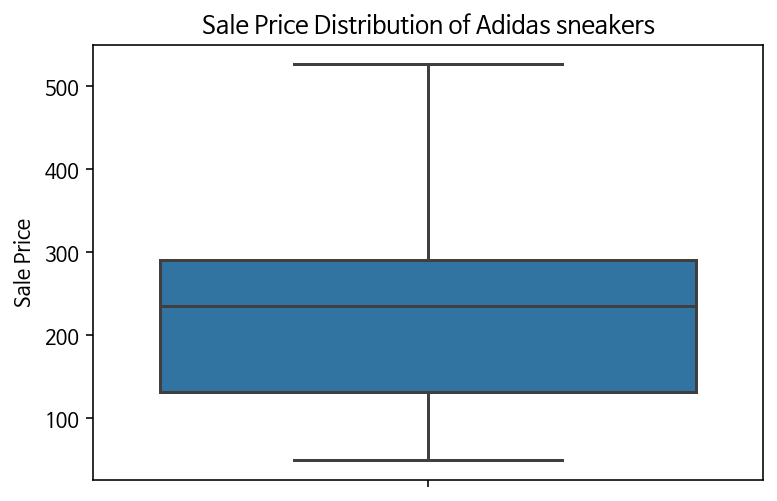

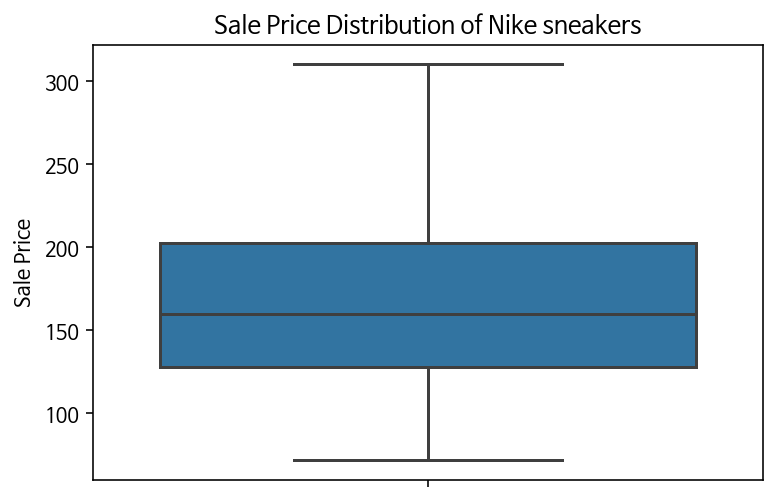

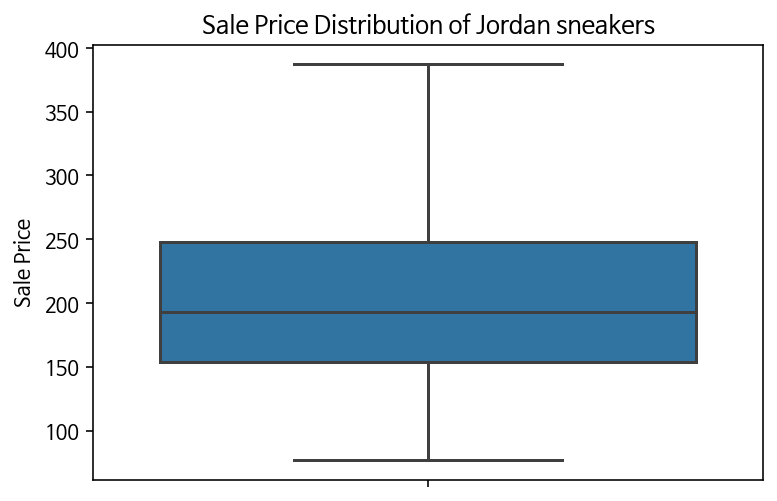

In [397]:
for brand in brands:
  brandrow = target_df.loc[target_df['Brand']==brand]
  chart = sns.boxplot(y=brandrow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
  plt.show()
  

### 2022 Kream (Non click)

In [398]:
kream_nonclick = Average_df.copy()
kream_nonclick.head()

,브랜드,평균구매가,평균거래량,평균저장수,평균피드수
0,Nike,251801.282051,8527.108974,11373.153846,11373.153846
1,Jordan,352070.175439,6921.929825,11668.412281,11668.412281
2,New Balance,220500.000000,8890.000000,7021.880952,7021.880952
3,Adidas,253900.000000,2853.025000,4339.425000,4339.425000


Text(0.5, 1.0, '평균구매가')

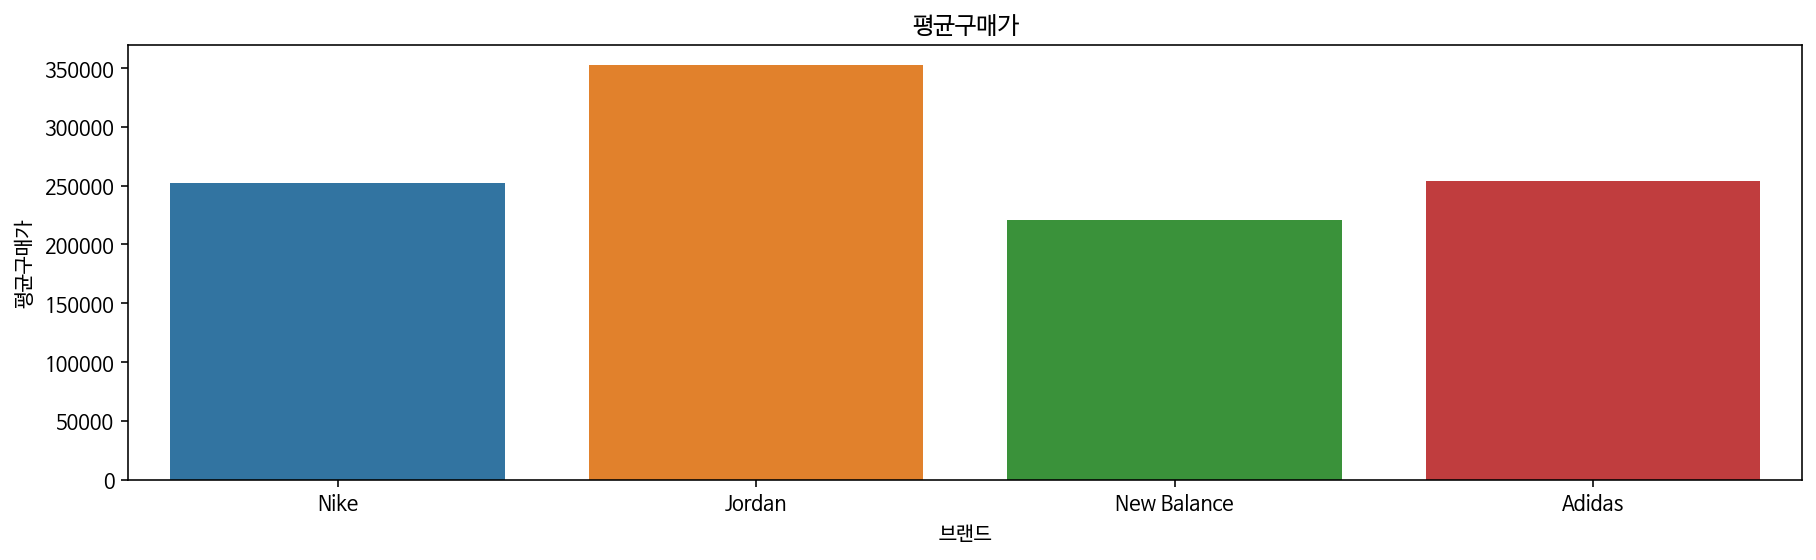

In [399]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균구매가')
chart.set_title('평균구매가')

Text(0.5, 1.0, '평균거래량')

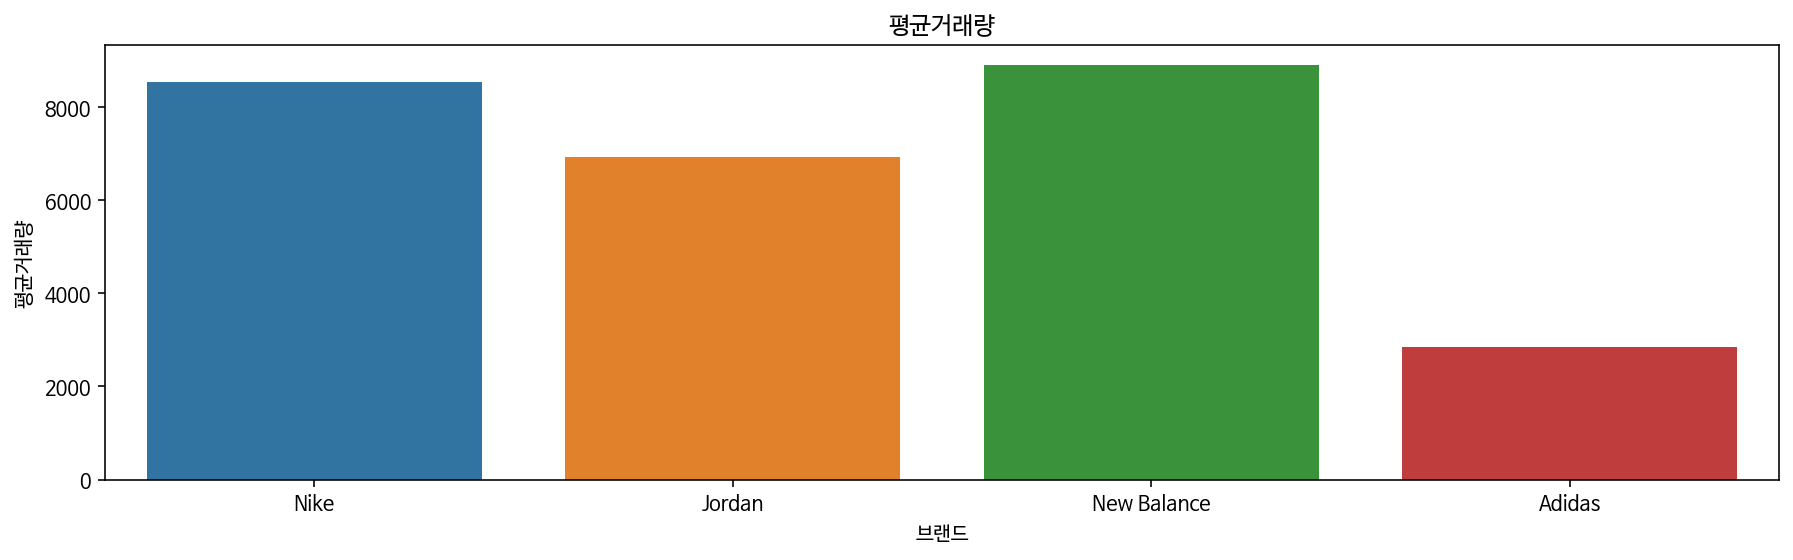

In [400]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균거래량')
chart.set_title('평균거래량')

Text(0.5, 1.0, '평균저장수')

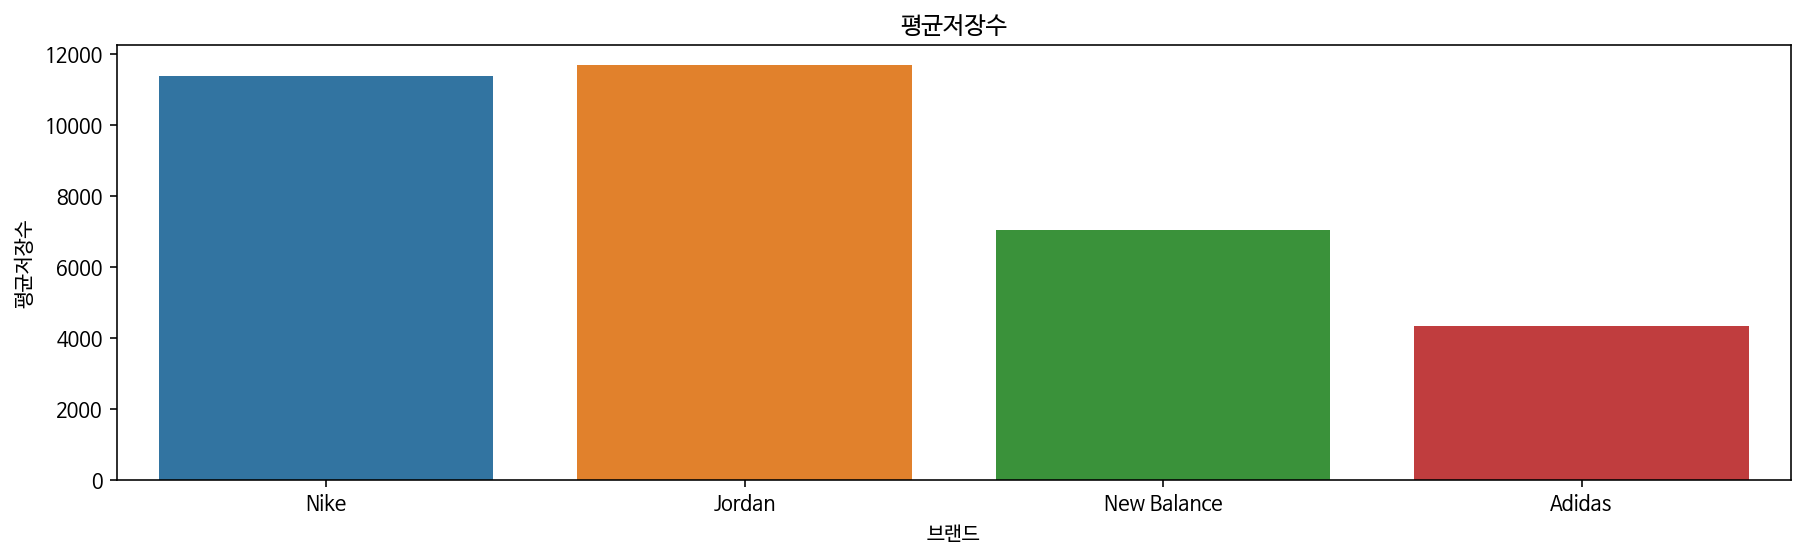

In [401]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균저장수')
chart.set_title('평균저장수')

Text(0.5, 1.0, '평균피드수')

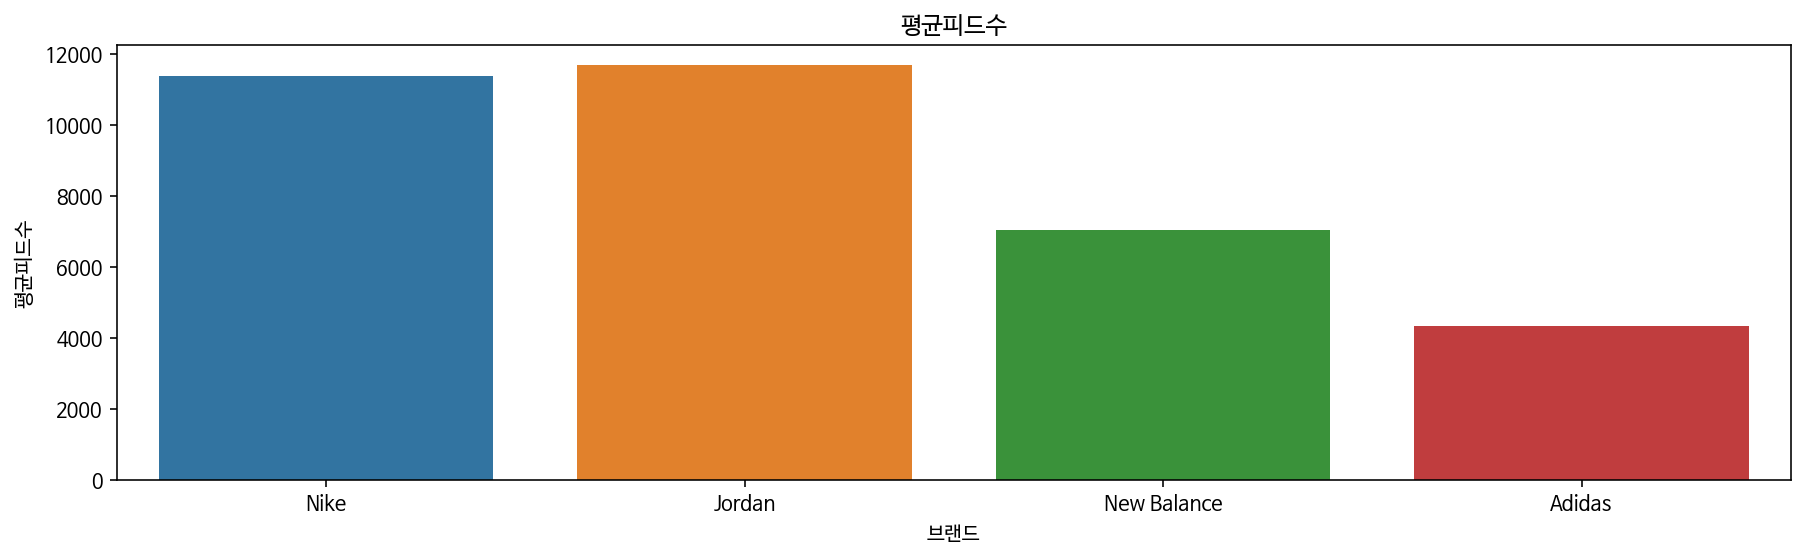

In [402]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균피드수')
chart.set_title('평균피드수')

## 사이즈별 평균 가격

### 2017~2019 StockX (Train data)

10.0 average price : $427.4048305337442
9.0 average price : $408.93073641670406
11.0 average price : $431.76779925561294
10.5 average price : $408.2010463378176
9.5 average price : $404.10790005047954
12.0 average price : $415.0191929877588
8.5 average price : $395.8832716810522
8.0 average price : $411.5346391752577
11.5 average price : $399.6669076885997
13.0 average price : $423.86206896551727
6.0 average price : $393.70542635658916
7.0 average price : $393.049299719888
5.0 average price : $371.06226138032304
5.5 average price : $361.36625349860054
7.5 average price : $389.995904995905
4.0 average price : $370.39804013065793
6.5 average price : $397.17391304347825
14.0 average price : $408.468253968254
4.5 average price : $368.5264012997563
12.5 average price : $391.17098445595855
13.5 average price : $383.5874125874126
15.0 average price : $557.8828828828829
14.5 average price : $444.7831325301205
16.0 average price : $639.072463768116
3.5 average price : $503.75
17.0 average price

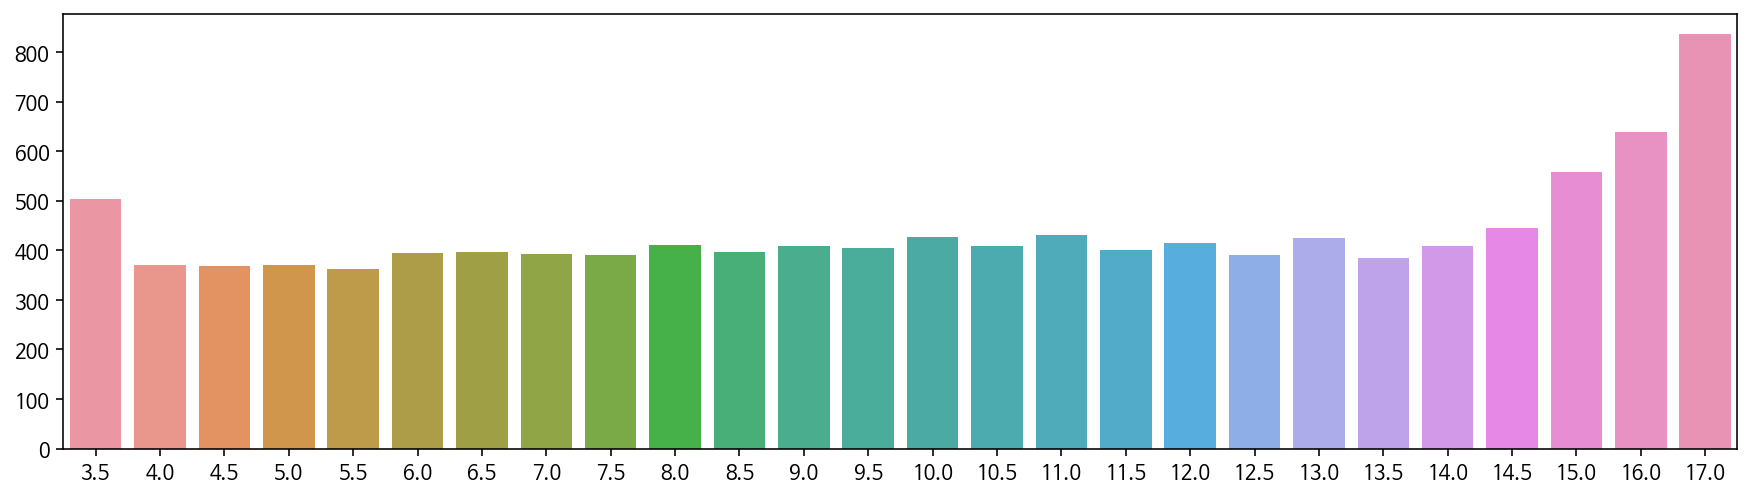

In [403]:
avgs_price2 =[]
target_df = bruh[['Shoe Size','Sale Price']]
Shoe_size = bruh['Shoe Size'].value_counts().index.tolist()

for Shoe_size_index in range(len(Shoe_size)):
  shoerow = target_df.loc[target_df['Shoe Size'] == Shoe_size[Shoe_size_index]]
  avgs_price2.append(shoerow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{Shoe_size[i]} average price : $' + str(avgs_price2[i]))

plt.figure(figsize=(15,4))
sns.barplot(x = Shoe_size, y= avgs_price2)

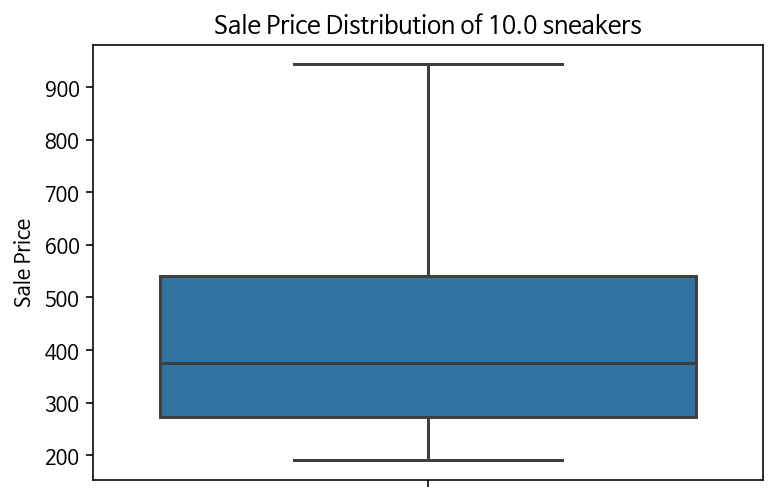

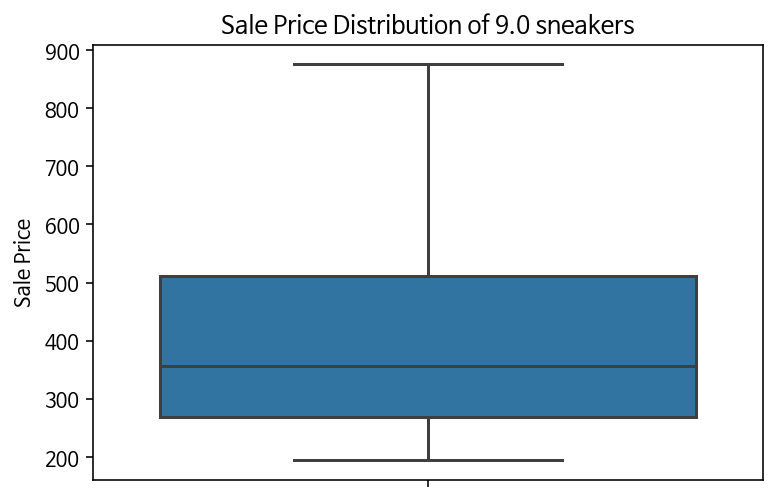

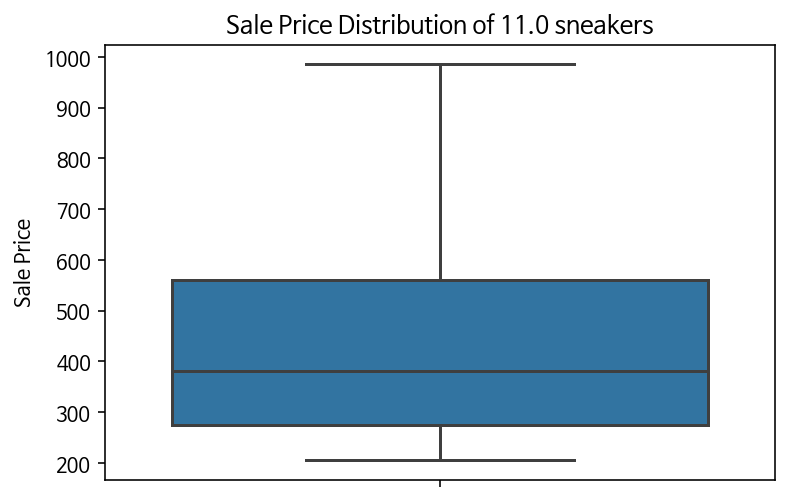

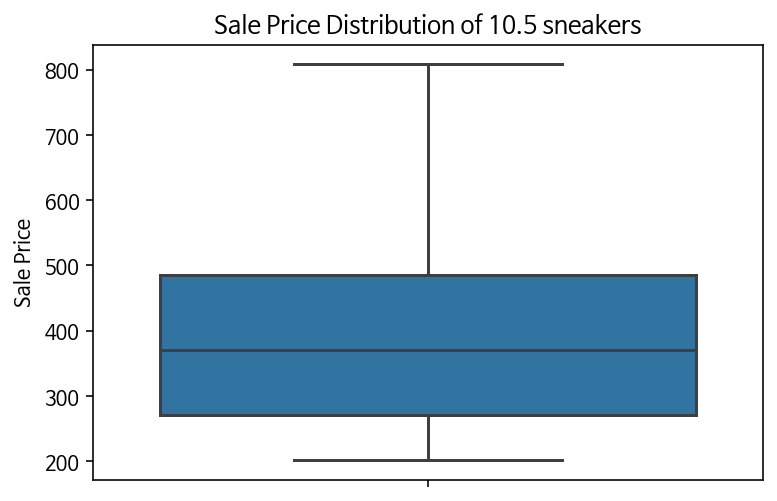

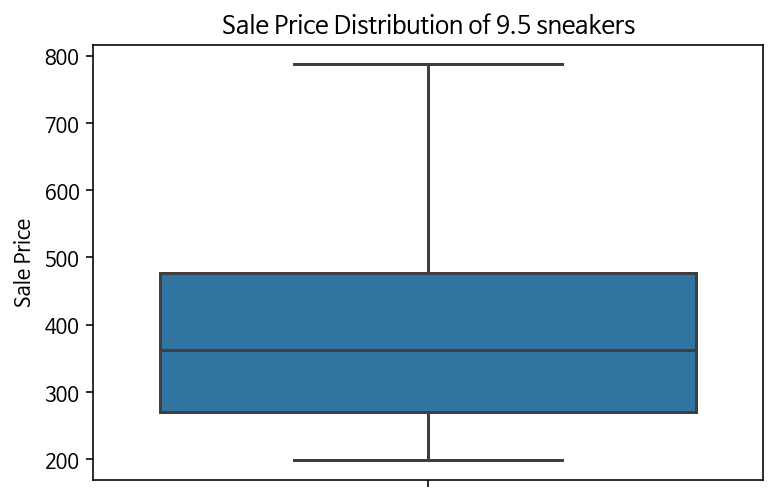

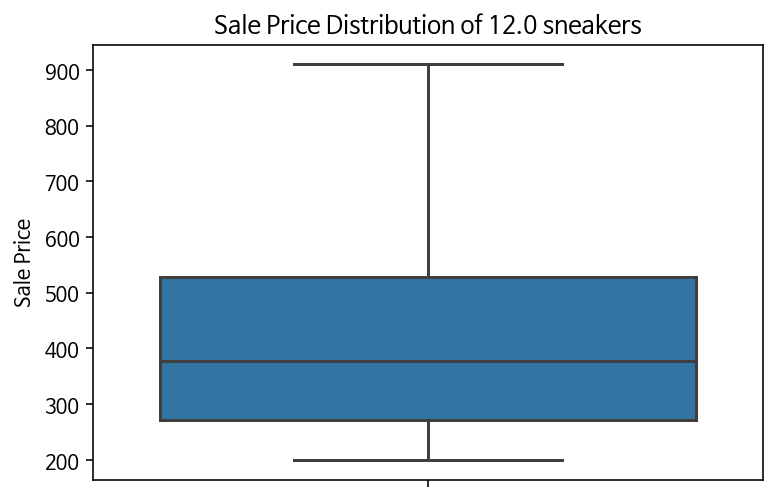

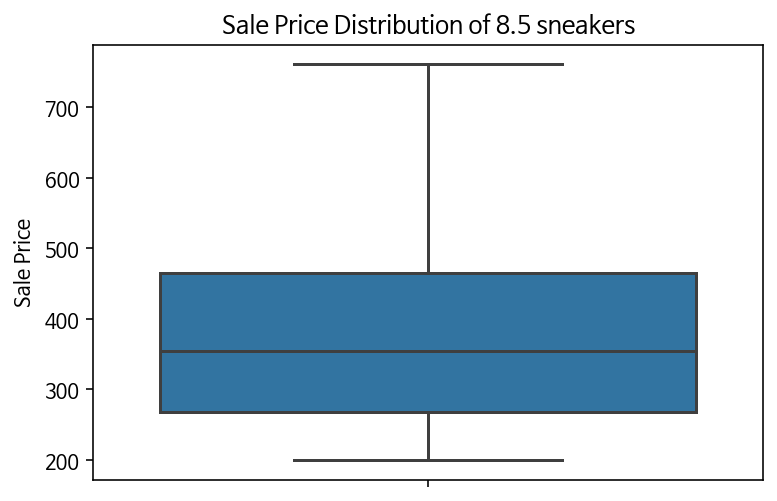

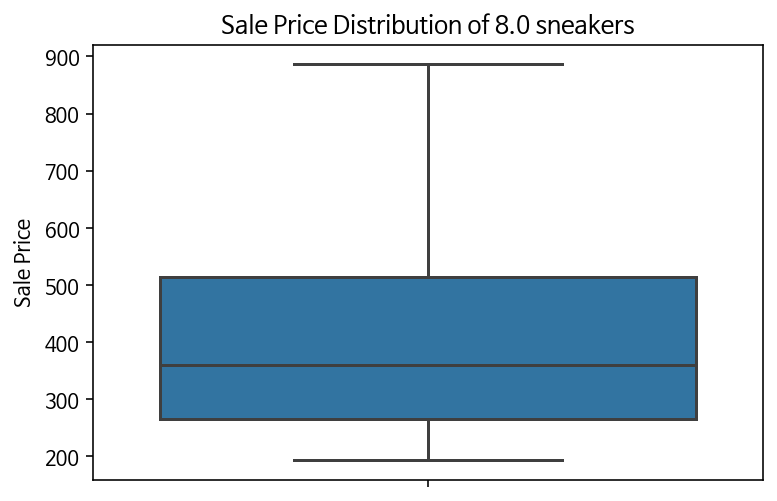

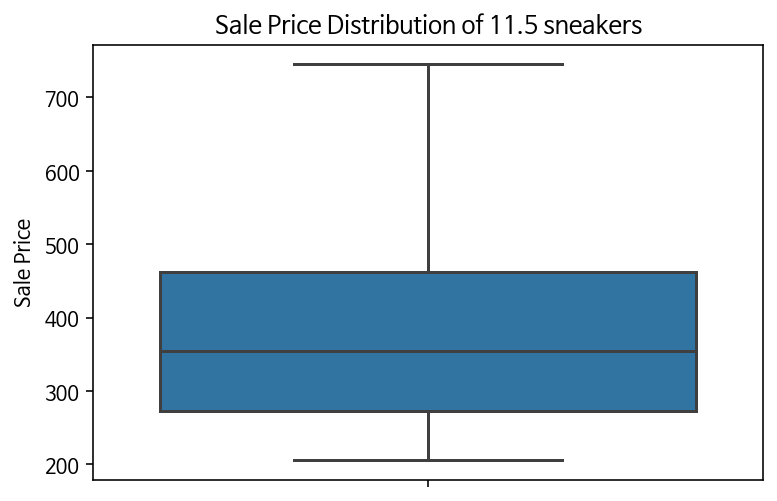

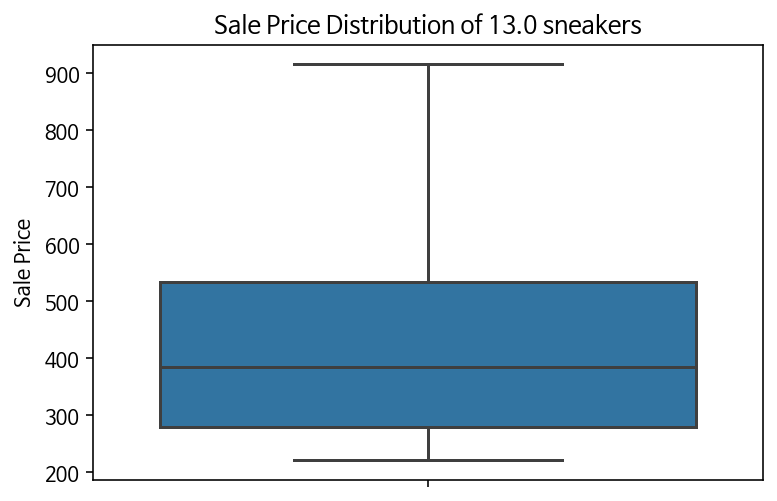

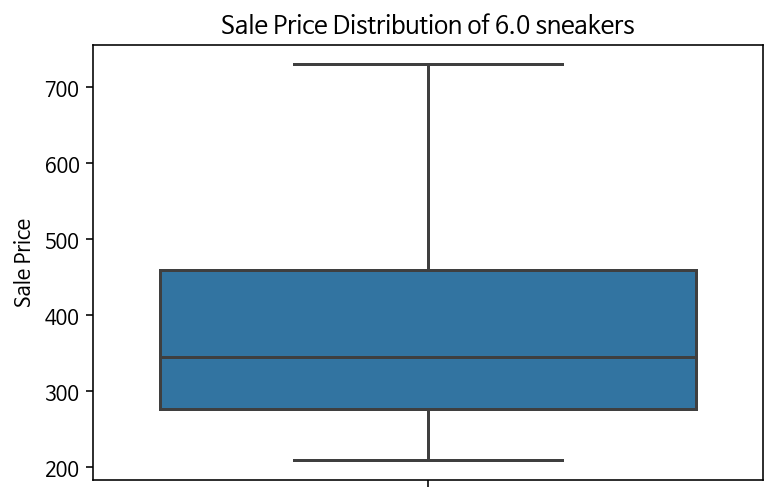

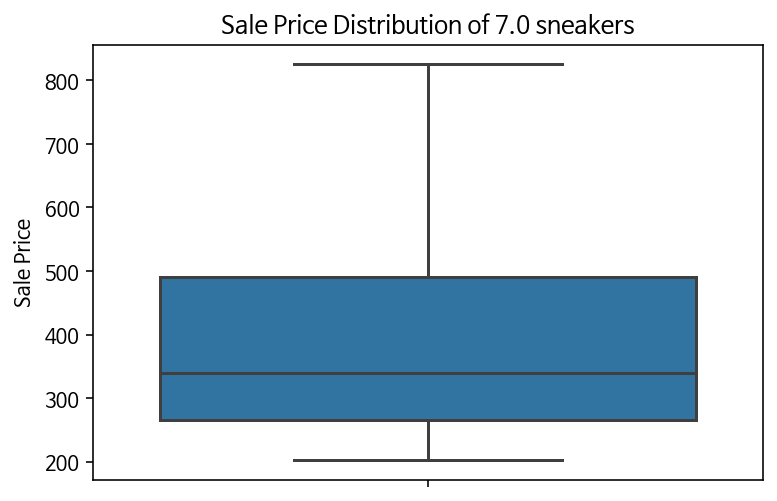

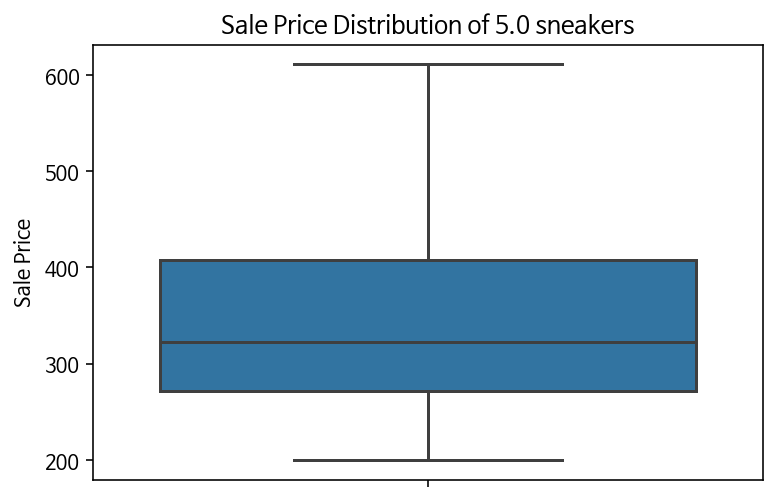

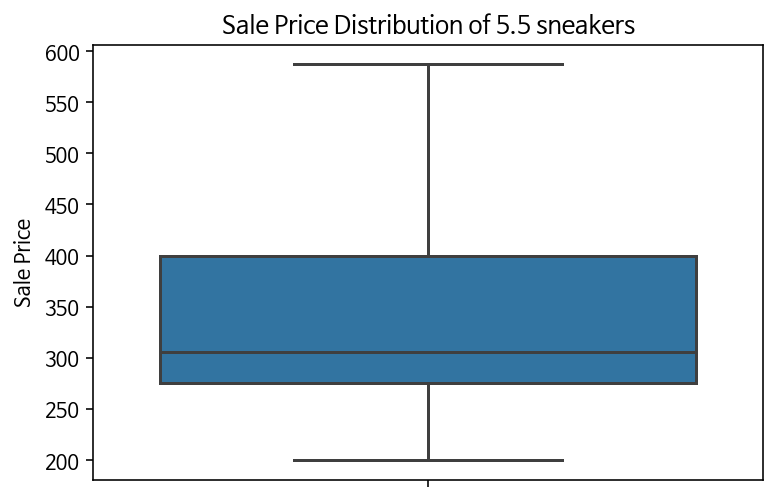

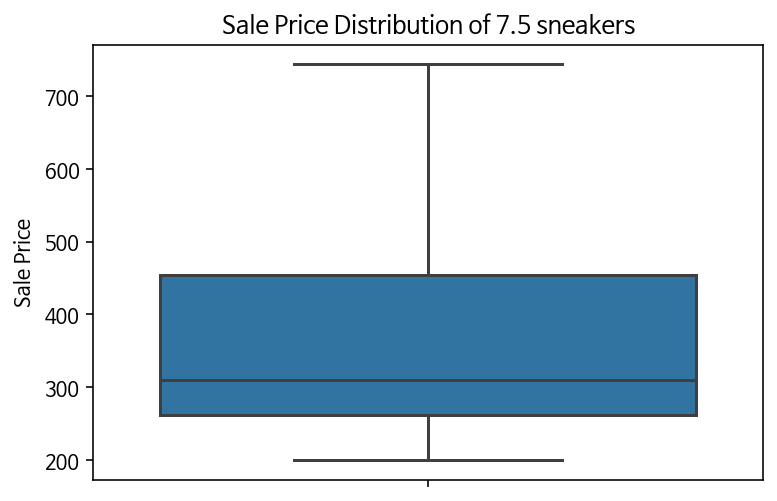

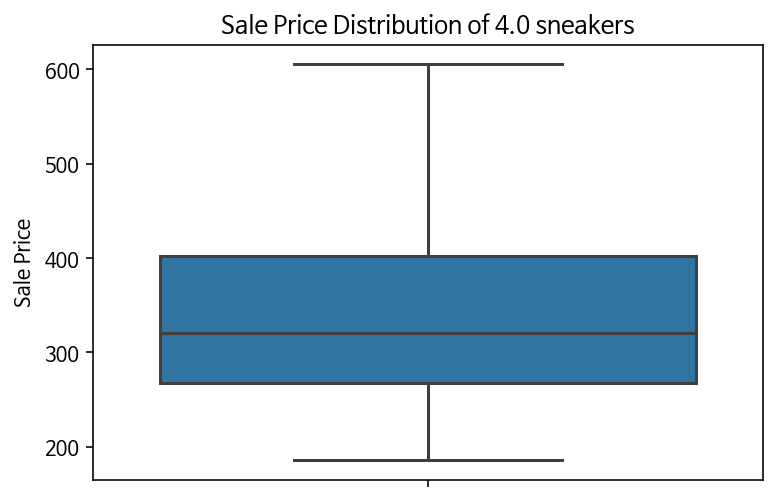

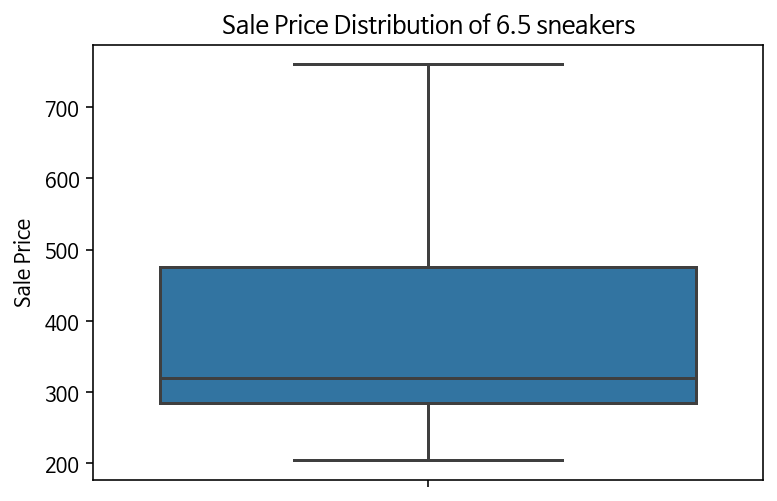

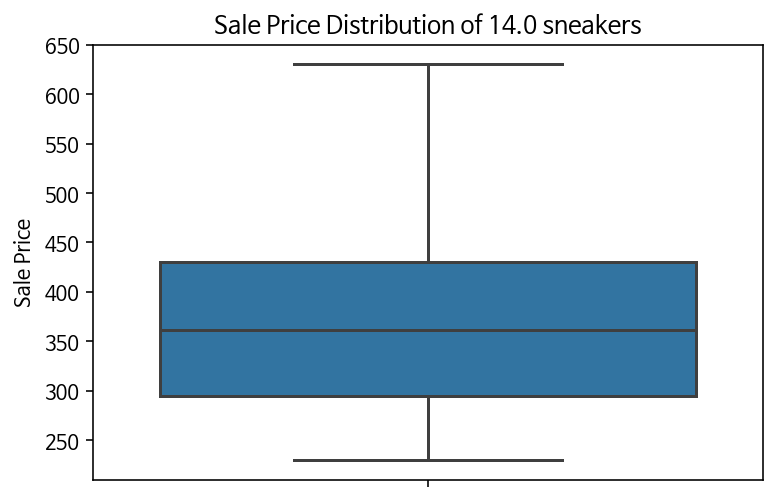

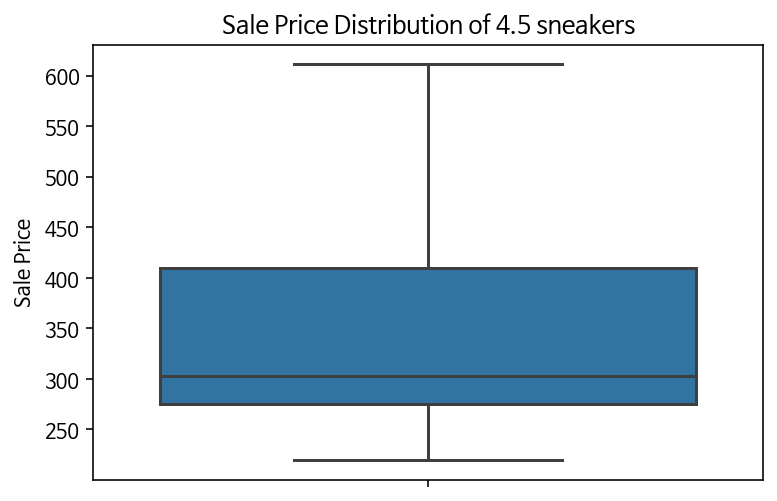

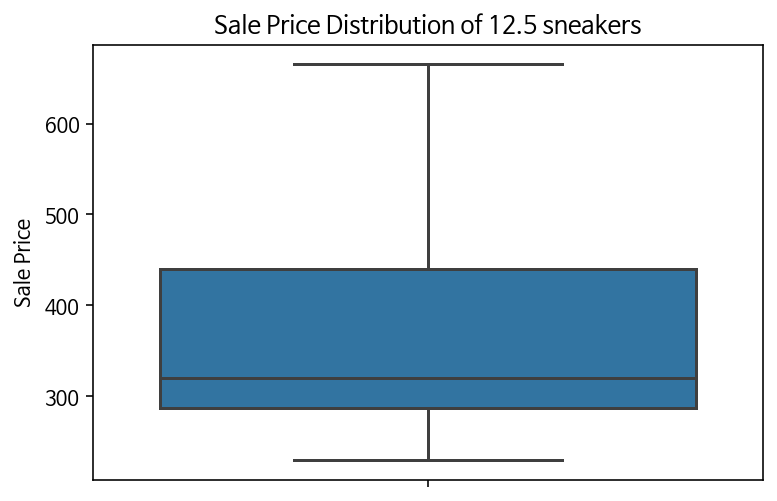

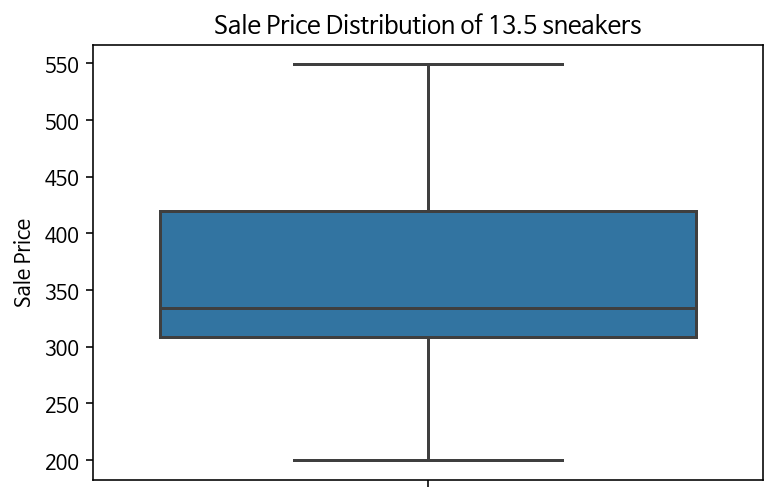

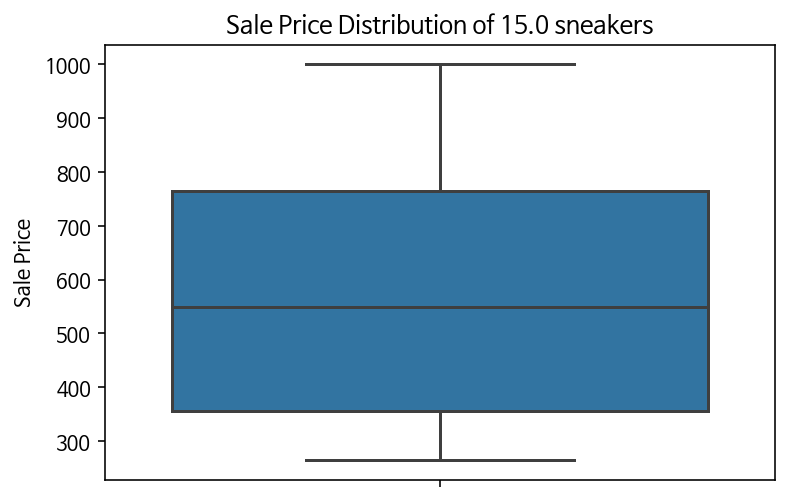

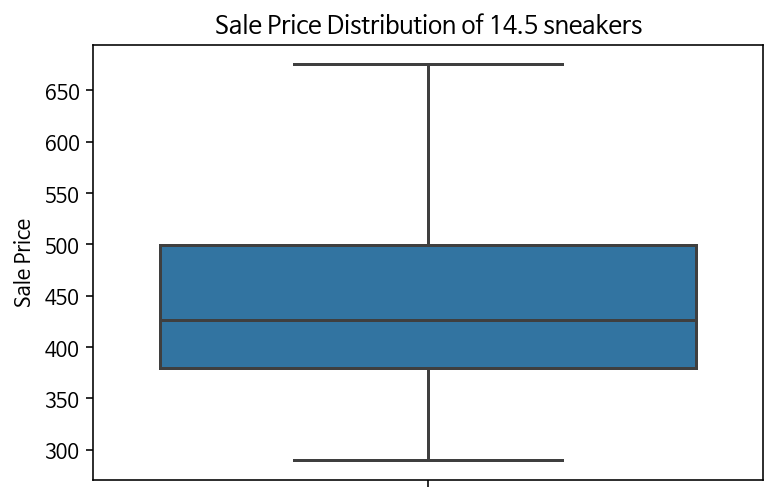

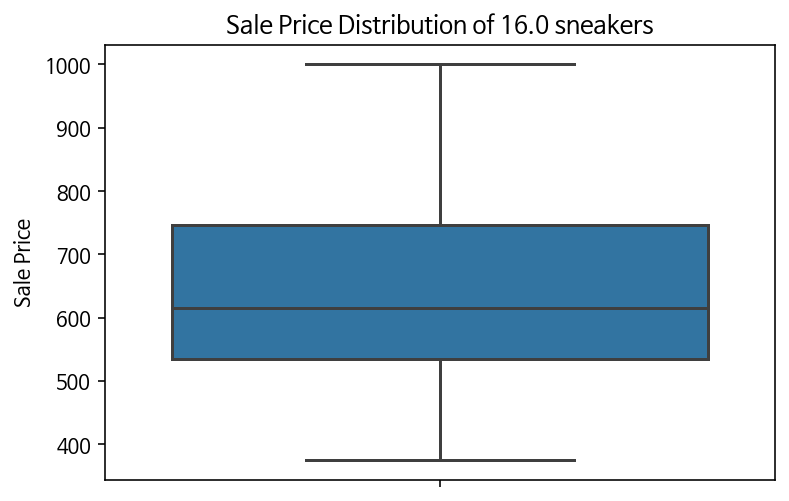

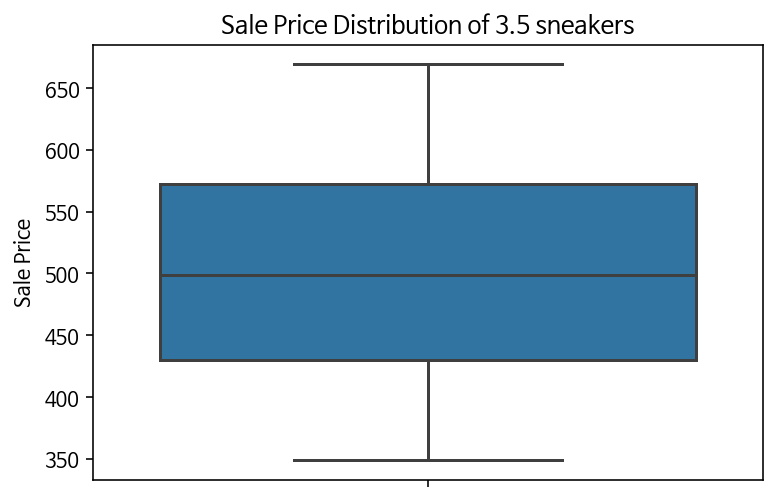

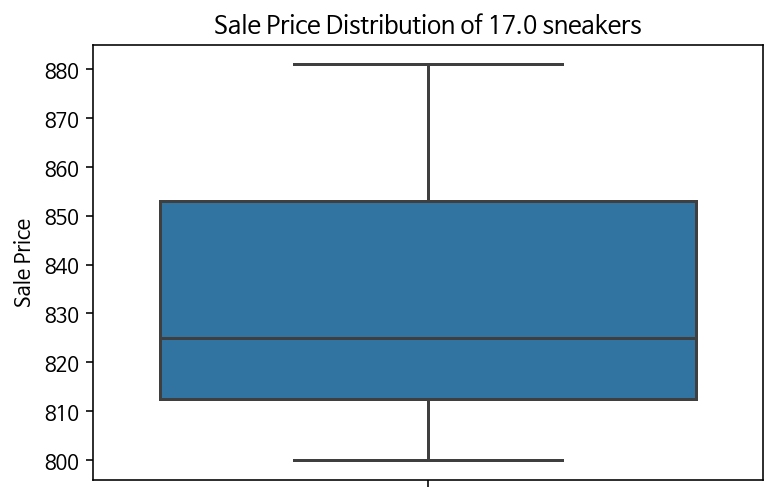

In [404]:
for size in Shoe_size:
  shoerow = target_df.loc[target_df['Shoe Size']==size]
  chart = sns.boxplot(y=shoerow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (size))
  plt.show()
  

### 2022 Kream (click)

In [405]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return
0,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282,West,3.1
1,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,736291,11.0,California,False,False,True,282,West,3.1
2,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,736371,11.0,Rhode Island,False,False,True,202,East,3.8
3,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,736371,8.5,Michigan,False,False,True,202,East,3.6
4,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black White,784,220,736315,11.0,California,False,False,True,258,West,3.6


## 트랜드 분석 : 판매가와 주문일

In [406]:
target_df = df[['Order Date', 'Sale Price']]
# ndarray 형태의 unique 를 list형태로
uniq_ord_dates = df['Order Date'].value_counts().index.tolist()
avgs_price3 = []

for date in uniq_ord_dates:
  daterow = target_df[target_df['Order Date']==date]
  avgs_price3.append(daterow['Sale Price'].mean())
  
uniq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avgs_price3)
dateprice_df = pd.DataFrame(columns=['Order_date', 'Average_Price'])
dateprice_df['Order_date'] = uniq_dates.sort_values(ascending=True)
dateprice_df['Average_Price']=date_avgs
dateprice_df.head()


,Order_date,Average_Price
474,736573,611.761905
496,736574,649.600000
503,736575,614.000000
490,736576,623.764706
473,736577,624.333333


Text(0.5, 1.0, 'Average Daily Sale Price Over time')

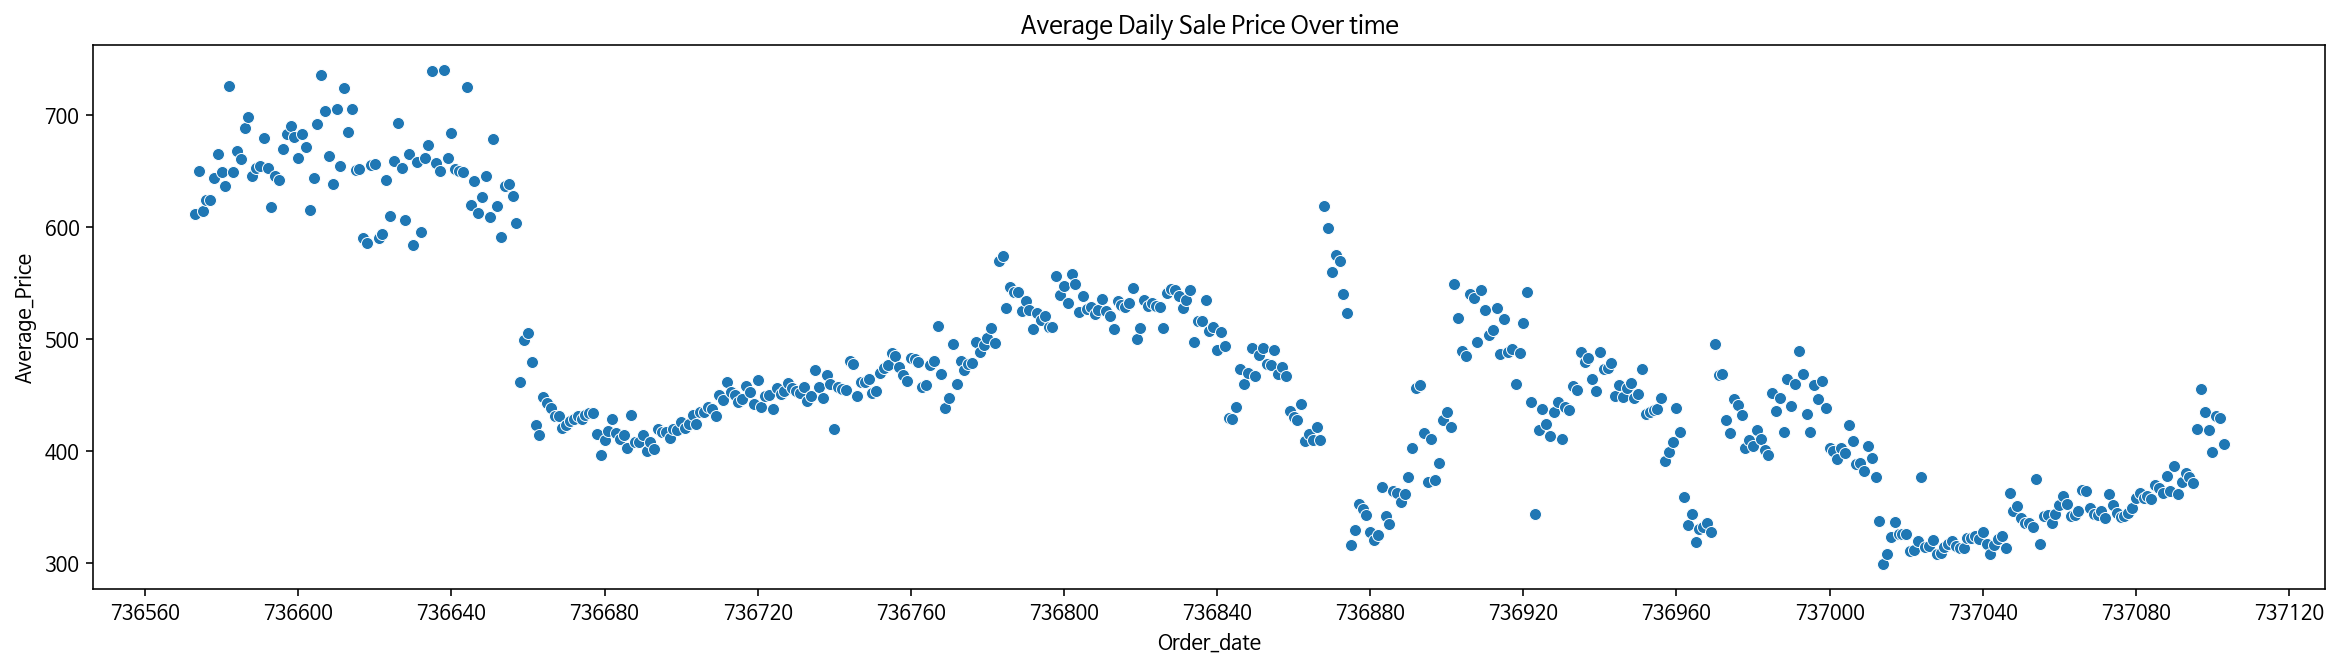

In [407]:
# 주문일 기준 시간에 따른 평균가격 변화 

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Order_date",y="Average_Price",data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
chart.set_title("Average Daily Sale Price Over time")

33


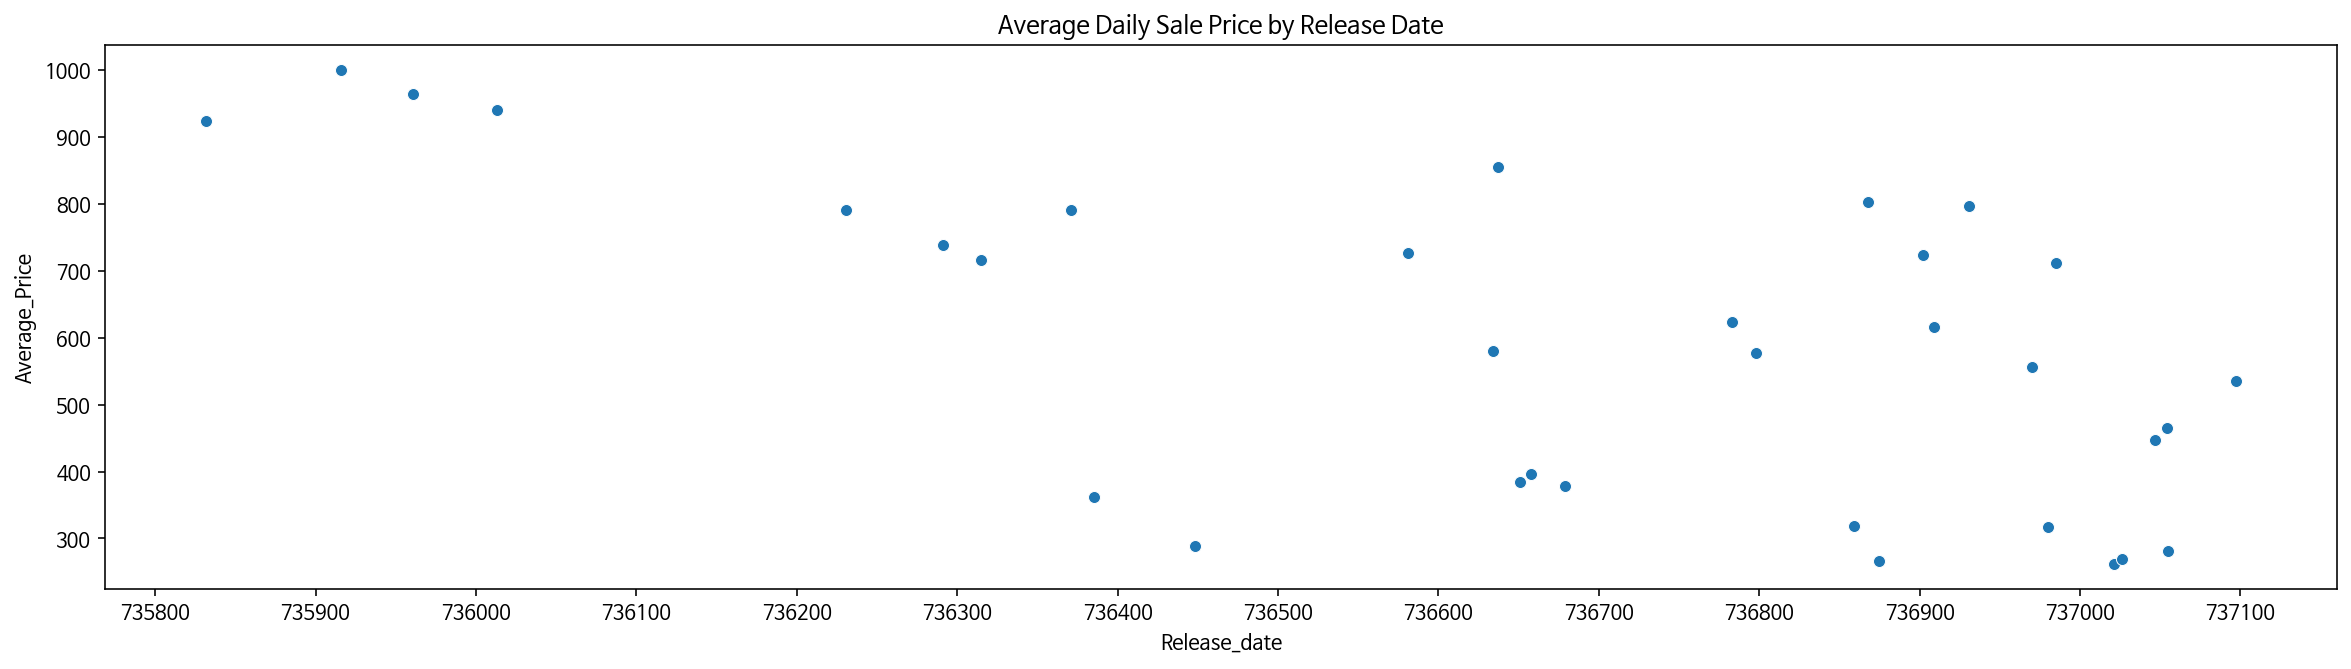

In [408]:
# 출시일 기준 시간에 따른 평균가격 변화 (확인 결과 출시일 고유값이 35개 뿐임)

target_df = df[['Release Date','Sale Price']]
uniq_rel = target_df['Release Date'].unique()
avgprice=[]

for uni in uniq_rel:
  daterow = target_df.loc[target_df['Release Date']== uni]
  avgprice.append(daterow['Sale Price'].mean())

Date = pd.Series(uniq_rel)
avgPrice = pd.Series(avgprice)
print(len(avgPrice))
rel_dateprice_df = pd.DataFrame(columns=['Release_date','Average_Price'])
rel_dateprice_df['Release_date'] = Date.sort_values(ascending=True)
rel_dateprice_df['Average_Price'] = avgPrice

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Release_date",y="Average_Price",data=rel_dateprice_df)
chart.set_title("Average Daily Sale Price by Release Date")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))

## 출시일 -> 판매일 gap 에 따른 가격

### 2017~2019 StockX (Train data)

In [409]:
# 200: 0~200
# 400 : 200~ 400
# 600 : 400~ 600
# 800 : 600~ 800
time_gap_cate = []
for i in bruh['time gap']:
  if i<=200:
    time_gap_cate.append(200)
  elif i <=400:
    time_gap_cate.append(400)
  elif i <=600:
    time_gap_cate.append(600)
  elif i <= 800:
    time_gap_cate.append(800)
  else:
    time_gap_cate.append('False')

bruh_timegap = bruh.copy()
bruh_timegap['time_gap_cate'] = time_gap_cate

bruh_timegap['time_gap_cate'].value_counts()

200    61211
600    10694
800     9934
400     9750
Name: time_gap_cate, dtype: int64

200 average price : $418.46594566336114
600 average price : $349.4454834486628
800 average price : $334.68884638614855
400 average price : $469.7634871794872


Text(0, 0.5, 'Mean price')

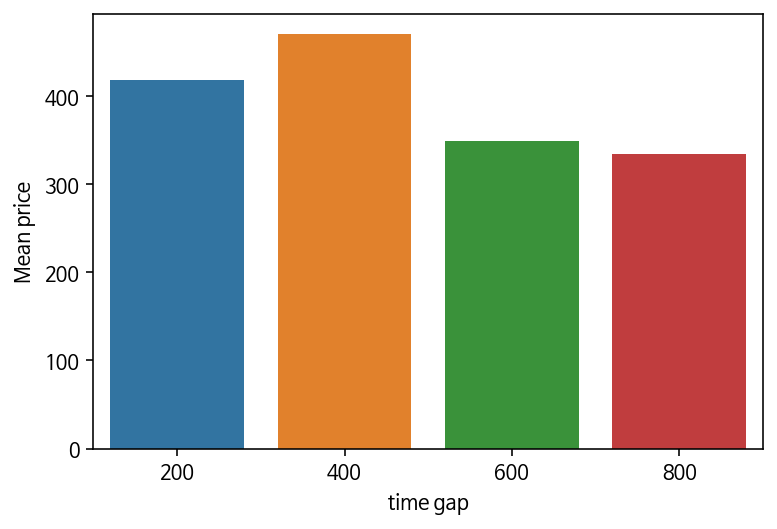

In [410]:
avgs_price2 =[]
target_df = bruh_timegap[['time_gap_cate','Sale Price']]
time_gap = bruh_timegap['time_gap_cate'].value_counts().index.tolist()

for time_gap_index in range(len(time_gap)):
  timerow = target_df.loc[target_df['time_gap_cate'] == time_gap[time_gap_index]]
  avgs_price2.append(timerow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{time_gap[i]} average price : $' + str(avgs_price2[i]))

chart = sns.barplot(x = time_gap, y= avgs_price2)
chart.set_xlabel('time gap')
chart.set_ylabel('Mean price')

### 2022 StockX (Test data)

In [412]:
test_df2 = test_df2.drop(test_df2[test_df2['time gap']>1000].index)
len(test_df2)

854

In [413]:
# 200: 0~200
# 400 : 200~ 400
# 600 : 400~ 600
# 800 : 600~ 800
time_gap_cate = []
for i in test_df2['time gap']:
  if i<=200:
    time_gap_cate.append(200)
  elif i <=400:
    time_gap_cate.append(400)
  elif i <=600:
    time_gap_cate.append(600)
  elif i <= 800:
    time_gap_cate.append(800)
  elif i <= 1000:
    time_gap_cate.append(1000)
  else:
    time_gap_cate.append('False')

test_df2['time_gap_cate'] = time_gap_cate

test_df2['time_gap_cate'].value_counts()

200     441
400     201
600     121
800      53
1000     38
Name: time_gap_cate, dtype: int64

200 average price : $191.05668934240362
400 average price : $206.27860696517413
600 average price : $216.2396694214876
800 average price : $236.50943396226415
1000 average price : $248.3684210526316


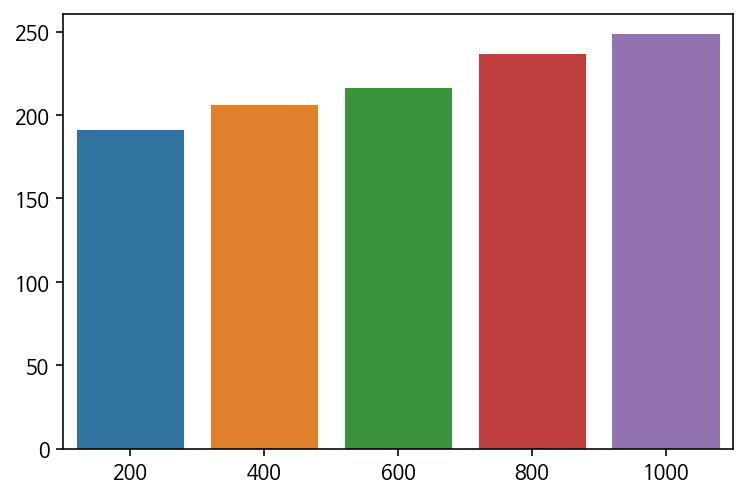

In [414]:
# 상품별이 아닌 브랜드별로 time gap에 따라 평균 가격이 어떻게 형성되는지도 알아보기

avgs_price2 =[]
target_df = test_df2[['time_gap_cate','Sale Price']]
time_gap = test_df2['time_gap_cate'].value_counts().index.tolist()

for time_gap_index in range(len(time_gap)):
  timerow = target_df.loc[target_df['time_gap_cate'] == time_gap[time_gap_index]]
  avgs_price2.append(timerow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{time_gap[i]} average price : $' + str(avgs_price2[i]))

sns.barplot(x = time_gap, y= avgs_price2)

## 트랜드 분석 : 구매자 지역과 판매 가격 비교

In [415]:
target_df = df[['Buyer Region','Sale Price']]
uniq_region = df['Buyer Region'].value_counts().index.tolist()
avg_price = []

for region in uniq_region:
  region_row = target_df.loc[target_df['Buyer Region']==region]
  avg_price.append(region_row['Sale Price'].mean())

region_col = pd.Series(uniq_region)
avgprice_col = pd.Series(avg_price)

regionprice_df = pd.DataFrame(columns=['Buyer Region','Average Price'])
regionprice_df['Buyer Region'] = region_col
regionprice_df['Average Price'] = avgprice_col
regionprice_df.head().sort_values('Average Price',ascending=True)

,Buyer Region,Average Price
4,Texas,387.705549
3,Florida,401.120249
1,New York,405.364914
0,California,426.044155
2,Oregon,429.603267


Text(0.5, 1.0, 'Average Sale Price by Buyer Region')

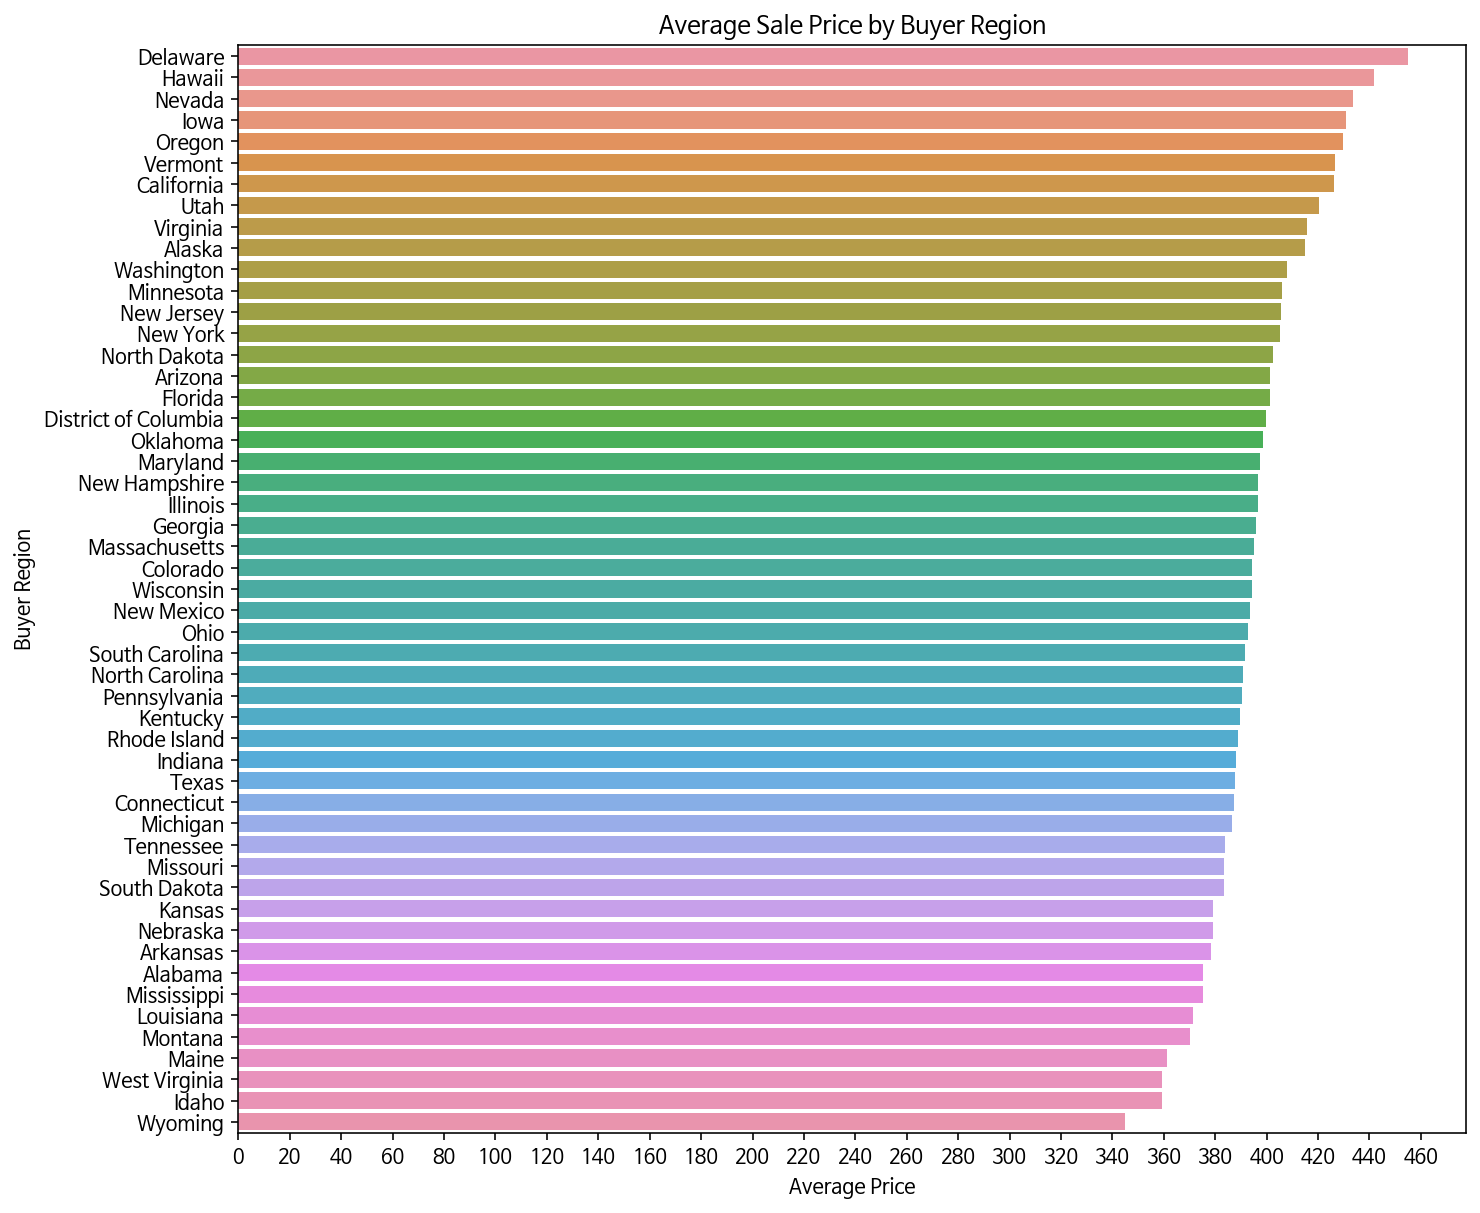

In [416]:
fig,ax = plt.subplots(figsize=(11,10))
chart = sns.barplot(x='Average Price',y='Buyer Region',data=regionprice_df.sort_values('Average Price',ascending=False))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
chart.set_title("Average Sale Price by Buyer Region")

# Modeling
* 상품의 평균 가격 예측 
* train 데이터(df)의 브랜드, 신발 이름, (주문일-출시일), 소매가 => 판매가 예측 학습
* test 데이터(test_df2) 의 브랜드, 신발 이름, (현재날짜 - 출시일), 소매가 [입력] => 평균신발가격과 비슷한지 성능 평가

In [417]:
# 테스트 데이터 컬럼 필요한것만 남기는 작업
df2 = df.copy()
test2 = test.copy()
test2.drop(columns=['Unnamed: 0'],inplace=True)
test2.columns=['Sneaker_Name','Brand','retail Price','Release Date','가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','연간가장낮은가격','최근12개월간가격변동률','팔린신발수','평균신발가격','최근 판매가','최근가격변동률']
test_df = test2.drop(columns=['가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','팔린신발수','연간가장낮은가격','최근12개월간가격변동률','최근가격변동률'])
# 여기서 최근 판매가는 변동성이 너무 커서 우리의 머신러닝 모델로 예측하는 가격은 평균신발가격으로 설정하는게 좋을 것같아서 최근 판매가 컬럼도 삭제하겠습니다.
test_df2 = test_df.drop('최근 판매가',axis=1)
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,adidas,300,2022-06-17,354


In [418]:
test_df2['Brand'] = test_df2['Brand'].apply(lambda x: x.replace('adidas','Adidas'))
test_df2

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,Adidas,300,2022-06-17,354
...,...,...,...,...,...
995,Nike Air Force 1 Low G-Dragon Peaceminusone Pa...,Nike,200,2020-11-25,448
996,Jordan 1 Retro High Black Satin Gym Red,Jordan,170,2020-01-18,190
997,Nike Air Max 90 Recraft Triple White,Nike,120,2020-01-09,123
998,adidas Yeezy Boost 350 V2 Fade,Adidas,220,2020-11-11,304


In [419]:
df2.head(1)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return
0,736573,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282,West,3.1


In [420]:
df2.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return'],
      dtype='object')

In [421]:

df2['split'] = df2['Sneaker Name'].apply(lambda x: x.replace('adidas','Adidas'))
df2['split'] = df2['Sneaker Name'].apply(lambda x: x.split(' '))
brand_new = []
for i in range(len(df2['split'])):
  if 'Adidas' in df2['split'][i]:
    brand_new.append('Adidas')
  elif 'Nike' in df2['split'][i]:
    brand_new.append('Nike')

new_brand = pd.Series(brand_new)
df2['brand_new'] = new_brand
df2 = df2[['Order Date', 'Brand','brand_new', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return',
       'split' ]]
df2.head()

,Order Date,Brand,brand_new,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return,split
0,736573,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, C..."
1,736573,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,736291,11.0,California,False,False,True,282,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, G..."
2,736573,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,736371,11.0,Rhode Island,False,False,True,202,East,3.8,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, R..."
3,736573,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,736371,8.5,Michigan,False,False,True,202,East,3.6,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, R..."
4,736573,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black White,784,220,736315,11.0,California,False,False,True,258,West,3.6,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, W..."


In [422]:
train_df = df2.copy()
test_df = test_df2.copy()

## 머신러닝 모델링을 위한 전처리

In [423]:
train_df.columns

Index(['Order Date', 'Brand', 'brand_new', 'Sneaker Name', 'Sale Price',
       'Retail Price', 'Release Date', 'Shoe Size', 'Buyer Region',
       'Cheaper Buy', 'Same Buy', 'Expensive Buy', 'time gap',
       'cardinal point', 'multiple_return', 'split'],
      dtype='object')

### 컬럼명 변경

In [424]:
# 컬럼명 공백 제거

train_df = train_df.rename(columns={
    "Order Date":"Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region", 
    'Cheaper Buy': 'Cheaper_Buy',
    'Same Buy':'Same_Buy',
    'Expensive Buy':'Expensive_Buy',
    'time gap':'time_gap',
    'cardinal point':'cardinal_point'
    })
train_df.head(1)

,Order_date,Brand,brand_new,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return,split
0,736573,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, C..."


In [425]:
test_df = test_df.rename(columns={
    'retail Price':'Retail_Price',
    'Release Date':'Release_Date',
    '평균신발가격':'Average_Price'
})
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188


In [426]:
# 날짜 데이터 -> 수치형 데이터 전환
import datetime as dt

train_df['Order_date'] = pd.to_datetime(train_df['Order_date'])
train_df['Order_date']=train_df['Order_date'].map(dt.datetime.toordinal)

train_df['Release_Date'] = pd.to_datetime(train_df['Release_Date'])
train_df['Release_Date']=train_df['Release_Date'].map(dt.datetime.toordinal)

train_df['time_gap']=train_df['Order_date']-train_df['Release_Date']

In [427]:
# 데이터 수집일자 컬럼 추가
Crowling_Data = ['2022-06-15']*len(test_df)
test_df['Crowling_Data']=Crowling_Data
test_df['Crowling_Data'] = pd.to_datetime(test_df['Crowling_Data'],format='%Y-%m-%d')
test_df.dtypes

Sneaker_Name             object
Brand                    object
Retail_Price              int64
Release_Date             object
Average_Price             int64
Crowling_Data    datetime64[ns]
dtype: object

In [428]:
test_df['Release_Date'] = pd.to_datetime(test_df['Release_Date'])
test_df['Release_Date']=test_df['Release_Date'].map(dt.datetime.toordinal)

test_df['Crowling_Data']=test_df['Crowling_Data'].map(dt.datetime.toordinal)


# 수집일 - 출시일 = time gap 컬럼 생성
test_df['time_gap']=test_df['Crowling_Data']-test_df['Release_Date']
test_df.head(2)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,738317,209,738321,4


### Target Feature 등 컬럼 제거 후 train/test set 분리

In [429]:
train_df.head(1)

,Order_date,Brand,brand_new,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return,split
0,719163,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,719163,11.0,California,False,False,True,0,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, C..."


In [430]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

X = train_df.drop(['Sale_Price','Cheaper_Buy','Same_Buy','Expensive_Buy','cardinal_point','Buyer_Region','Shoe_Size','multiple_return'],axis=1)
y = train_df['Sale_Price']


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)


In [431]:
print(X.shape)

(91589, 8)


In [432]:
X_train.head()

,Order_date,Brand,brand_new,Sneaker_Name,Retail_Price,Release_Date,time_gap,split
35218,719163,Yeezy,Nike,Adidas Yeezy Boost 350 V2 Zebra,220,719163,0,"[Adidas, Yeezy, Boost, 350, V2, Zebra]"
67376,719163,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,220,719163,0,"[Adidas, Yeezy, Boost, 350, V2, Semi, Frozen, ..."
81863,719163,Off-White,NaN,Nike Air VaporMax Off White Black,250,719163,0,"[Nike, Air, VaporMax, Off, White, Black]"
35617,719163,Yeezy,Nike,adidas Yeezy Boost 350 V2 Butter,220,719163,0,"[adidas, Yeezy, Boost, 350, V2, Butter]"
332,719163,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Zebra,220,719163,0,"[Adidas, Yeezy, Boost, 350, V2, Zebra]"


In [433]:
X_train = X_train.rename(columns={
    'Brand' : 'brand',
    'brand_new' : 'Brand'})
X_train = X_train.drop(columns=['brand','split'])
X_train.head()

,Order_date,Brand,Sneaker_Name,Retail_Price,Release_Date,time_gap
35218,719163,Nike,Adidas Yeezy Boost 350 V2 Zebra,220,719163,0
67376,719163,Adidas,Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,220,719163,0
81863,719163,NaN,Nike Air VaporMax Off White Black,250,719163,0
35617,719163,Nike,adidas Yeezy Boost 350 V2 Butter,220,719163,0
332,719163,Adidas,Adidas Yeezy Boost 350 V2 Zebra,220,719163,0


In [434]:
X_val = X_val.rename(columns={
    'Brand' : 'brand',
    'brand_new' : 'Brand'})
X_val = X_val.drop(columns=['brand','split'])
X_val.head()

,Order_date,Brand,Sneaker_Name,Retail_Price,Release_Date,time_gap
57172,719163,Nike,Adidas Yeezy Boost 350 V2 Blue Tint,220,719163,0
8229,719163,Adidas,Adidas Yeezy Boost 350 V2 Blue Tint,220,719163,0
27423,719163,Adidas,Adidas Yeezy Boost 350 V2 Cream White,220,719163,0
81187,719163,NaN,Adidas Yeezy Boost 350 V2 Sesame,220,719163,0
32148,719163,Nike,adidas Yeezy Boost 350 V2 Butter,220,719163,0


In [435]:
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7


In [436]:
X_test = test_df.drop('Average_Price',axis=1)
y_test = test_df['Average_Price']

### Encoding

In [437]:
# 범주형 데이터 -> 수치형 데이터

from sklearn.preprocessing import OneHotEncoder

object_cols = ['Sneaker_Name','Brand'] 


# 범주형 데이터를 가진 컬럼에 원핫인코딩 적용
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# 원핫인코딩 인덱스 제거 -> 인덱스 치환
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

OH_cols_test.index = X_test.index

# 원핫 인코딩 후 컬럼명 추가
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)

OH_cols_test.columns = OH_encoder.get_feature_names(object_cols)

# train, validation 데이터셋에서 원핫인코딩한 컬럼들 삭제(수치형 Feature들만 존재)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

num_X_test = X_test.drop(object_cols, axis=1)

# 원핫인코딩한 결과 병합
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [438]:
OH_X_train.head(2)

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
35218,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67376,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 모델 적용

### Baseline - Linear Regression

In [439]:
OH_X_train.head()

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
35218,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67376,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
81863,719163,250,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35617,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
332,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [440]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [441]:
# y절편 확인

print(lm.intercept_)

7.03699341860282e+17


In [442]:
# y절편 확인(브랜드 명 수정 후)

print(lm.intercept_)

7.03699341860282e+17


In [443]:
# 상관계수 확인

coeff_df = pd.DataFrame(lm.coef_,OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient",ascending=True)
ranked_coeff

,Coefficient
Brand_nan,-2.381156e+12
Brand_Nike,-2.381156e+12
Brand_Adidas,-2.381156e+12
Release_Date,-9.784888e+11
time_gap,-1.091747e+11
Retail_Price,-5.675737e+08
Order_date,-5.532546e+06
Sneaker_Name_Nike Blazer Mid Off White Grim Reaper,1.341009e+10
Sneaker_Name_Nike Blazer Mid Off White All Hallows Eve,1.341009e+10
Sneaker_Name_Nike Blazer Mid Off White,1.341009e+10


In [444]:
# 상관계수 확인

coeff_df = pd.DataFrame(lm.coef_,OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient",ascending=True)
ranked_coeff

,Coefficient
Brand_nan,-2.381156e+12
Brand_Nike,-2.381156e+12
Brand_Adidas,-2.381156e+12
Release_Date,-9.784888e+11
time_gap,-1.091747e+11
Retail_Price,-5.675737e+08
Order_date,-5.532546e+06
Sneaker_Name_Nike Blazer Mid Off White Grim Reaper,1.341009e+10
Sneaker_Name_Nike Blazer Mid Off White All Hallows Eve,1.341009e+10
Sneaker_Name_Nike Blazer Mid Off White,1.341009e+10


In [445]:
# 예측값 저장, 평가 지표 적용

pred = lm.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,pred))
print("MSE :",metrics.mean_squared_error(y_val,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,pred)))

MAE : 92.36685227644939
MSE : 15068.239982530844
RMSE : 122.75275957195767


In [446]:
# 예측값 저장, 평가 지표 적용

pred = lm.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,pred))
print("MSE :",metrics.mean_squared_error(y_val,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,pred)))

MAE : 92.36685227644939
MSE : 15068.239982530844
RMSE : 122.75275957195767


In [447]:
# Test 데이터로 실제 테스트

pred = lm.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 2.4729108824095924e+16
MSE : 1.024186666387389e+33
RMSE : 3.200291652939446e+16


In [448]:
# Test 데이터로 실제 테스트

pred = lm.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 2.4729108824095924e+16
MSE : 1.024186666387389e+33
RMSE : 3.200291652939446e+16


In [449]:
y_test

0      188
1      209
2      333
3      566
4      354
      ... 
995    448
996    190
997    123
998    304
999    237
Name: Average_Price, Length: 1000, dtype: int64

In [450]:
len(pred)

1000

In [451]:
OH_X_valid.head()

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
57172,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8229,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27423,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
81187,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32148,719163,220,719163,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [452]:
OH_X_test.head()

,Retail_Price,Release_Date,Crowling_Data,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
0,80,738314,738321,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,170,738317,738321,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200,738321,738321,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110,738316,738321,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,300,738323,738321,-2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Model1

### Model2

### Model3

### Model4

# 모델 피클링

In [453]:
import pickle

with open('baseline_model.pickle','wb') as fw:
  pickle.dump(lm,fw)

# 추가 EDA

In [454]:
# 1. Time gap 에 따른 이윤(판매가 - 출시가) 시각화

In [455]:
df['Shoe Size'].value_counts()

10.0    10061
9.0      8908
11.0     8329
10.5     8028
9.5      7924
12.0     6617
8.5      4866
8.0      4850
11.5     4149
13.0     4147
6.0      3741
7.0      3570
5.0      3405
5.5      2501
7.5      2442
4.0      2143
6.5      2047
14.0     1638
4.5      1231
12.5      579
13.5      143
15.0      111
14.5       83
16.0       69
3.5         4
17.0        3
Name: Shoe Size, dtype: int64